In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

In [3]:
marita_df = pd.read_csv("marita_results_2021-04-16.csv")

In [4]:
def get_agg_df_w_baseline(archetype, agg_type="mean"):
    def _add_drug_length(df):
        df["drug_length"] = -1
        df.loc[df["drug_type"]=="DP", "drug_length"] = 28
        df.loc[np.logical_or(df["drug_type"]=="ASAQ", df["drug_type"]=="SPAQ"), "drug_length"] = 14
        
    scenario_df = pd.read_csv("../scenario_master_list.csv")
    scenario_df = scenario_df[scenario_df["archetype"]==archetype].reset_index(drop=True)

    if archetype == "Sahel":
#         df = pd.read_csv("endpoints_bdc41c37-b09c-eb11-a2ce-c4346bcb1550.csv")
#         df.drop(df[np.in1d(df['scenario_number'], [35, 36])].index, inplace = True)
#         df2 = pd.read_csv("endpoints_c1c725ad-e49c-eb11-a2ce-c4346bcb1550.csv") # has corrected scenarios 35 and 36
#         df = pd.concat([df,df2])
#         df = pd.read_csv("endpoints_1e270e7a-559d-eb11-a2ce-c4346bcb1550.csv")
        df = pd.read_csv("endpoints_312b5201-609d-eb11-a2ce-c4346bcb1550.csv")
        df2 = pd.read_csv("endpoints_44bed067-43a2-eb11-a2ce-c4346bcb1550.csv") # SMC with DP
        df = pd.concat([df,df2])
    elif archetype == "Southern":
#         df = pd.read_csv("endpoints_f70751f3-2d98-eb11-a2ce-c4346bcb1550.csv") 
#         df2 = pd.read_csv("endpoints_b925ffe3-af9c-eb11-a2ce-c4346bcb1550.csv")
#         df = pd.concat([df, df2])
        df = pd.read_csv("endpoints_a71e7b31-559d-eb11-a2ce-c4346bcb1550.csv")
        df2 = pd.read_csv("endpoints_b7cd3df7-24a2-eb11-a2ce-c4346bcb1550.csv") #extra ITN scenario
        df = pd.concat([df,df2])
    

    # df cleaning
    df["out_of_school_rate"] = np.round(df["out_of_school_rate"],2)
    _add_drug_length(df)
    df.fillna({"smc_on": False,
                "smc_age_range": "default",
                "ivermectin": False,
                "primaquine": False}, inplace=True)
    
    df_baseline = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg(agg_type).reset_index()
#     df_allout = df[df["scenario_number"]==27].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

    df_agg = df.groupby(["burnin_approx_pfpr2_10", "scenario_number"]).agg(agg_type).reset_index().merge(scenario_df, on="scenario_number", suffixes=("","_DUPLICATED"))
    df_agg["out_of_school_rate"] = np.round(df_agg["out_of_school_rate"],2)

    df_agg_w_baseline = df_agg.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")
    
    return df_agg_w_baseline

In [112]:
intervention_name_list = {}
intervention_name_list["Sahel"] = [
    "SPAQ_IST_term",
    "SPAQ_IST_month",
    "SPAQ_IPT_term",
    "SPAQ_IPT_month",
    "DP_IST_term",
    "DP_IST_month",
    "DP_IPT_term",
    "DP_IPT_month",
    "DP_IPT_day"
]

# ordered by category
# intervention_name_list["Southern"] = [
#     "ASAQ_IST_term",
#     "ASAQ_IST_month",
#     "ASAQ_IPT_term",
#     "ASAQ_IPT_month",
#     "DP_IST_term",
#     "DP_IST_month",
#     "DP_IPT_term",
#     "DP_IPT_month",
#     "DP_IPT_day"
# ]

#ordered by impact
intervention_name_list["Southern"] = [
#     "No IPTsc; increase ITNs",
#     "No IPTsc; cover 90% of u5s each term",
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "ASAQ_IST_month",
    "DP_IPT_term",
    "DP_IST_month",
    "ASAQ_IPT_month",
    "DP_IPT_month",
    "DP_IPT_day"
]

# bar.loc[bar["scenario_number"]==31, "intervention_name"] = "No IPTsc; increase ITNs"
# bar.loc[bar["scenario_number"]==32, "intervention_name"] = "No IPTsc; cover 90\% of u5s each term"

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

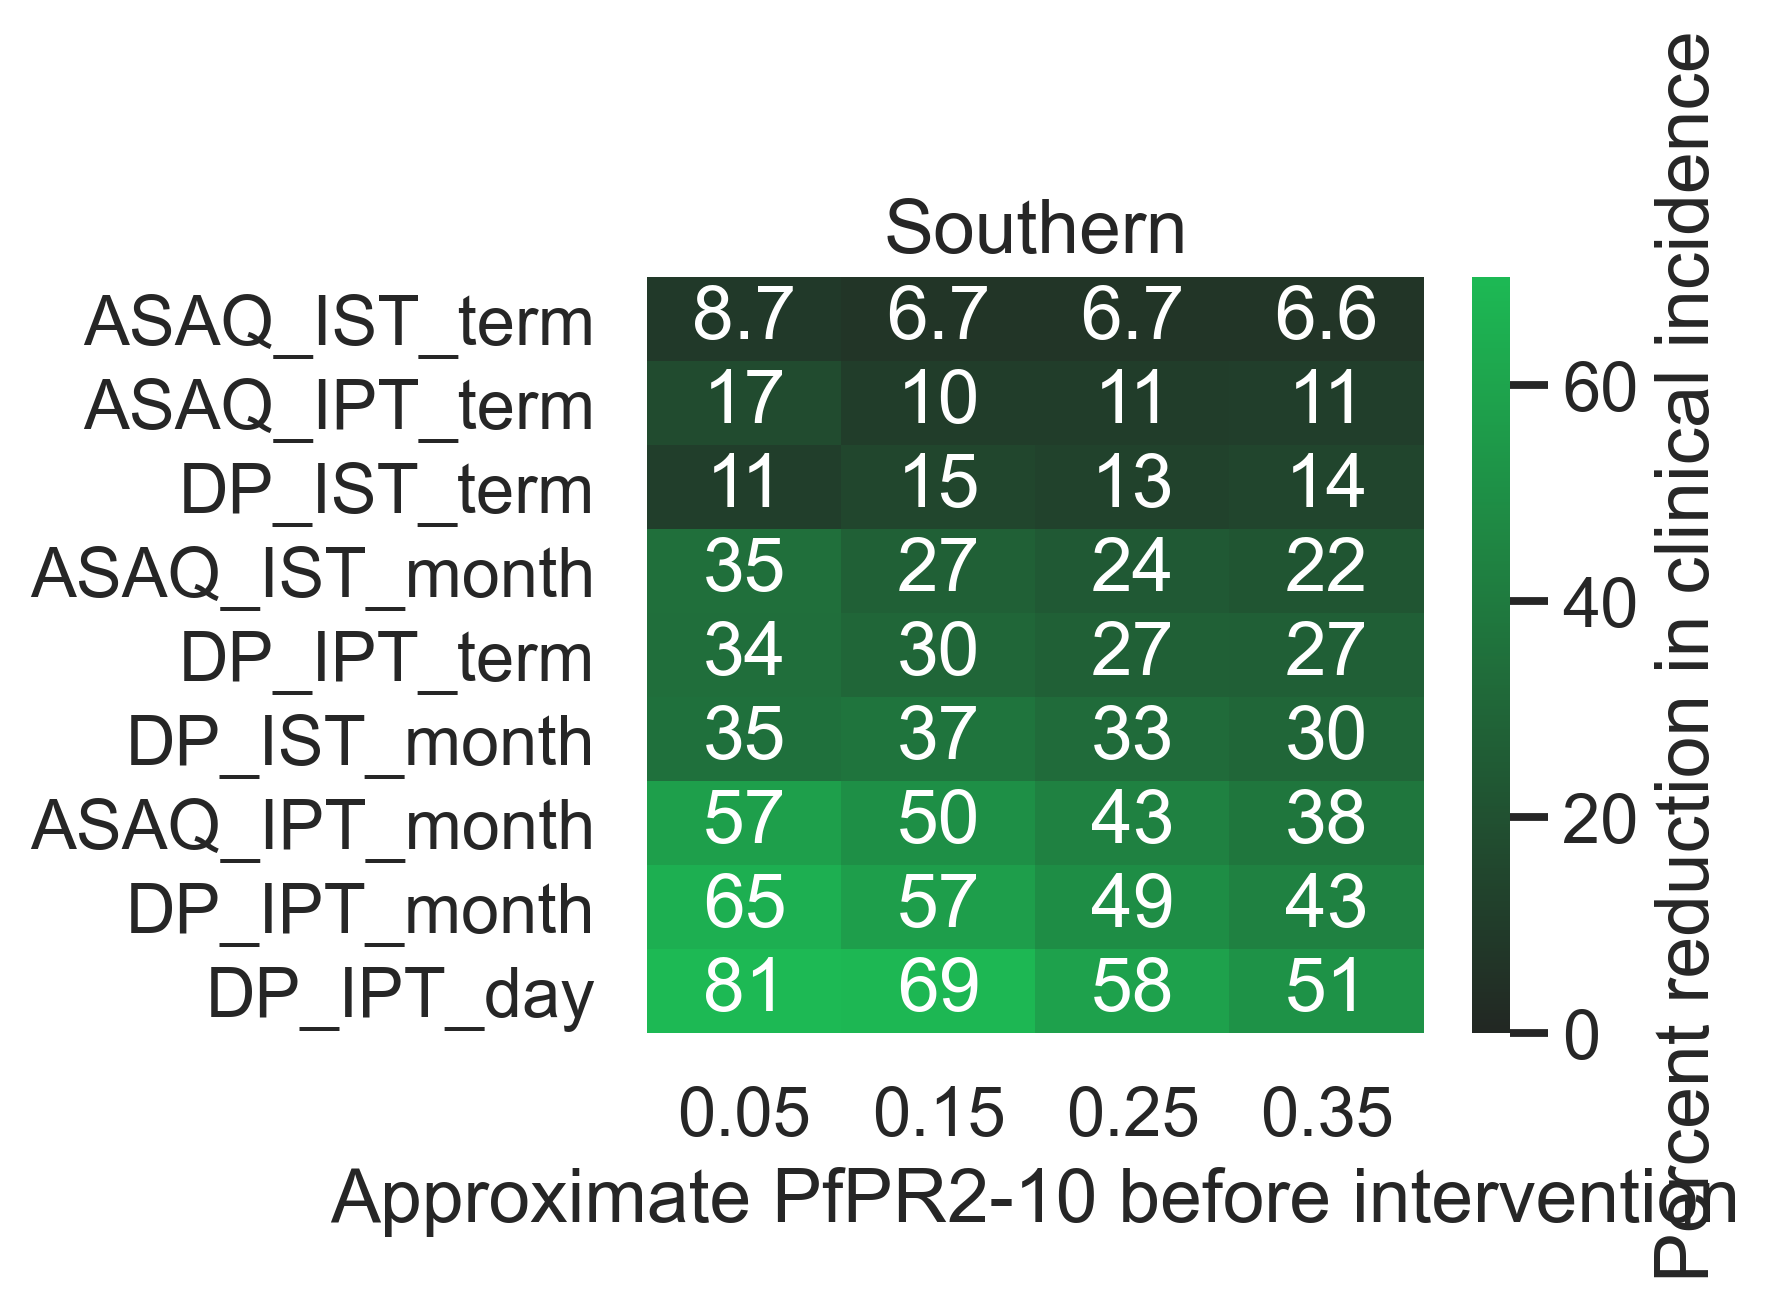

In [115]:
plt.figure(dpi=300)
archetype="Southern"
foo = get_agg_df_w_baseline(archetype)
# bar = foo[foo["out_of_school_rate"]==0.15]
bar = foo[np.in1d(foo["scenario_number"], [1,4,7,10,13,16,19,22,27])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]

bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=0, vmax=70, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)
plt.tight_layout()

plt.savefig("figures/2021-04-13_dryrun/southern_heatmap.pdf")

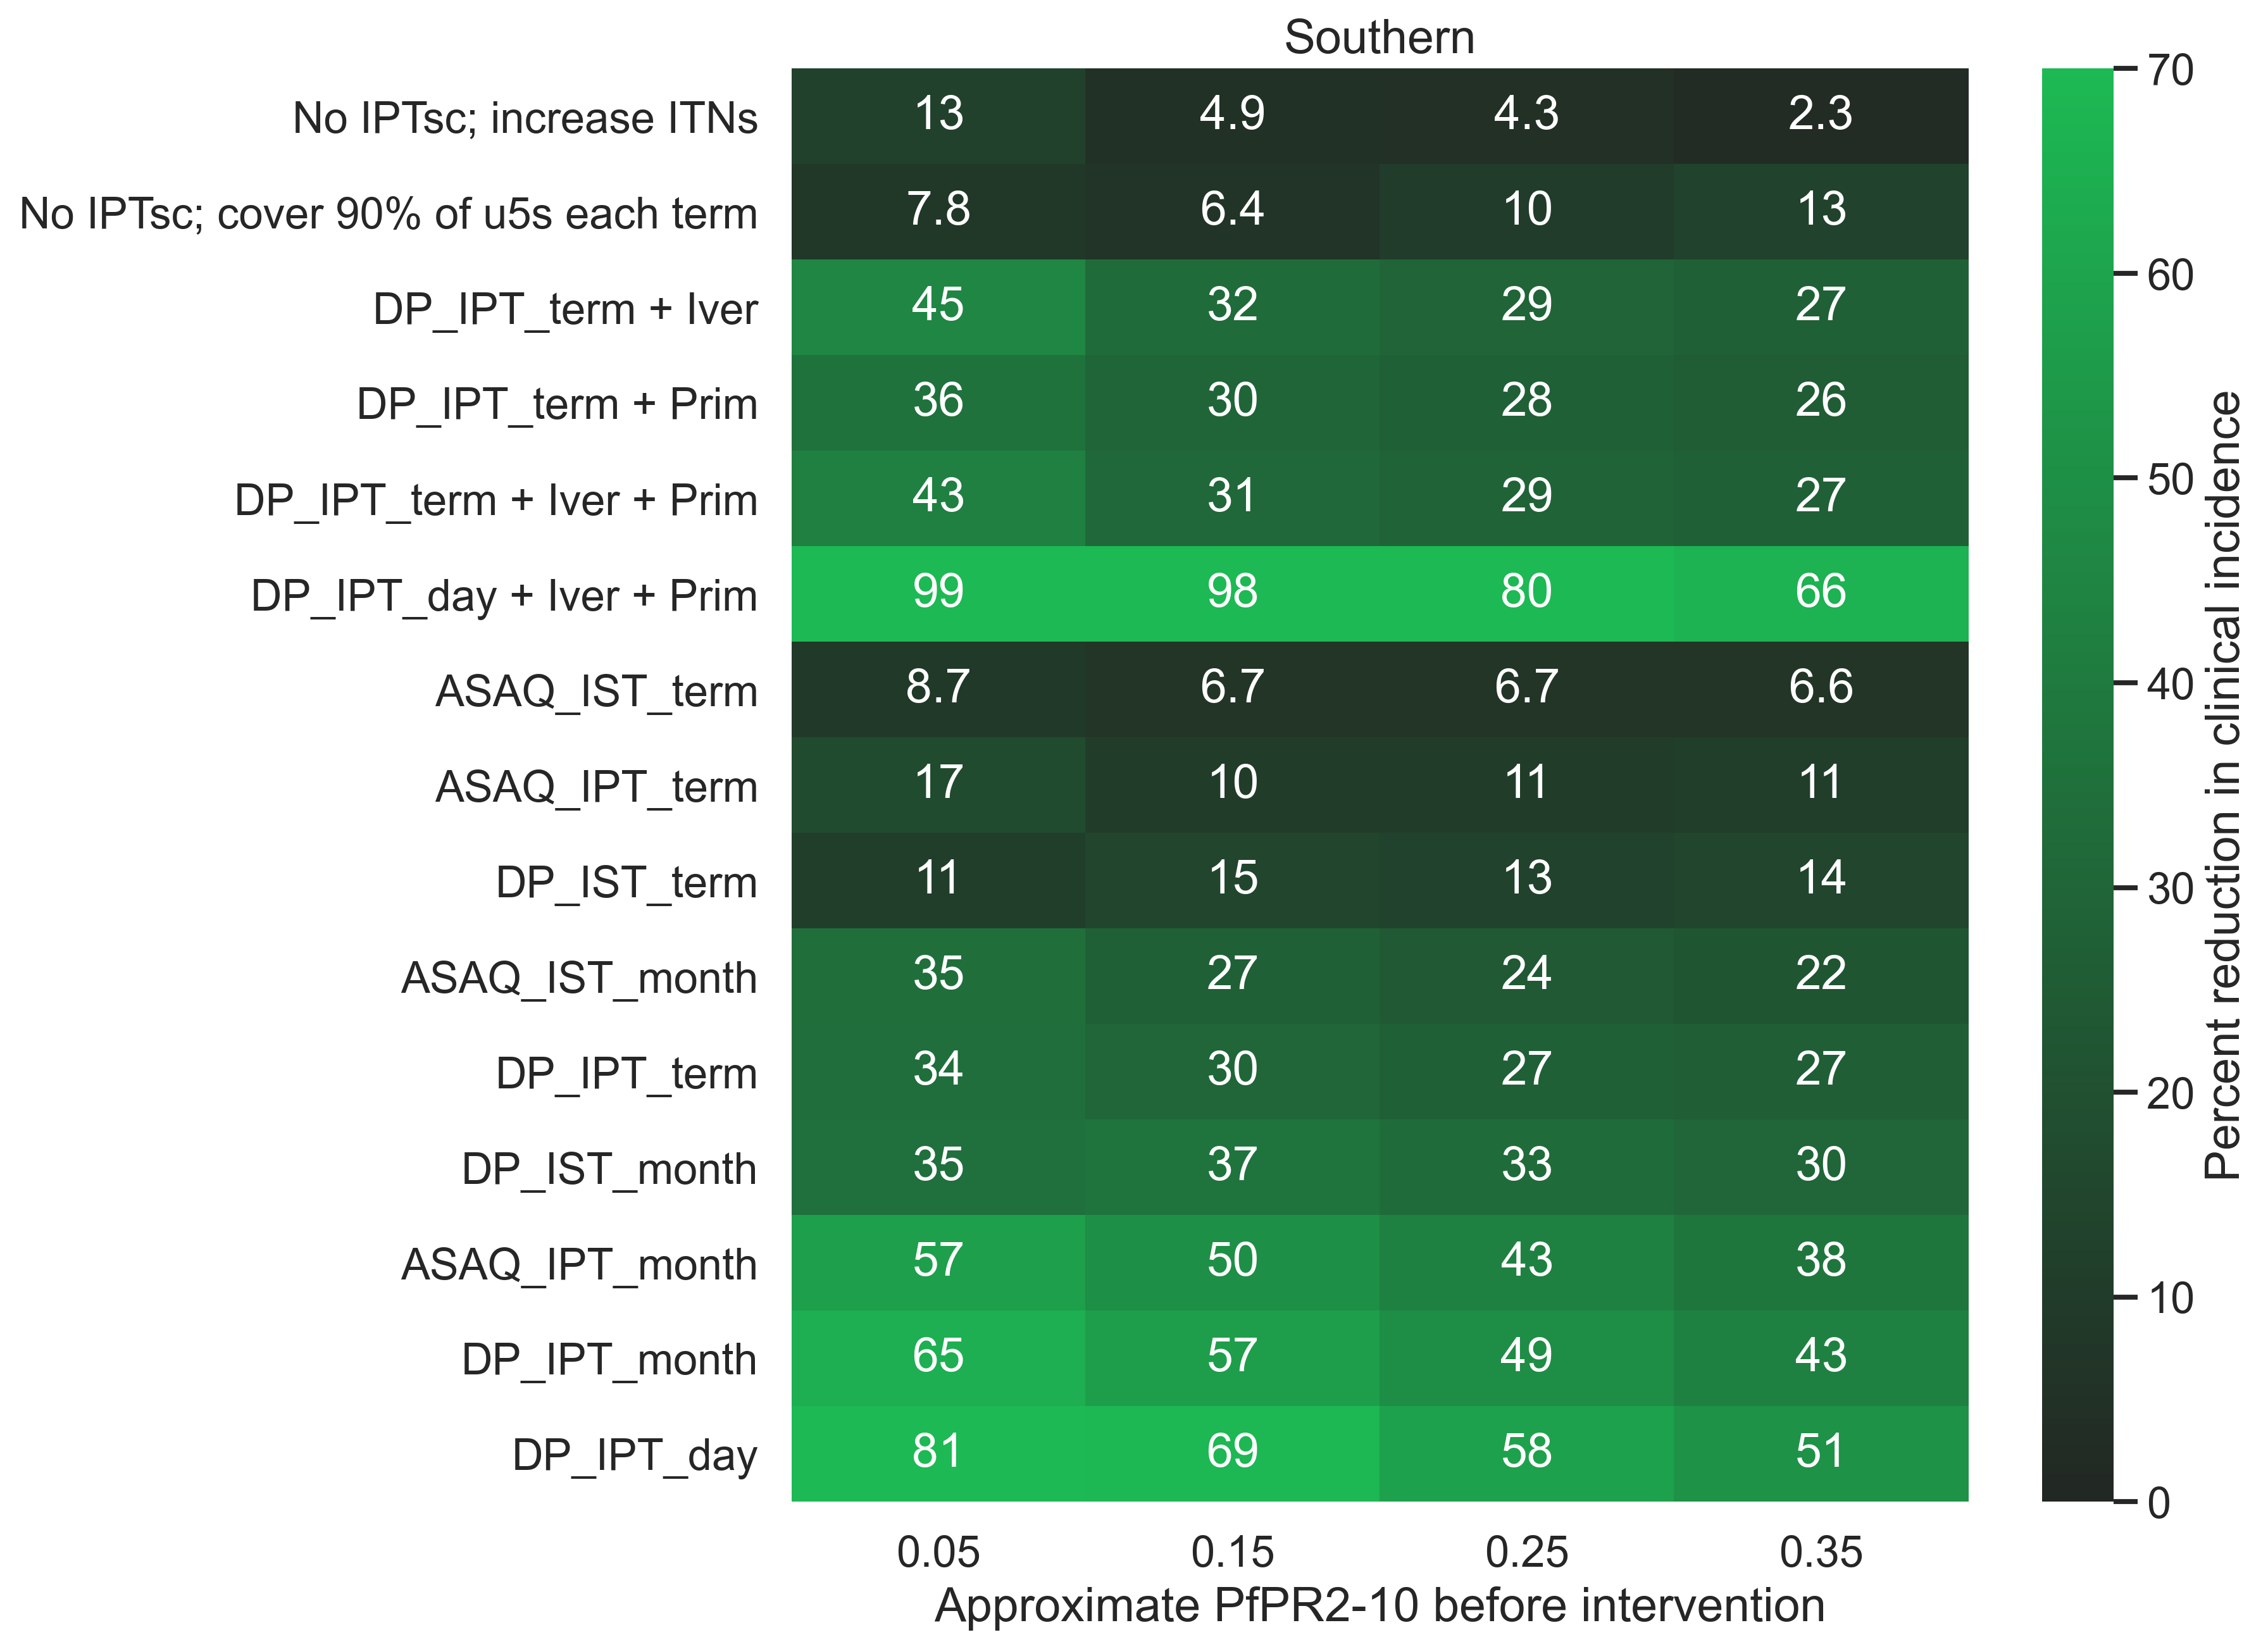

In [116]:
# Same, but now with comparators included:

plt.figure(dpi=300, figsize=(10,10))
archetype="Southern"
foo = get_agg_df_w_baseline(archetype)
# bar = foo[foo["out_of_school_rate"]==0.15]
bar = foo[np.in1d(foo["scenario_number"], [1,4,7,10,13,16,19,22,27,31,32,34,35,36,37])].reset_index(drop=True)
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]
bar.loc[bar["scenario_number"]==31, "intervention_name"] = "No IPTsc; increase ITNs"
bar.loc[bar["scenario_number"]==32, "intervention_name"] = "No IPTsc; cover 90% of u5s each term"
bar.loc[bar["scenario_number"]==34, "intervention_name"] = "DP_IPT_term + Iver"
bar.loc[bar["scenario_number"]==35, "intervention_name"] = "DP_IPT_term + Prim"
bar.loc[bar["scenario_number"]==36, "intervention_name"] = "DP_IPT_term + Iver + Prim"
bar.loc[bar["scenario_number"]==37, "intervention_name"] = "DP_IPT_day + Iver + Prim"

name_list = [
    "No IPTsc; increase ITNs",
    "No IPTsc; cover 90% of u5s each term",
    "DP_IPT_term + Iver",
    "DP_IPT_term + Prim",
    "DP_IPT_term + Iver + Prim",
    "DP_IPT_day + Iver + Prim",
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "ASAQ_IST_month",
    "DP_IPT_term",
    "DP_IST_month",
    "ASAQ_IPT_month",
    "DP_IPT_month",
    "DP_IPT_day"
]


bar['intervention_name'] = pd.Categorical(bar['intervention_name'], name_list)
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=0, vmax=70, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

plt.savefig("figures/2021-04-13_dryrun/southern_heatmap_with_extras.pdf")

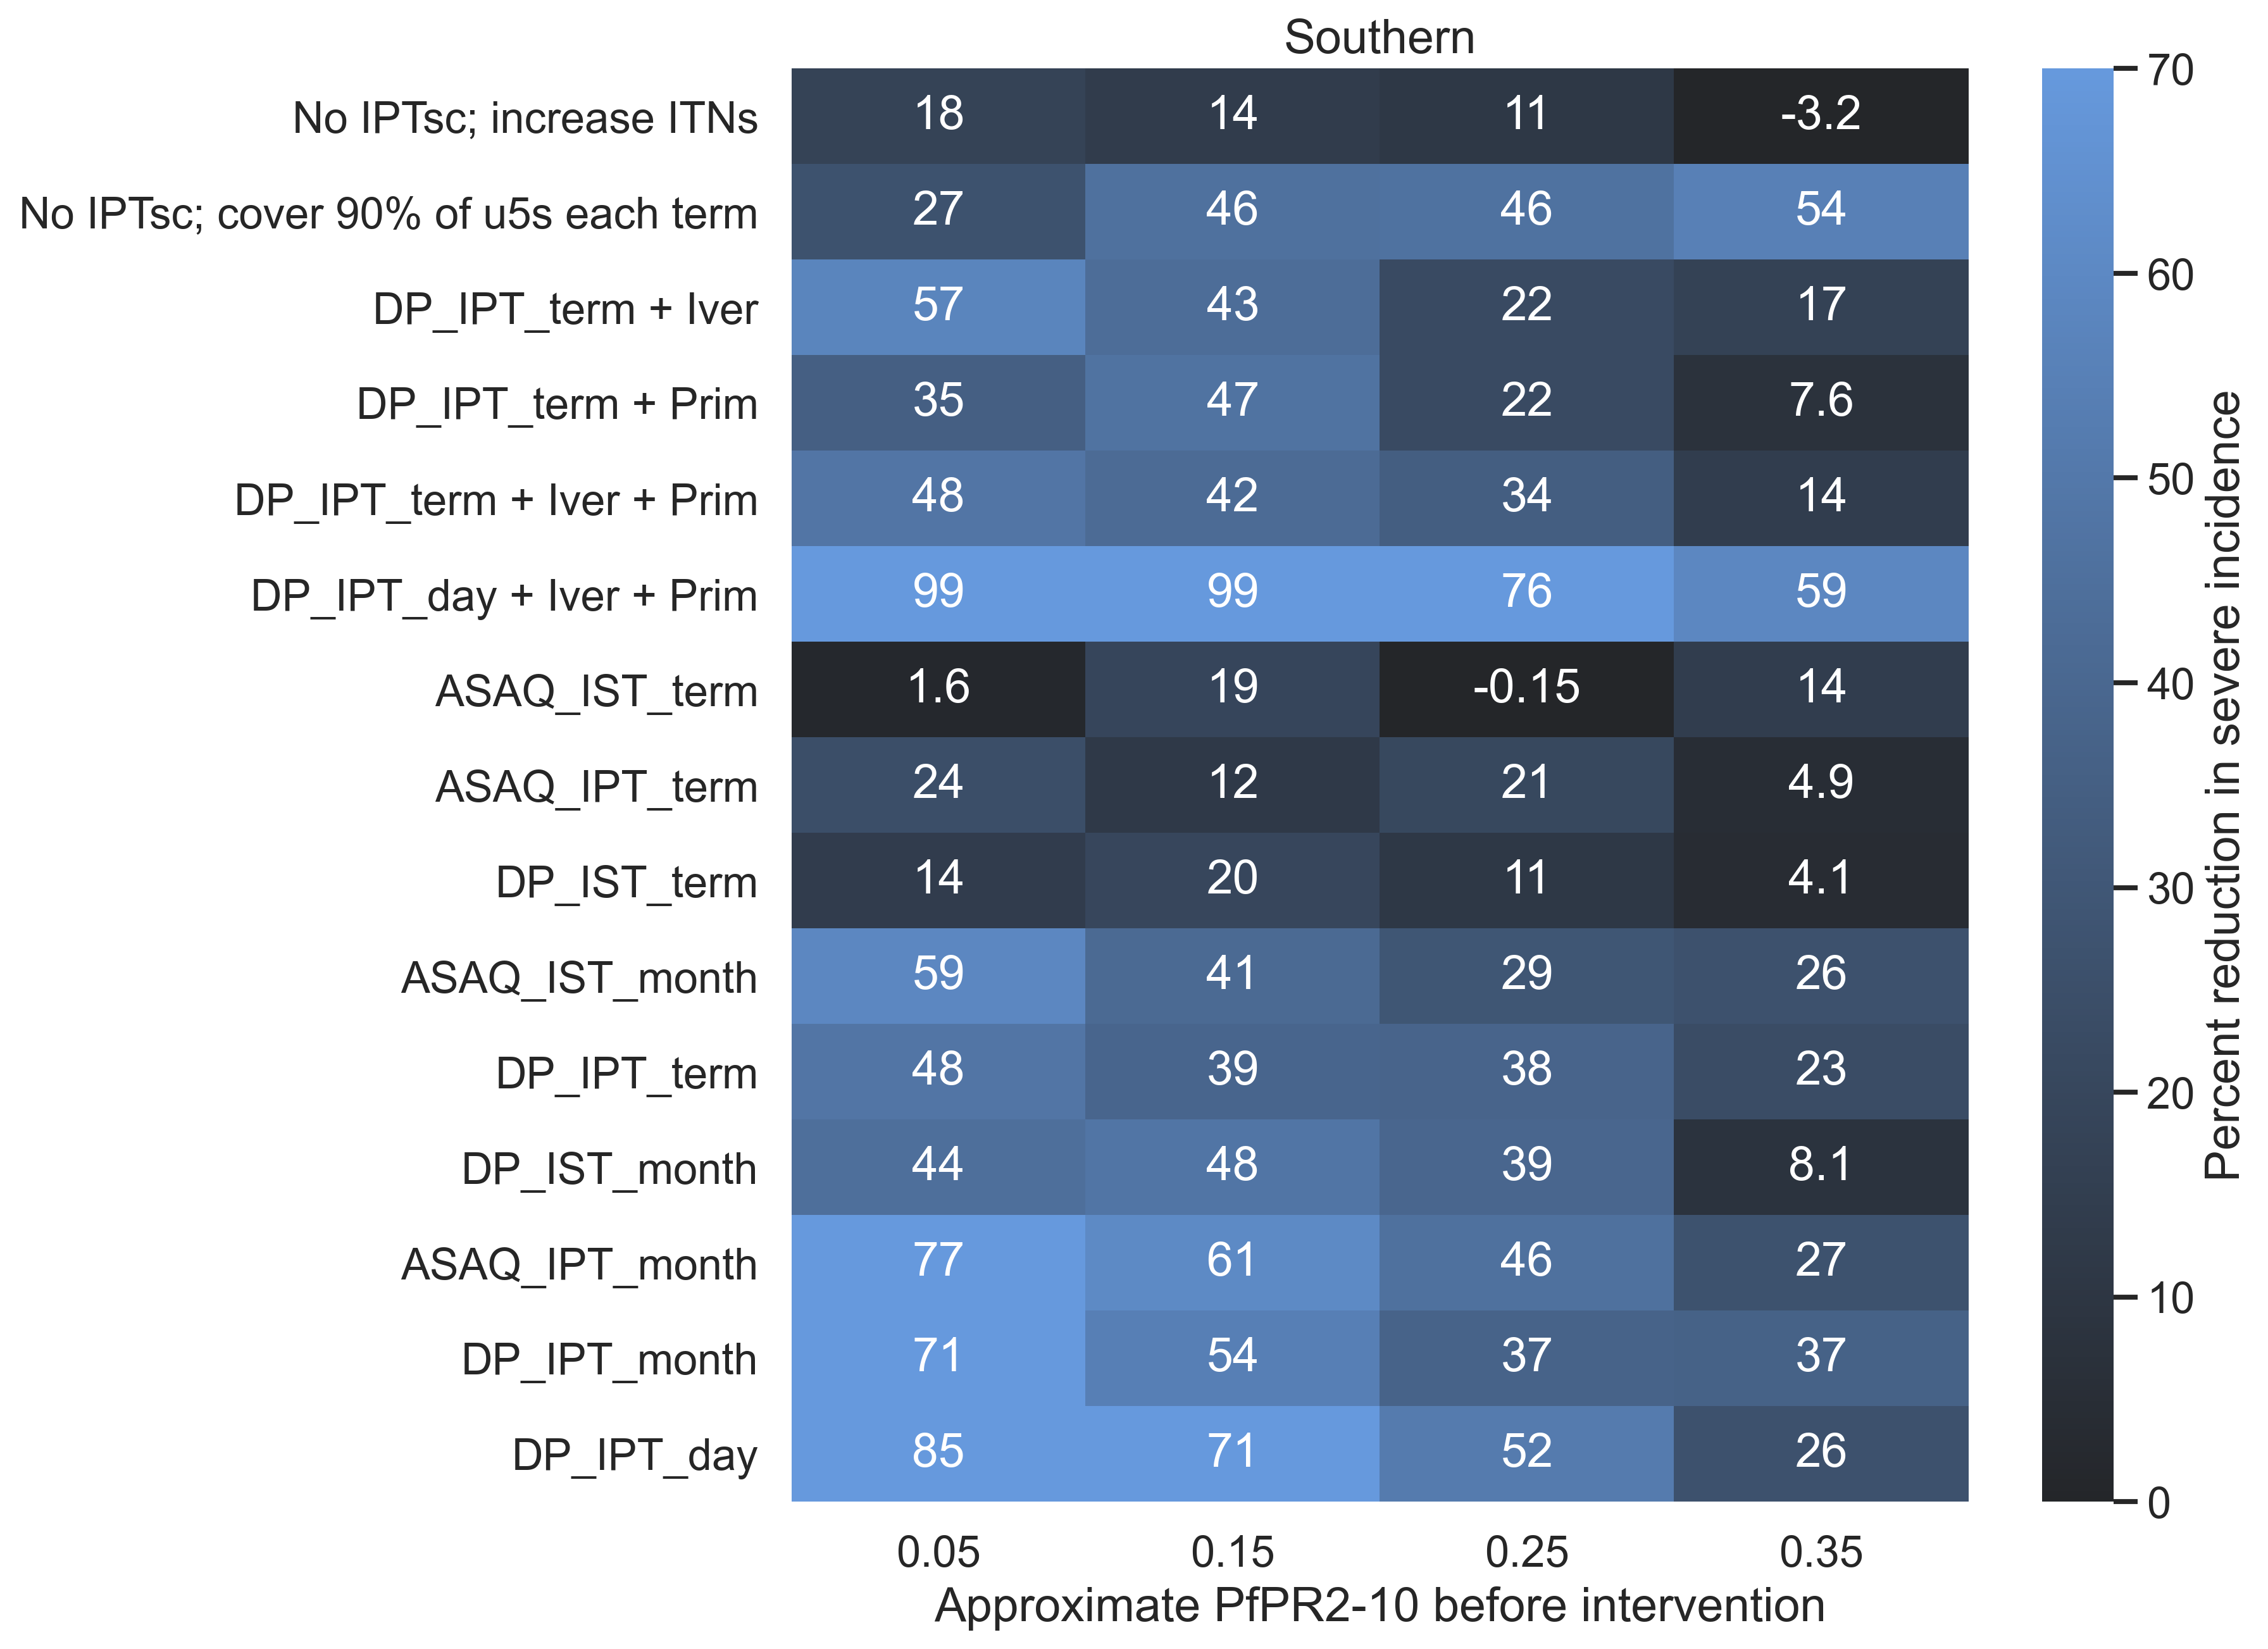

In [117]:
# Same, but now with comparators included:

plt.figure(dpi=300, figsize=(10,10))
archetype="Southern"
foo = get_agg_df_w_baseline(archetype)
# bar = foo[foo["out_of_school_rate"]==0.15]
bar = foo[np.in1d(foo["scenario_number"], [1,4,7,10,13,16,19,22,27,31,32,34,35,36,37])].reset_index(drop=True)
bar["Severe Incidence Reduction"] = 100*(bar["severe_incidence_all_BASELINE"]-bar["severe_incidence_all"])/bar["severe_incidence_all_BASELINE"]
bar["intervention_name"] = bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]
bar.loc[bar["scenario_number"]==31, "intervention_name"] = "No IPTsc; increase ITNs"
bar.loc[bar["scenario_number"]==32, "intervention_name"] = "No IPTsc; cover 90% of u5s each term"
bar.loc[bar["scenario_number"]==34, "intervention_name"] = "DP_IPT_term + Iver"
bar.loc[bar["scenario_number"]==35, "intervention_name"] = "DP_IPT_term + Prim"
bar.loc[bar["scenario_number"]==36, "intervention_name"] = "DP_IPT_term + Iver + Prim"
bar.loc[bar["scenario_number"]==37, "intervention_name"] = "DP_IPT_day + Iver + Prim"

name_list = [
    "No IPTsc; increase ITNs",
    "No IPTsc; cover 90% of u5s each term",
    "DP_IPT_term + Iver",
    "DP_IPT_term + Prim",
    "DP_IPT_term + Iver + Prim",
    "DP_IPT_day + Iver + Prim",
    "ASAQ_IST_term",
    "ASAQ_IPT_term",
    "DP_IST_term",
    "ASAQ_IST_month",
    "DP_IPT_term",
    "DP_IST_month",
    "ASAQ_IPT_month",
    "DP_IPT_month",
    "DP_IPT_day"
]


bar['intervention_name'] = pd.Categorical(bar['intervention_name'], name_list)
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Severe Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in severe incidence'}, 
            vmin=0, vmax=70, cmap=sns.dark_palette("#69d", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

plt.savefig("figures/2021-04-13_dryrun/southern_heatmap_severe_with_extras.pdf")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Text(0.5, 1.0, 'Sahel')

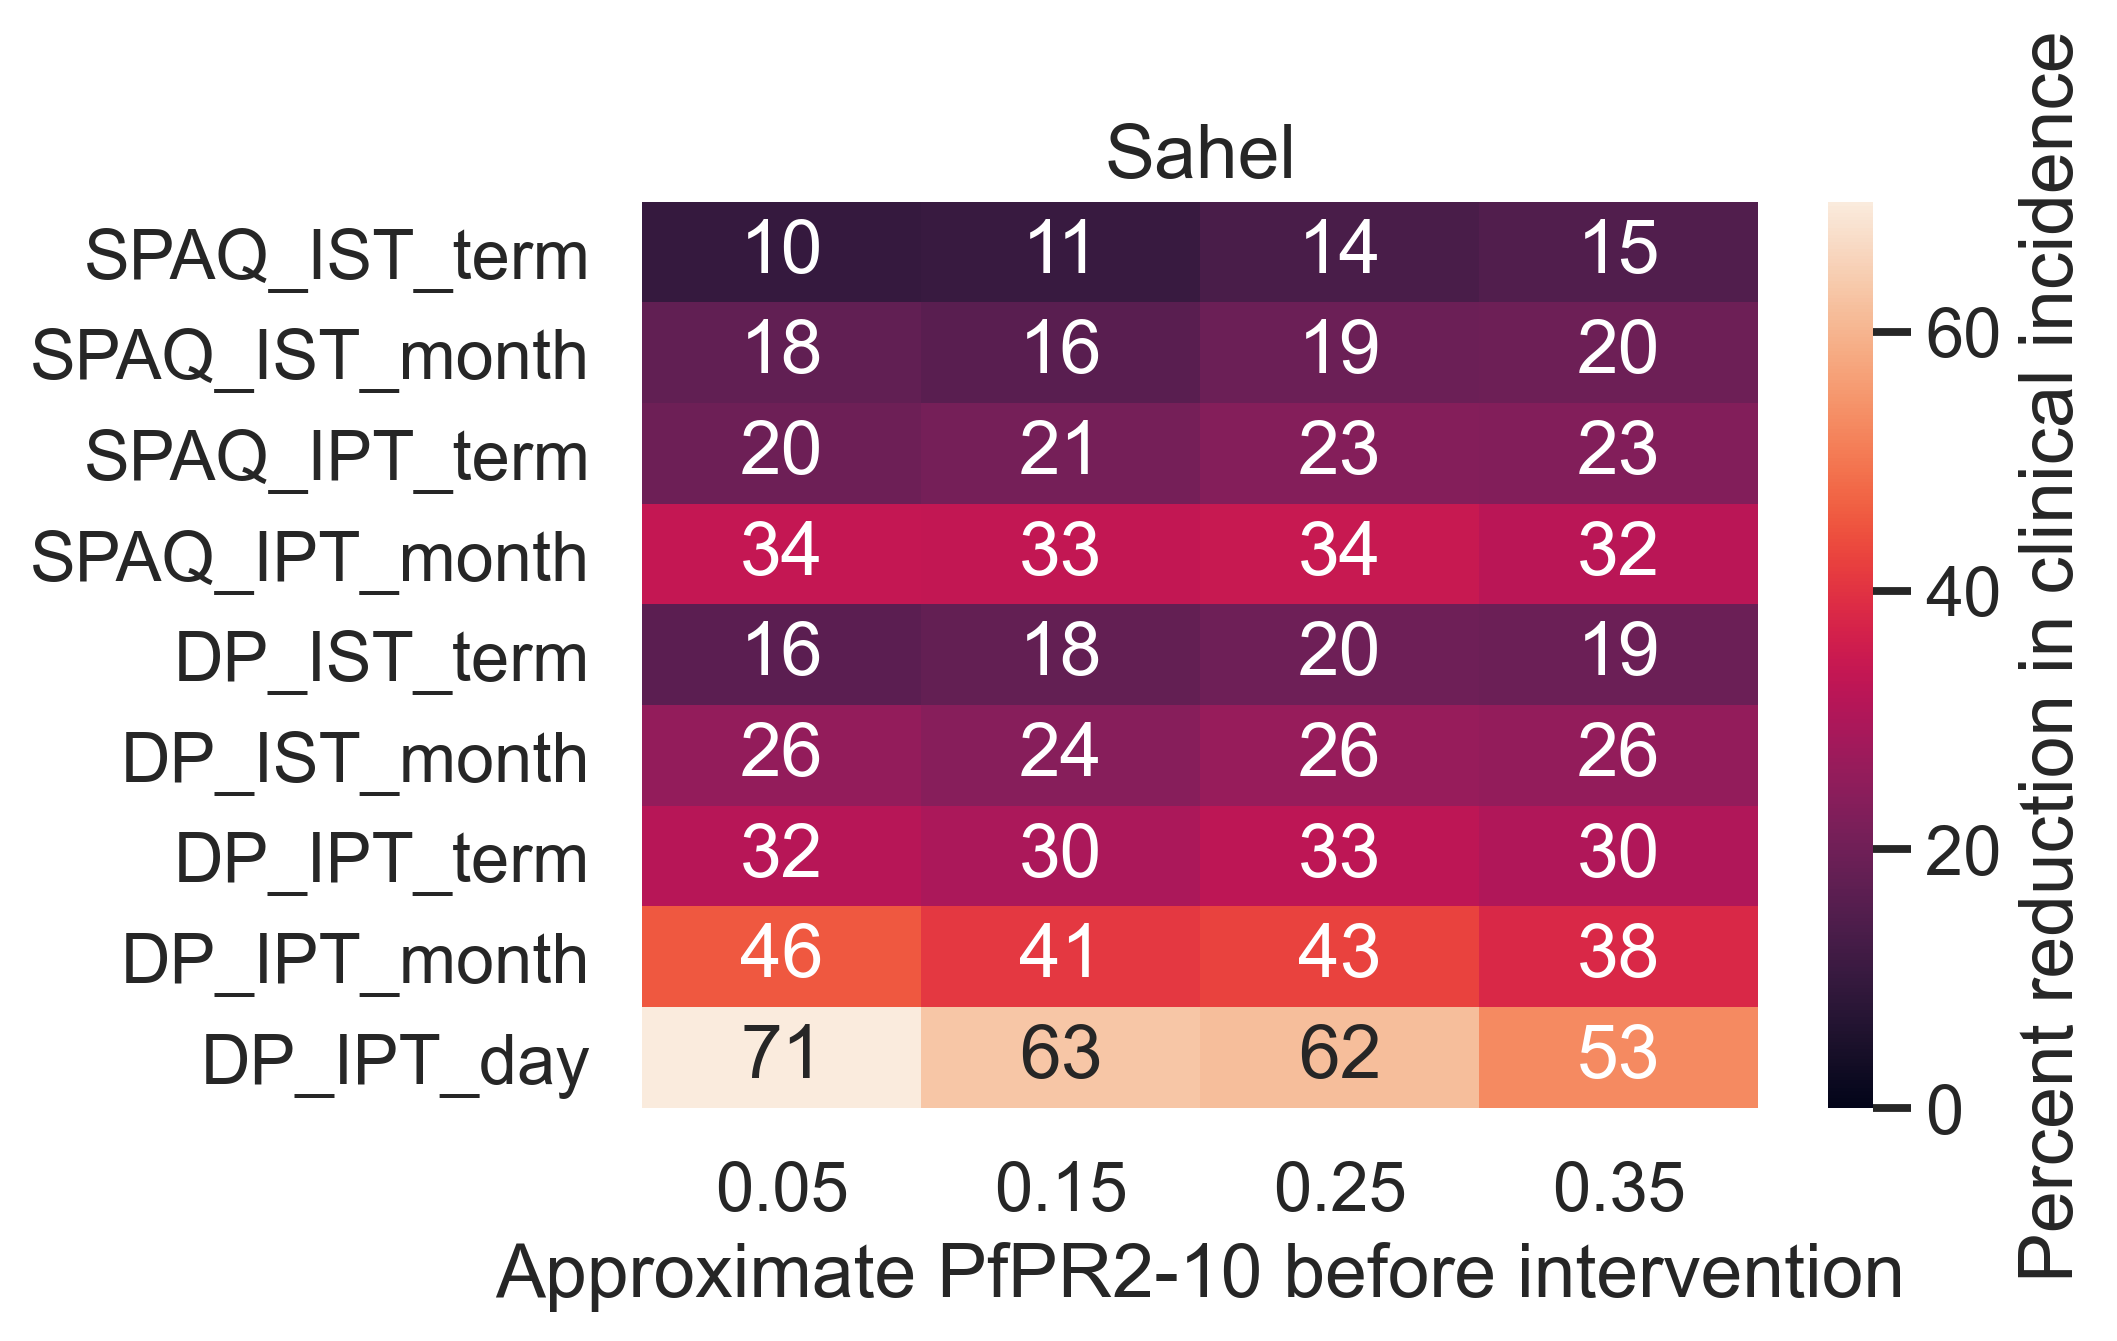

In [121]:
plt.figure(dpi=300)
archetype = "Sahel"
foo = get_agg_df_w_baseline(archetype)
# bar = foo[foo["out_of_school_rate"]==0.15]
bar = foo[np.in1d(foo["scenario_number"], [1,4,7,10,13,16,19,22,27])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]
# bar.sort_values(by=['drug_type', "screen_type", "interval"], ascending=True)

bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, vmin=0, vmax=70)
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

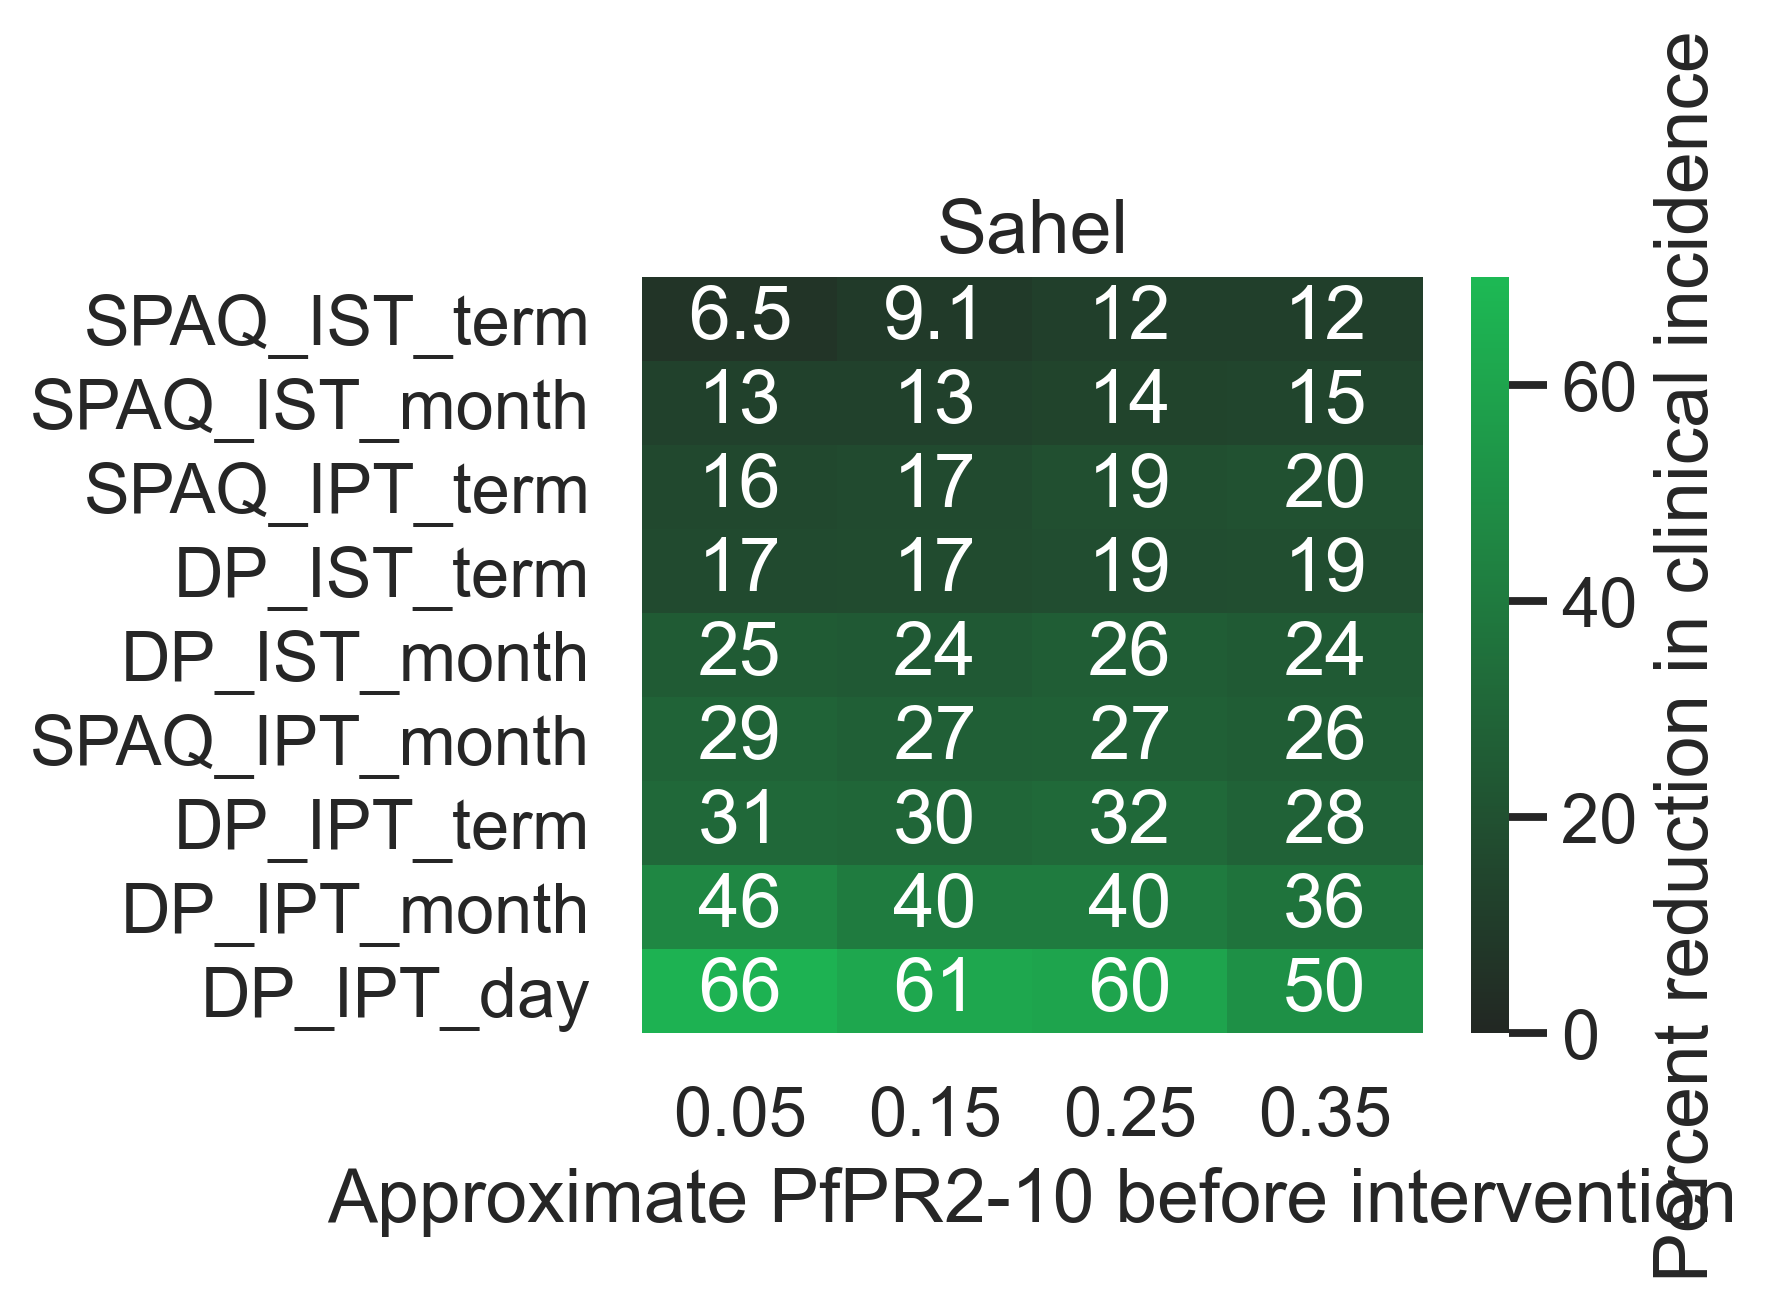

In [86]:
plt.figure(dpi=300)
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype)
# bar = foo[foo["out_of_school_rate"]==0.15]
bar = foo[np.in1d(foo["scenario_number"], [1,4,7,10,13,16,19,22,27])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]

name_list = [
    "SPAQ_IST_term",
    "SPAQ_IST_month",
    "SPAQ_IPT_term",
    "DP_IST_term",
    "DP_IST_month",
    "SPAQ_IPT_month",
    "DP_IPT_term",
    "DP_IPT_month",
    "DP_IPT_day"
]

bar['intervention_name'] = pd.Categorical(bar['intervention_name'], name_list)
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=0, vmax=70, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)
plt.tight_layout()

plt.savefig("figures/2021-04-13_dryrun/sahel_heatmap.pdf")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

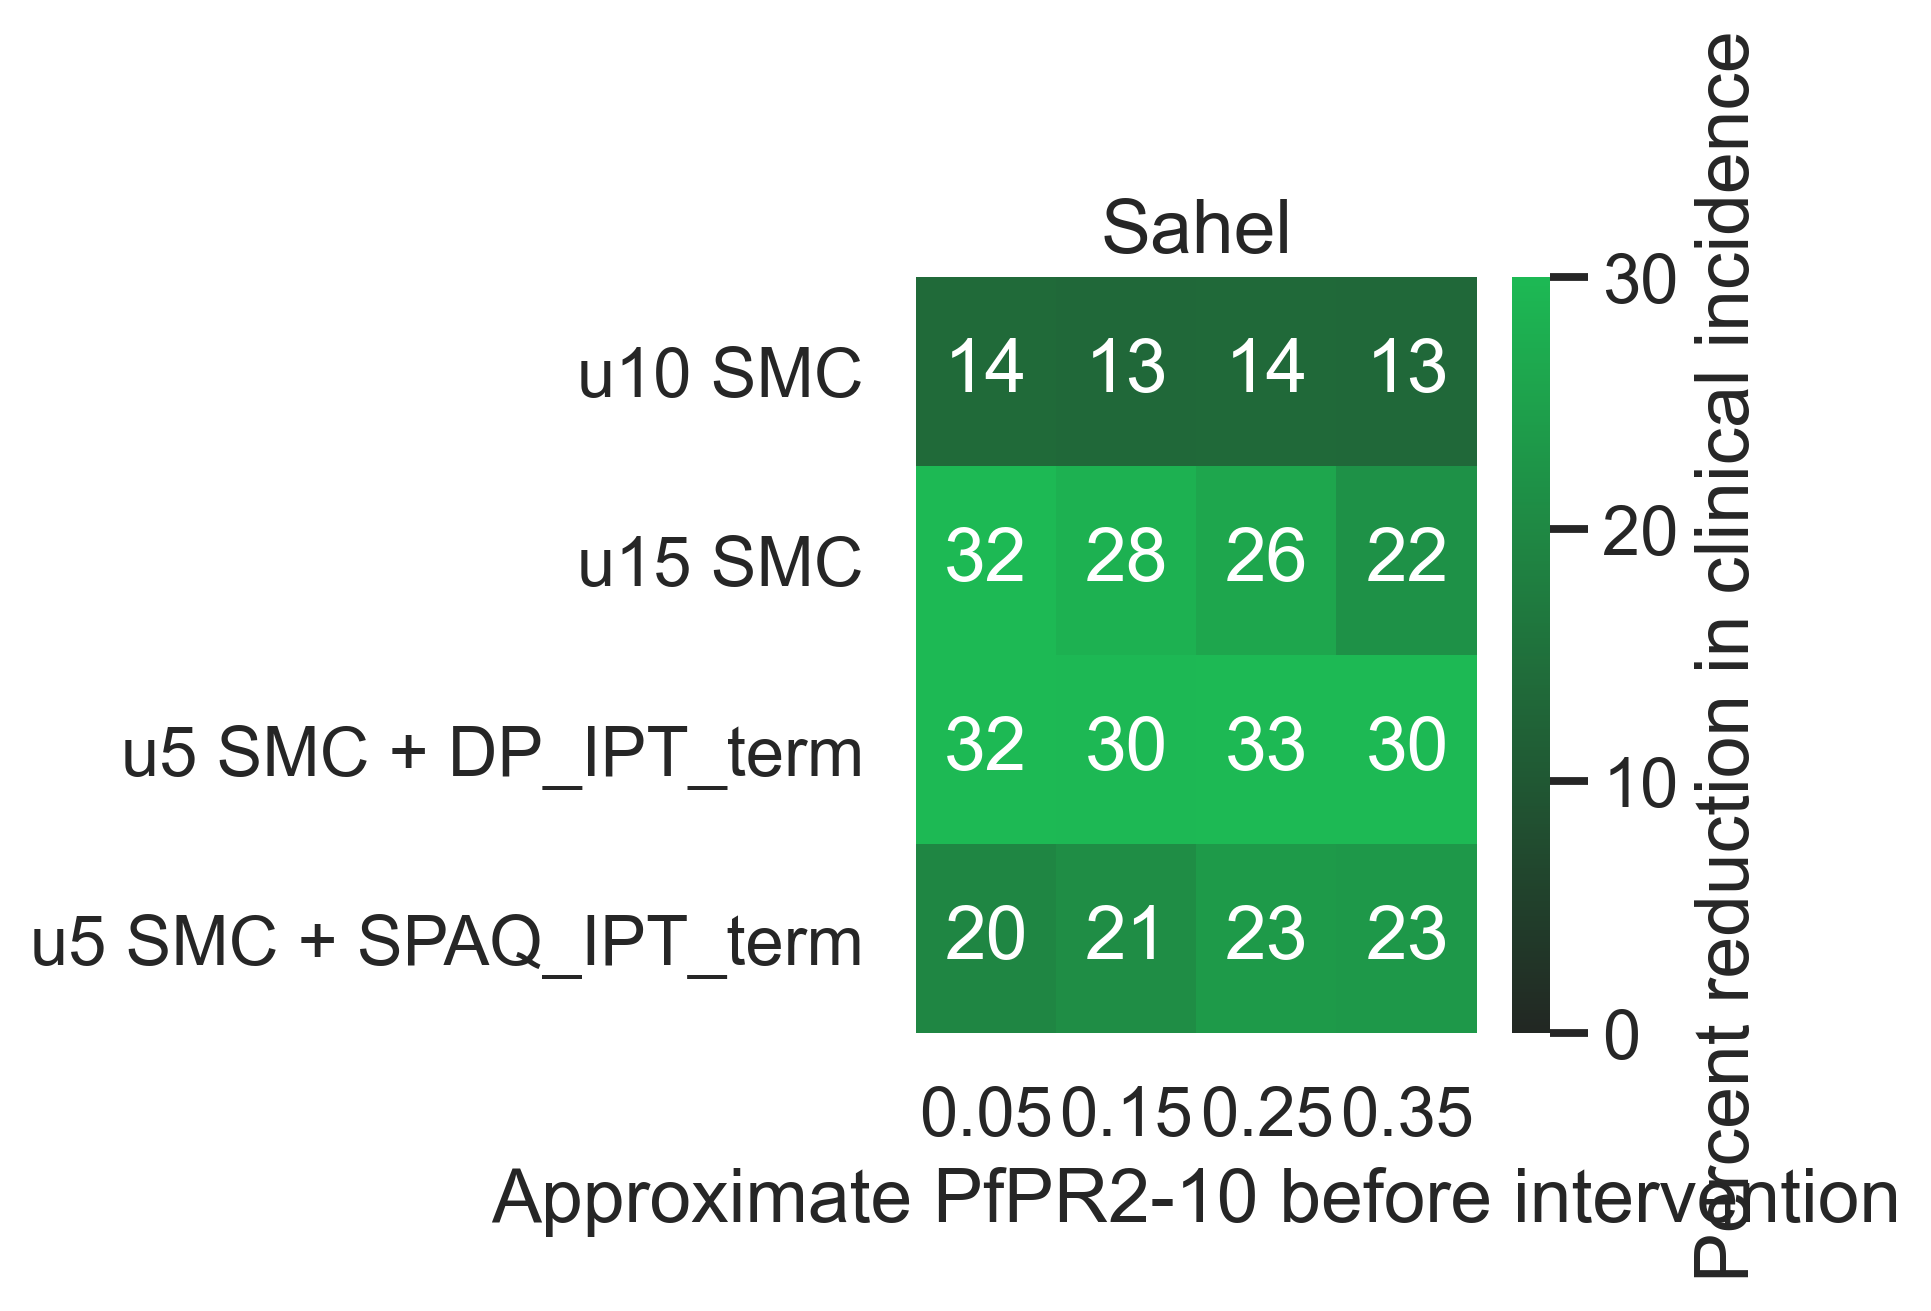

In [122]:
plt.figure(dpi=300)
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype)
# bar = foo[foo["out_of_school_rate"]==0.15]
bar = foo[np.in1d(foo["scenario_number"], [1, 13,35,36])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]

bar["intervention_name"] = "u5 SMC + " + bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]

bar.loc[bar["scenario_number"]==35, "intervention_name"] = "u10 SMC"
bar.loc[bar["scenario_number"]==36, "intervention_name"] = "u15 SMC"

# name_list = [
#     "SPAQ_IST_term",
#     "SPAQ_IST_month",
#     "SPAQ_IPT_term",
#     "DP_IST_term",
#     "DP_IST_month",
#     "SPAQ_IPT_month",
#     "DP_IPT_term",
#     "DP_IPT_month",
#     "DP_IPT_day"
# ]

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], name_list)
# bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=0, vmax=30, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)
plt.tight_layout()

# plt.savefig("figures/2021-04-13_dryrun/sahel_heatmap.pdf")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Southern')

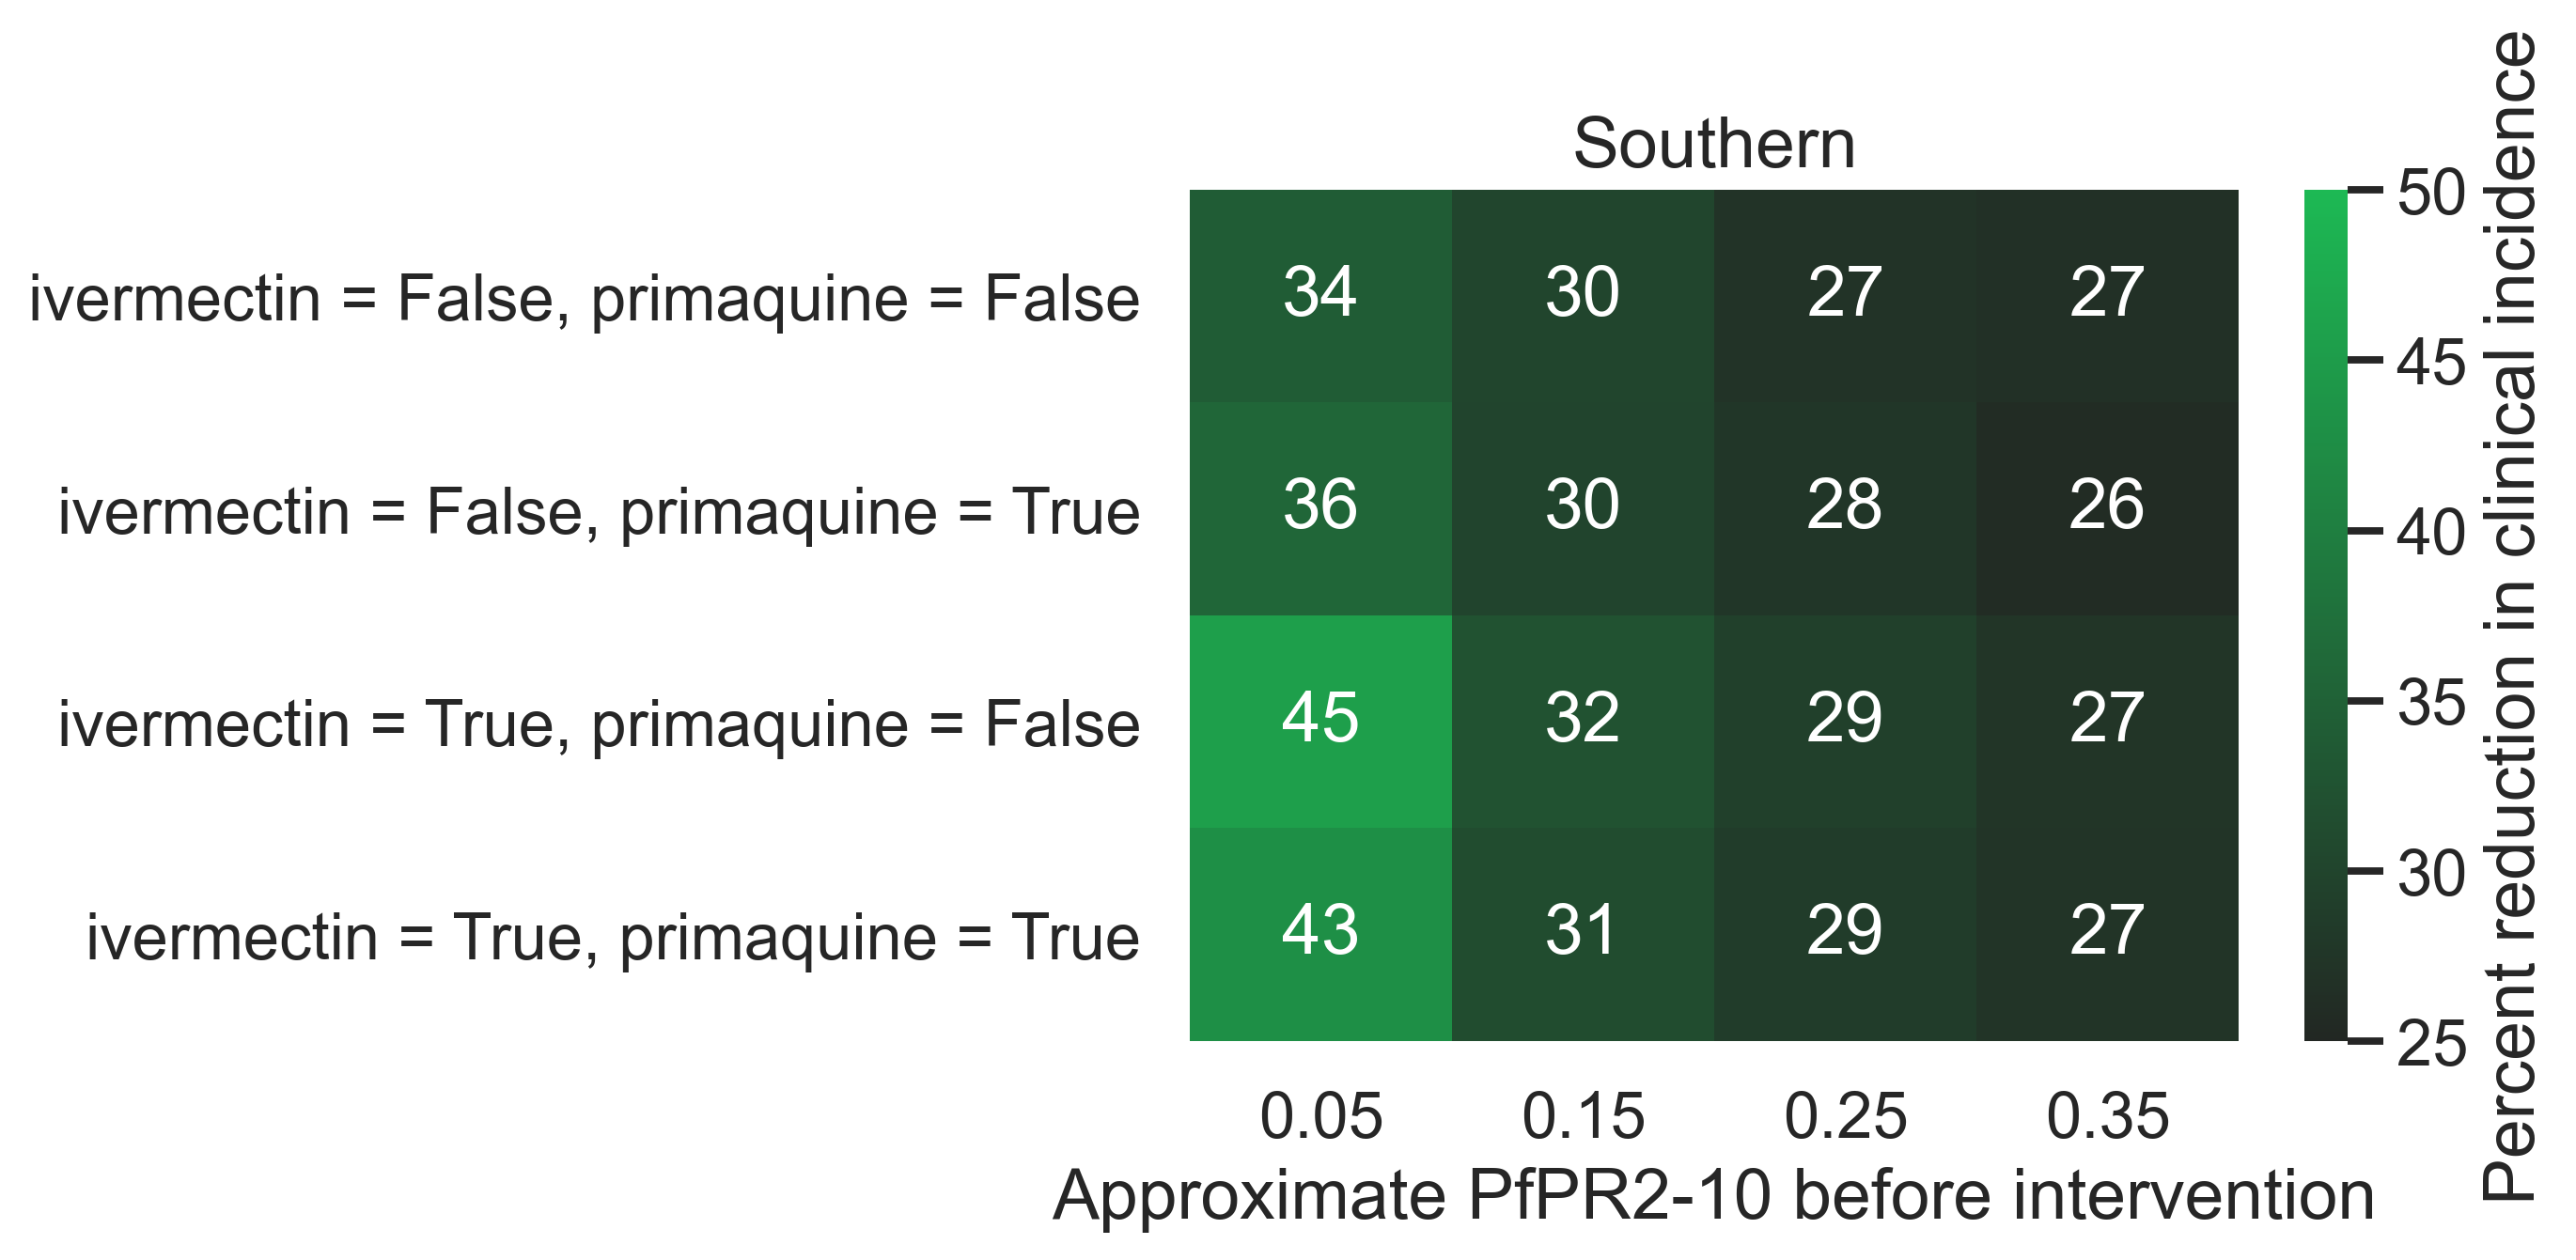

In [123]:
plt.figure(dpi=300)
archetype="Southern"
foo = get_agg_df_w_baseline(archetype)
bar = foo[np.in1d(foo["scenario_number"], [13,34,35,36])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = "ivermectin = " + bar["ivermectin"].astype("string") \
+", primaquine = "+bar["primaquine"].astype("string")

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=25, vmax=50, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Southern')

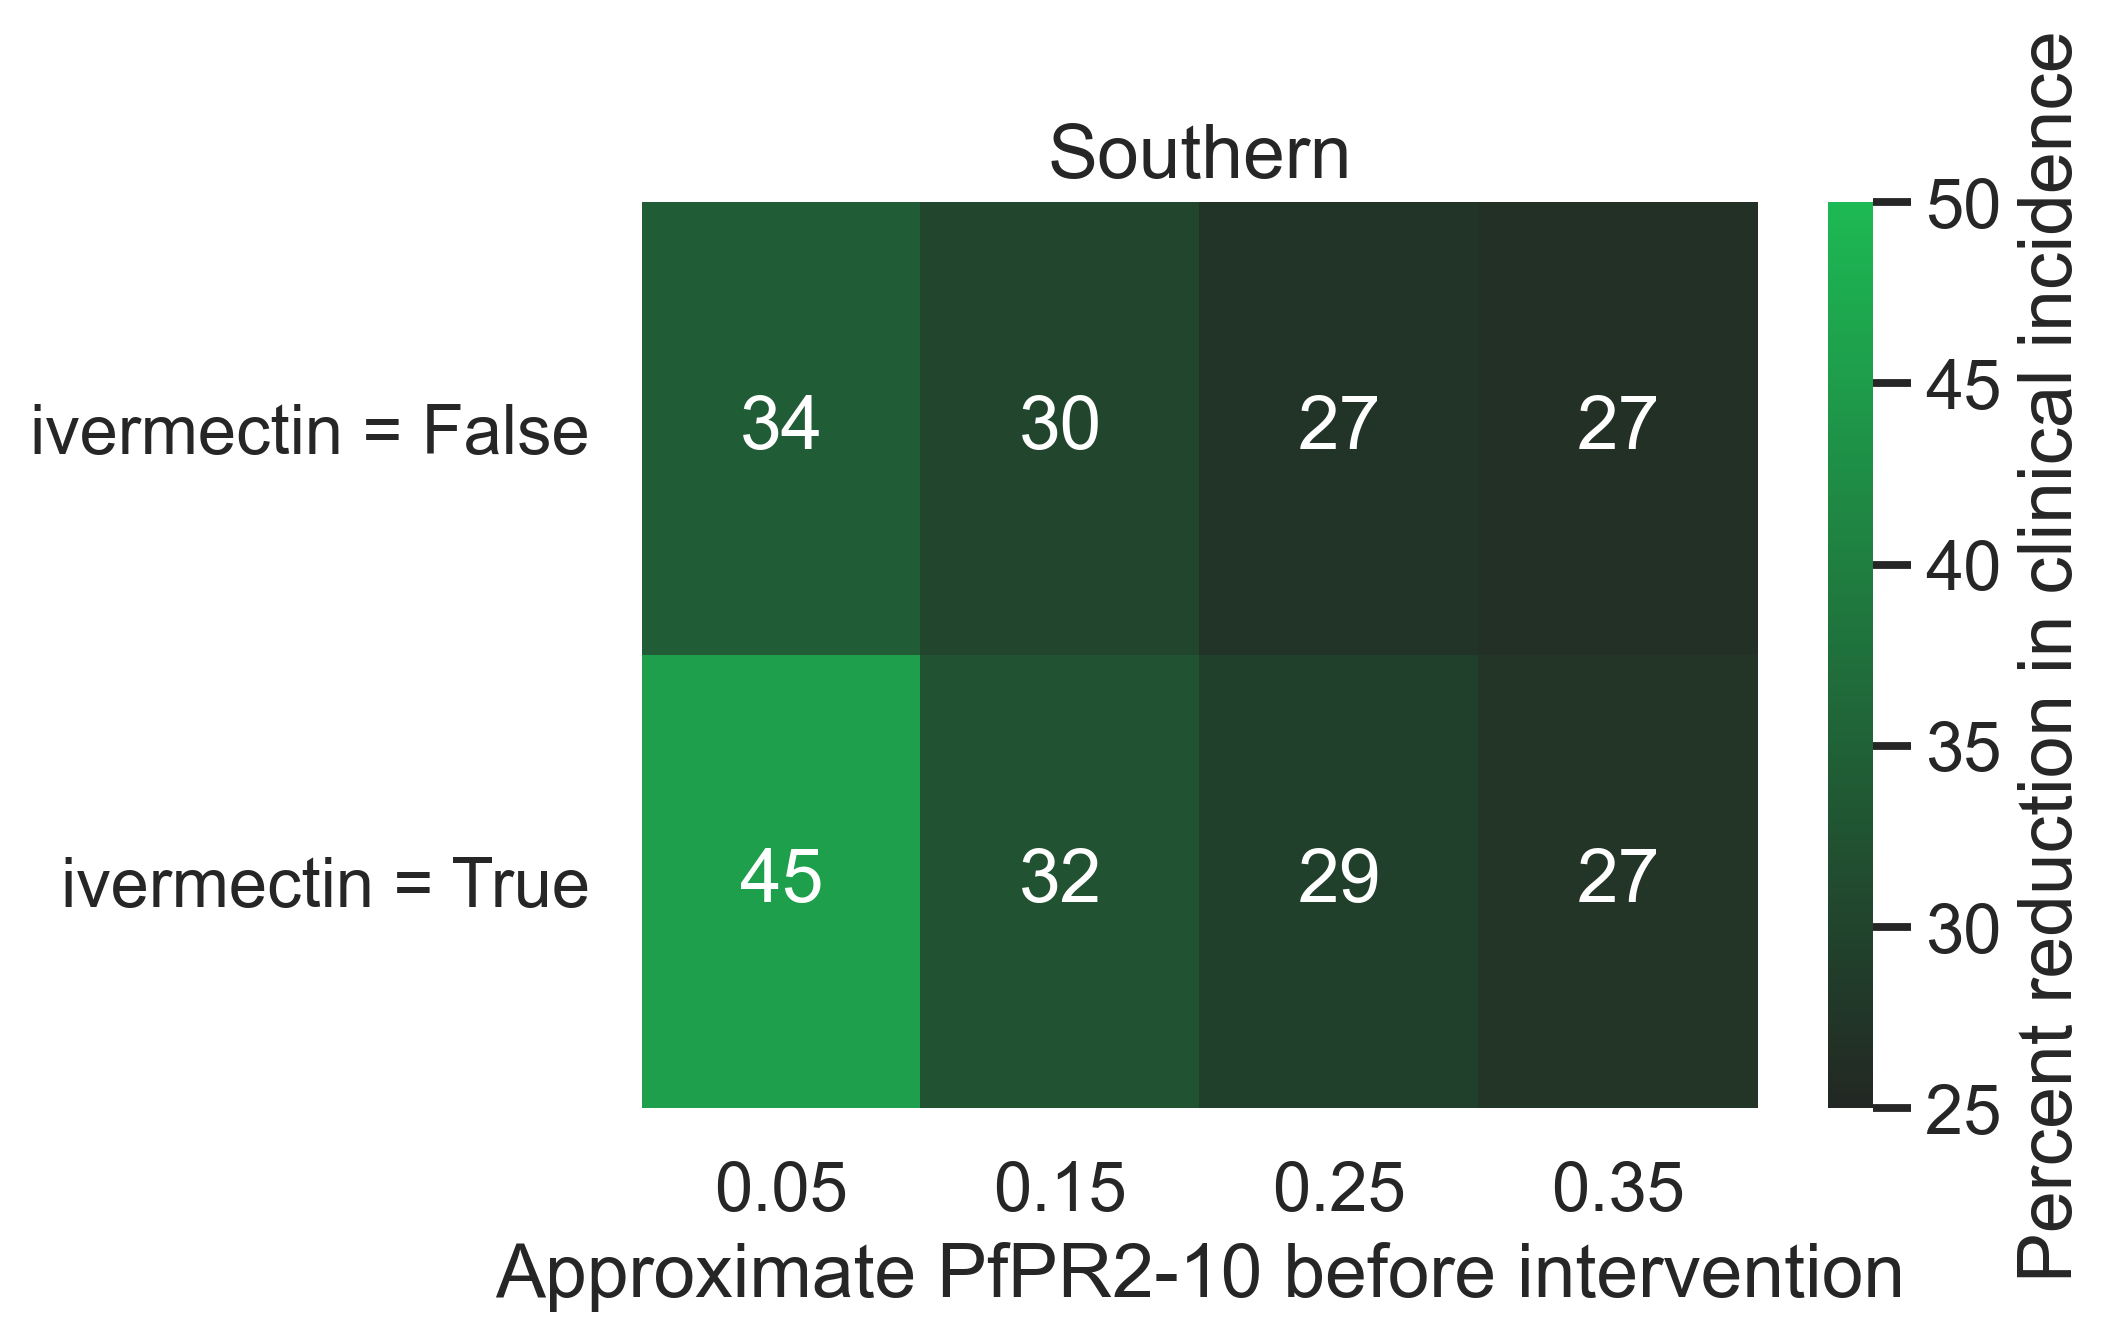

In [95]:
plt.figure(dpi=300)
archetype="Southern"
foo = get_agg_df_w_baseline(archetype)
bar = foo[np.in1d(foo["scenario_number"], [13,34])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = "ivermectin = " + bar["ivermectin"].astype("string")

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=25, vmax=50, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

In [100]:
plt.figure(dpi=300)
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype)
bar = foo[np.in1d(foo["scenario_number"], [13,44])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = "ivermectin = " + bar["ivermectin"].astype("string")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1800x1200 with 0 Axes>

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Southern')

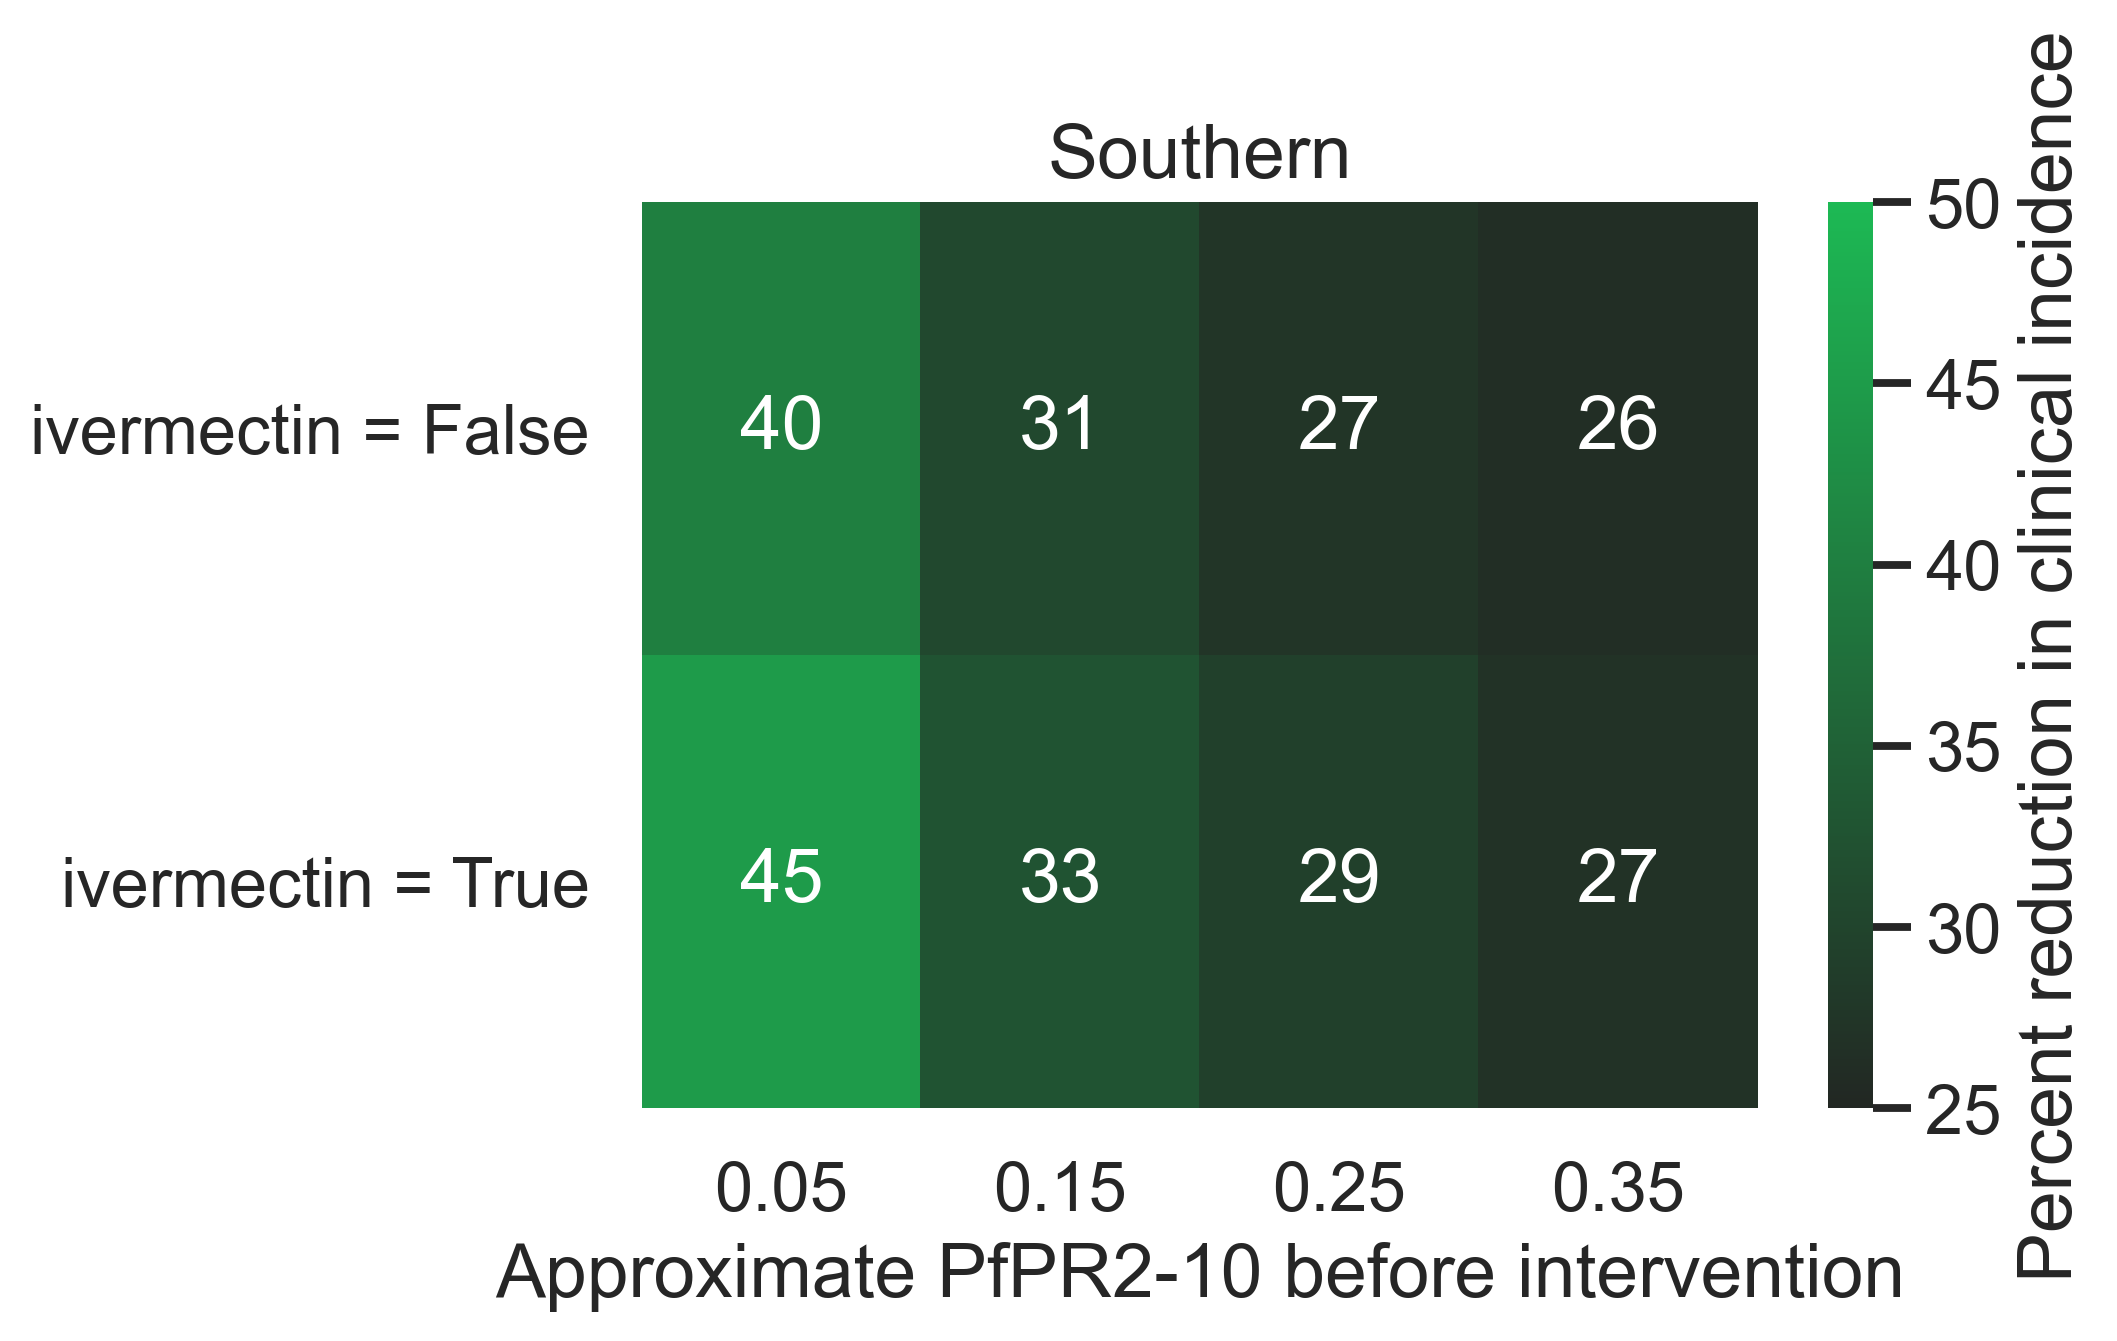

In [113]:
# NOW WITH MEDIAN
plt.figure(dpi=300)
archetype="Southern"
foo = get_agg_df_w_baseline(archetype, agg_type="median")
bar = foo[np.in1d(foo["scenario_number"], [13,34])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = "ivermectin = " + bar["ivermectin"].astype("string")

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=25, vmax=50, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Sahel')

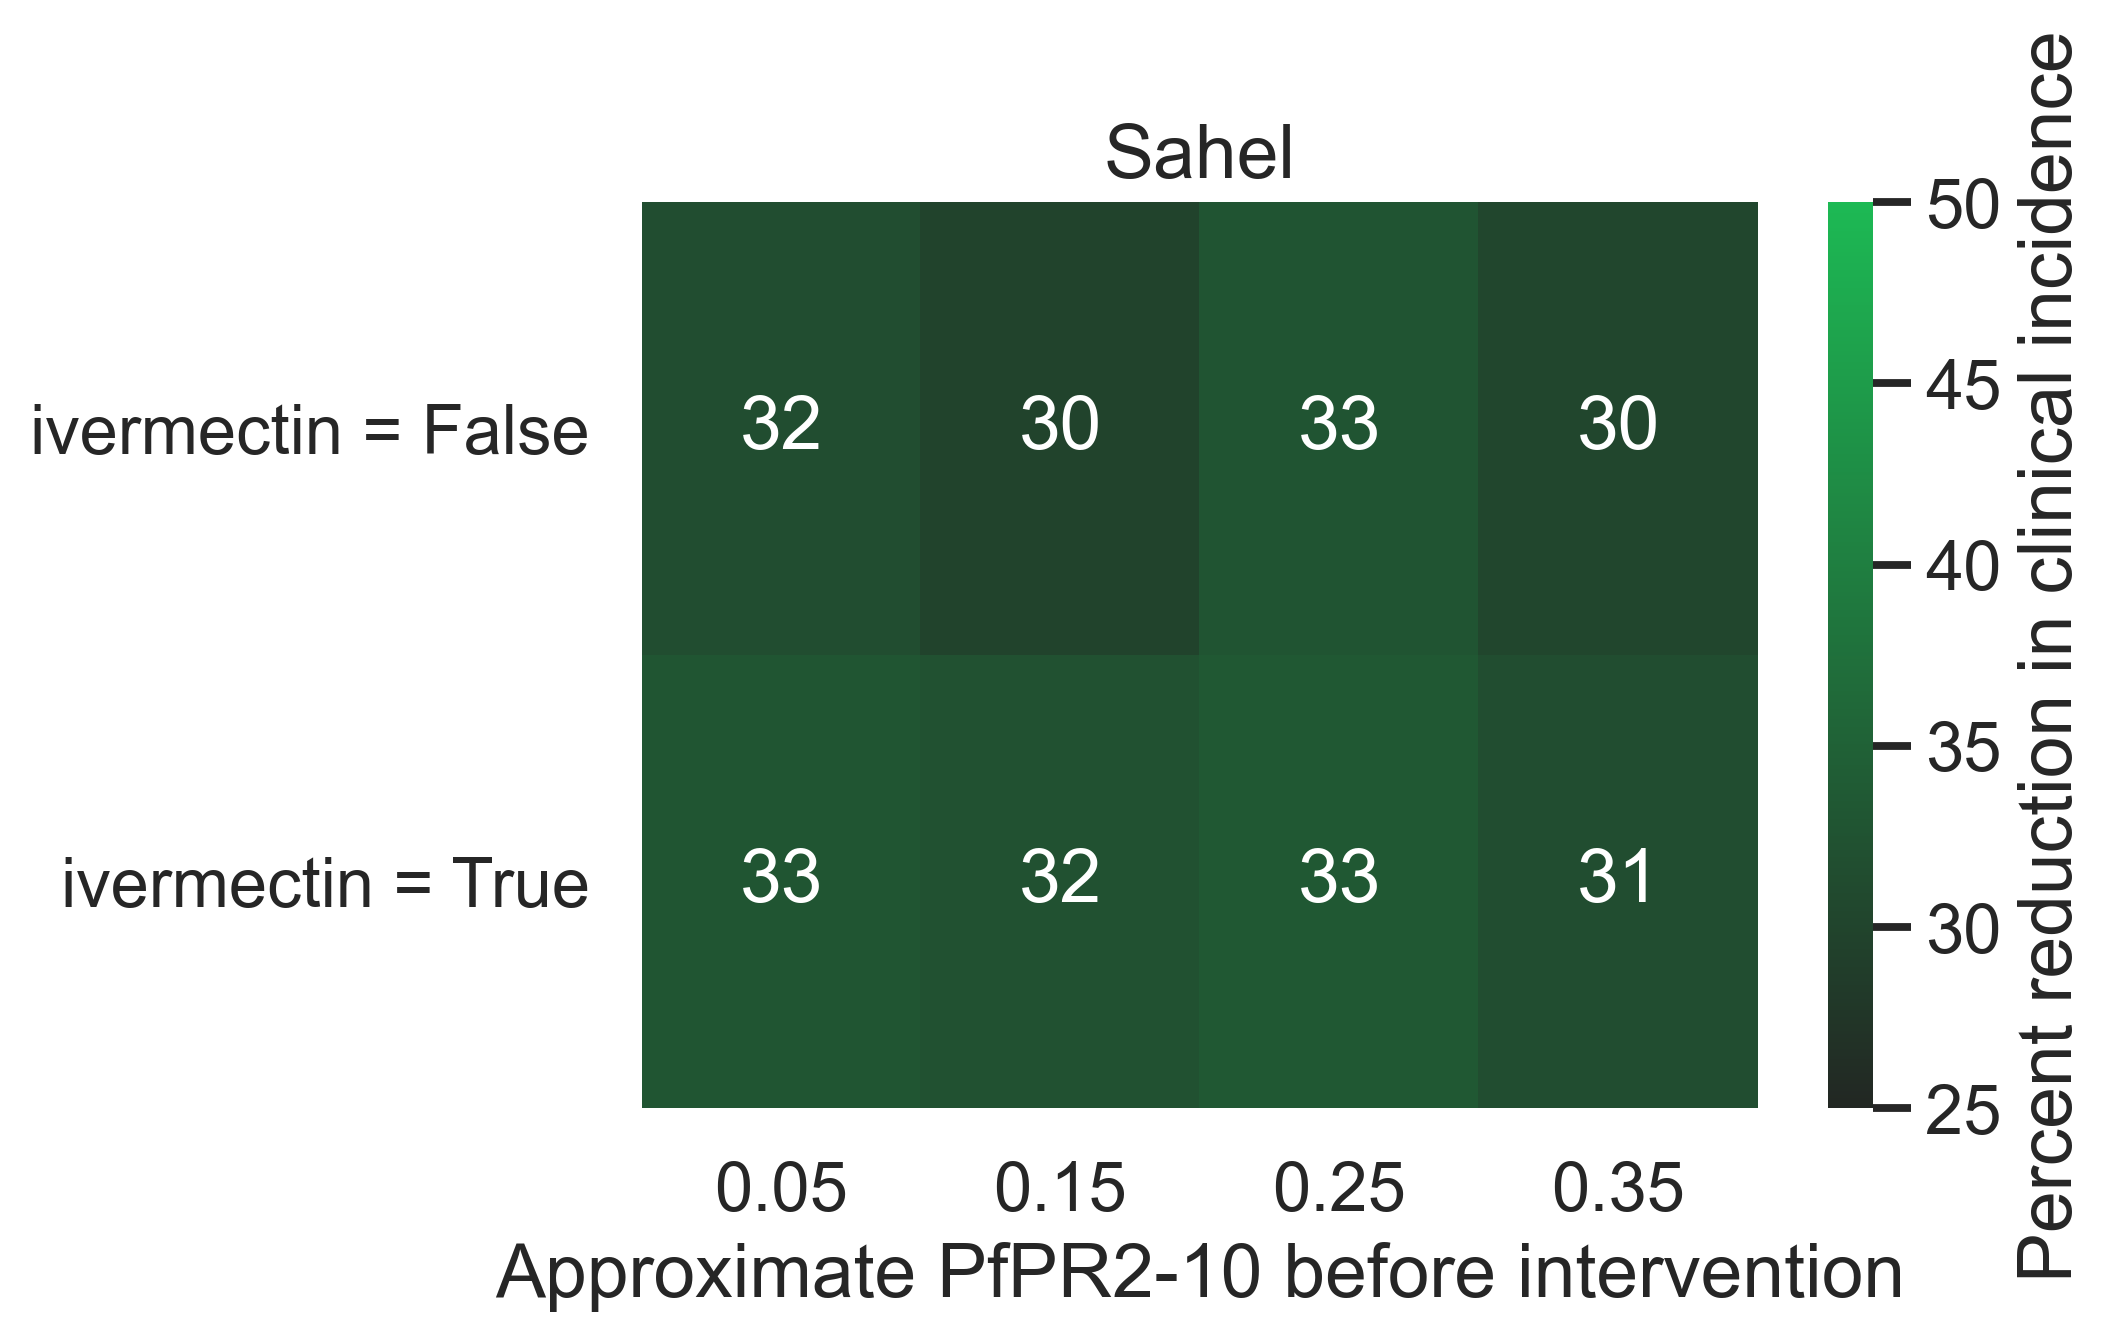

In [99]:
plt.figure(dpi=300)
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype)
bar = foo[np.in1d(foo["scenario_number"], [13,44])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = "ivermectin = " + bar["ivermectin"].astype("string")

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=25, vmax=50, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Sahel')

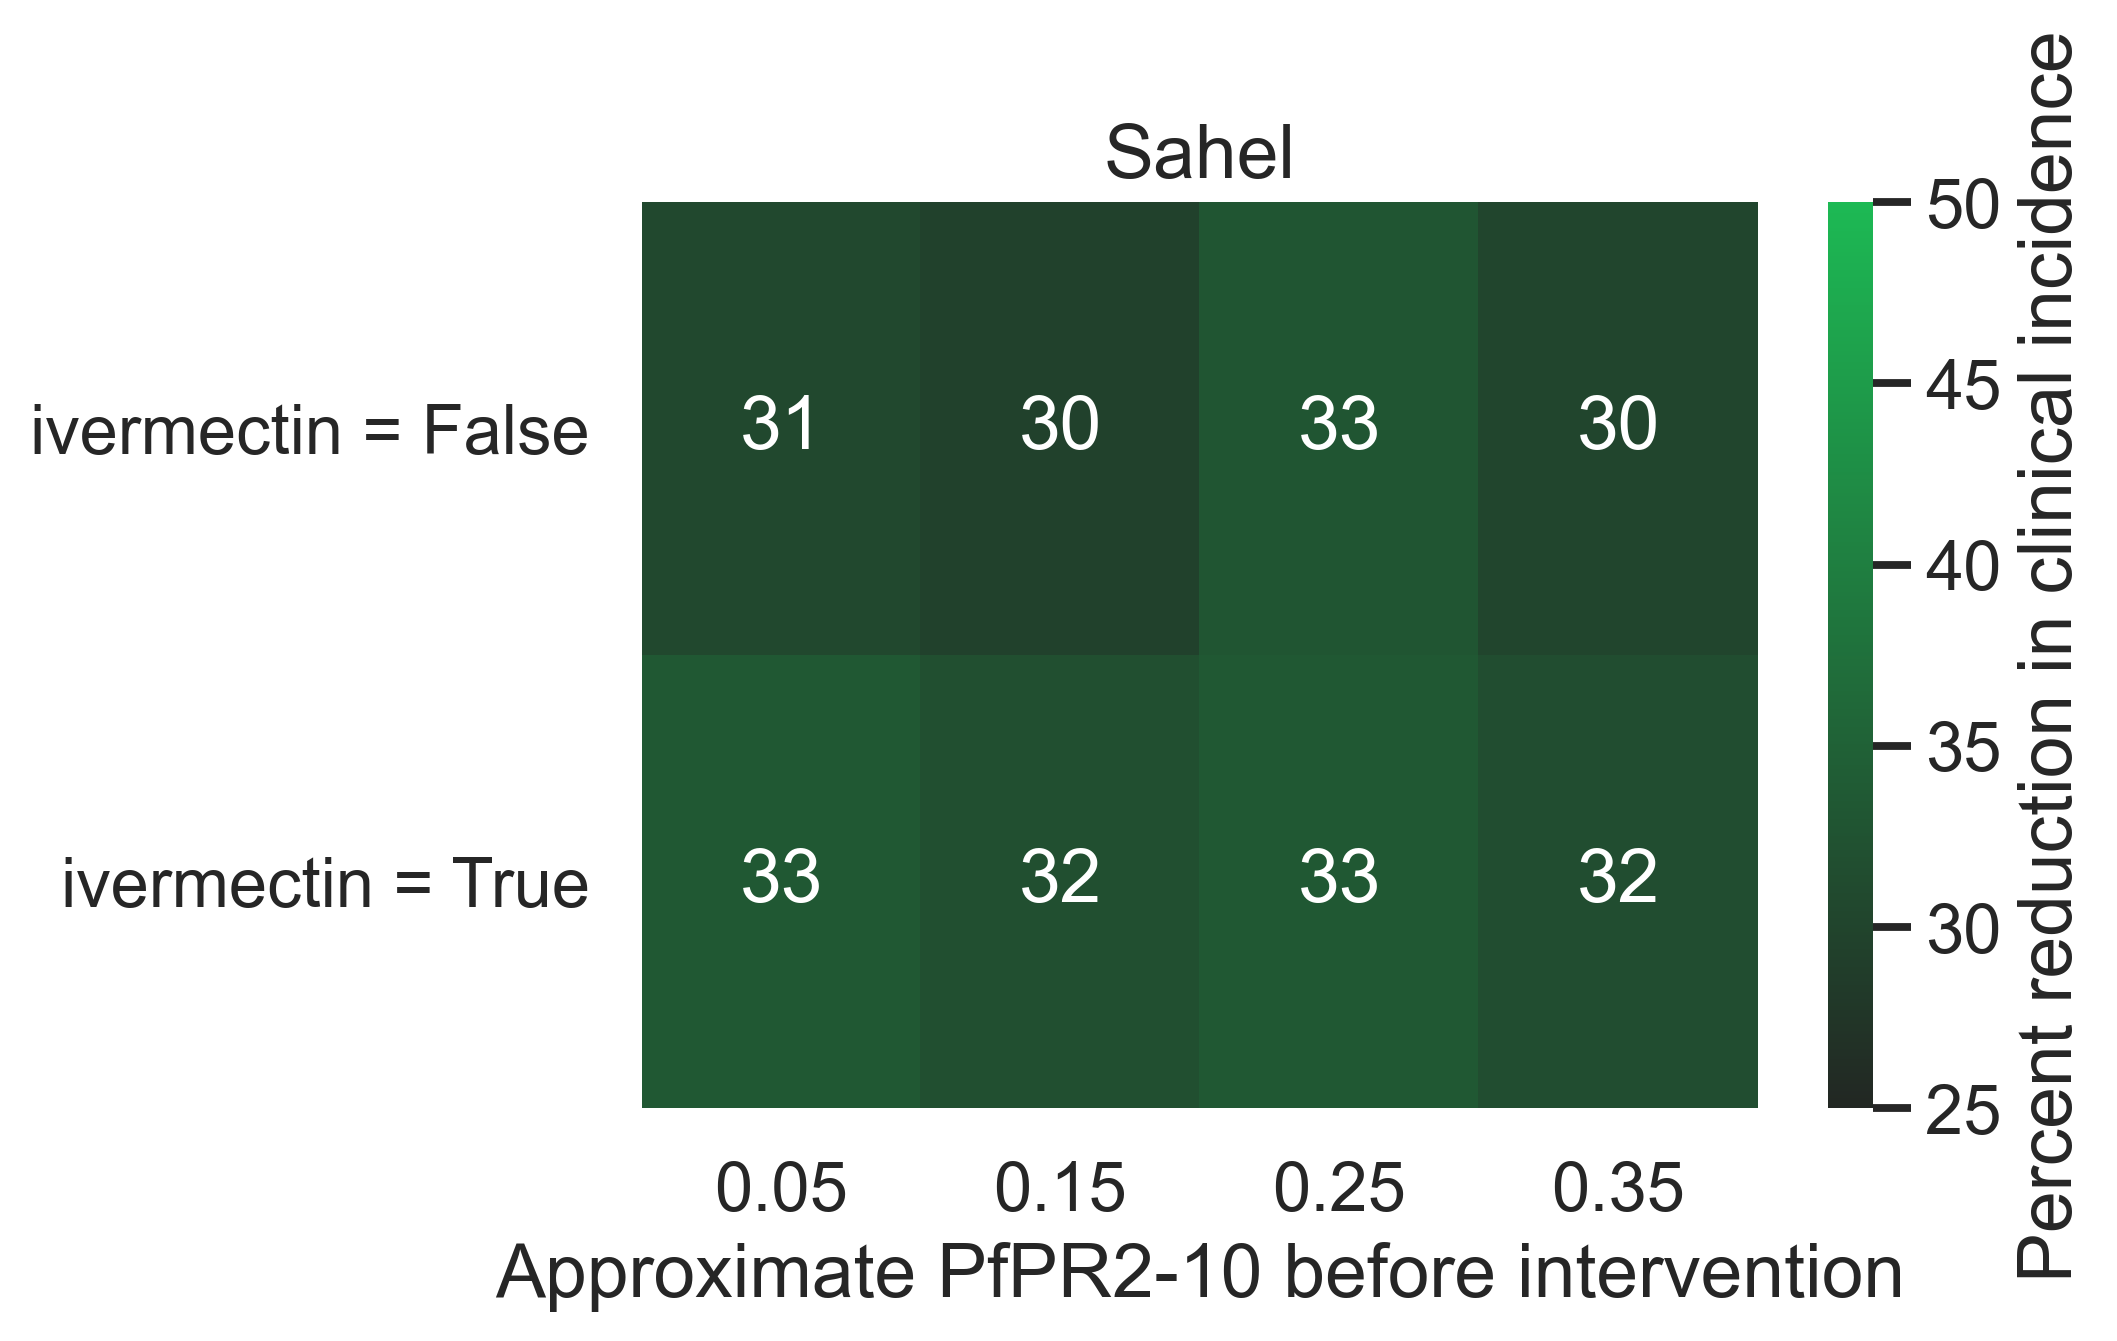

In [114]:
# NOW WITH MEDIAN
plt.figure(dpi=300)
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype, agg_type="median")
bar = foo[np.in1d(foo["scenario_number"], [13,44])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]
bar["intervention_name"] = "ivermectin = " + bar["ivermectin"].astype("string")

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], intervention_name_list[archetype])
bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=25, vmax=50, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)

# Now restrict to PfPR2-10 ~0.25

In [99]:
foo["burnin_habitat_scale"]

0      7.85
1      8.50
2      9.00
3      9.50
4      7.85
       ... 
179    9.50
180    7.85
181    8.50
182    9.00
183    9.50
Name: burnin_habitat_scale, Length: 184, dtype: float64

# Key results table

In [168]:
archetype="Southern"
key_scenarios = {13: "IPTsc",
                 31: "Increase ITN coverage",
                 32: "Target under-5s",
                30: "Baseline"}
                 
                 

foo = get_agg_df_w_baseline(archetype)


foo = foo[np.logical_and(foo["burnin_approx_pfpr2_10"]==0.25, 
                         np.in1d(foo["scenario_number"], list(key_scenarios.keys())))].reset_index(drop=True)
marita_df = pd.read_csv("marita_results_2021-04-13.csv")

costs_df = marita_df[np.logical_and(marita_df["archetype"]==archetype,
                                    marita_df["burnin_approx_pfpr2_10"]==0.25)].reset_index(drop=True)

foo = pd.merge(foo, costs_df[["scenario_number", "cost"]], how="left", on="scenario_number")
foo.dropna(inplace=True)

In [177]:
foo["direct_benefit"] = (foo["clinical_incidence6_15_BASELINE"]-foo["clinical_incidence6_15"])/foo["clinical_incidence6_15_BASELINE"]

cases_u5 = foo["clinical_incidence0_5"]*foo["pop0_5"]
cases_adult = foo["clinical_incidence16_500"]*foo["pop16_500"]
total_non_sac_cases = cases_u5 + cases_adult

cases_u5_BASELINE = foo["clinical_incidence0_5_BASELINE"]*foo["pop0_5_BASELINE"]
cases_adult_BASELINE = foo["clinical_incidence16_500_BASELINE"]*foo["pop16_500_BASELINE"]
total_non_sac_cases_BASELINE = cases_u5_BASELINE + cases_adult_BASELINE

foo["community_benefit_u5"] = (cases_u5_BASELINE-cases_u5)/cases_u5_BASELINE
foo["community_benefit_adult"] = (cases_adult_BASELINE-cases_adult)/cases_adult_BASELINE
foo["community_benefit_non_SAC"] = (total_non_sac_cases_BASELINE-total_non_sac_cases)/total_non_sac_cases_BASELINE
foo["community_benefit_severe"] = (foo["severe_incidence_all_BASELINE"]-foo["severe_incidence_all"])/foo["severe_incidence_all_BASELINE"]


In [178]:
key_results = foo[["scenario_number", "direct_benefit", "community_benefit_u5", "community_benefit_adult","community_benefit_non_SAC", "community_benefit_severe", "cost"]]
key_results["scenario_name"] = key_results["scenario_number"].map(key_scenarios)

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
key_results

scenario_number  direct_benefit  community_benefit_u5  \
0               13        0.444512              0.155871   
1               30        0.000000              0.000000   
2               31        0.041282              0.047276   
3               32        0.036279              0.198849   

   community_benefit_adult  community_benefit_non_SAC  \
0                 0.151949                   0.154749   
1                 0.000000                   0.000000   
2                 0.043078                   0.046075   
3                 0.021745                   0.148165   

   community_benefit_severe          cost          scenario_name  
0                  0.378068  44451.603389                  IPTsc  
1                  0.000000  51260.158748               Baseline  
2                  0.110814  46867.133113  Increase ITN coverage  
3                  0.461007  49864.239218        Target under-5s

<AxesSubplot:>

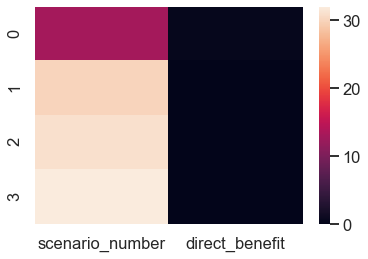

In [185]:
a = key_results[["scenario_number", "direct_benefit"]]
# a.pivot("scenario_name", "direct_benefit")
sns.heatmap(a)

In [173]:
key_results.pivot("scenario_name", "burnin_approx_pfpr2_10", "Severe Incidence Reduction")

0    0.113894
1    0.158426
2    0.145163
3    0.150954
Name: clinical_incidence16_500, dtype: float64

## Heatmaps by age

In [6]:
archetype="Southern"
key_scenarios = {13: "IPTsc",
                 31: "Increase ITN coverage",
                30: "Baseline"}
                 
foo = get_agg_df_w_baseline(archetype)

foo = foo[np.logical_and(foo["burnin_approx_pfpr2_10"]==0.25, 
                         np.in1d(foo["scenario_number"], list(key_scenarios.keys())))].reset_index(drop=True)
foo["scenario_name"] = foo["scenario_number"].map(key_scenarios)
foo[]

In [7]:
bar = foo.pivot("scenario_name", "")

burnin_approx_pfpr2_10  scenario_number   pfpr0_5  pfpr2_10  pfpr6_15  \
0                    0.25               13  0.182511  0.234888  0.257967   
1                    0.25               30  0.221492  0.318302  0.377723   
2                    0.25               31  0.210109  0.305353  0.363937   

   pfpr16_500  pfpr_all  clinical_incidence0_5  clinical_incidence2_10  \
0    0.171069  0.193853               2.486758                2.054059   
1    0.199189  0.245805               2.940999                2.847391   
2    0.191584  0.236164               2.813174                2.719759   

   clinical_incidence6_15  ...  within_school_coverage_BASELINE  \
0                1.245696  ...                              0.9   
1                2.242526  ...                              0.9   
2                2.149950  ...                              0.9   

   Received_Treatment_BASELINE  Received_Test_BASELINE  \
0                       6169.9                     0.0   
1                       6169.9                     0.0   
2                       6169.9                     0.0   

   Received_Campaign_Drugs_BASELINE  Received_RCD_Drugs_BASELINE  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   

   Received_SMC_BASELINE  Received_Ivermectin_BASELINE  \
0                    0.0                           0.0   
1                    0.0                           0.0   
2                    0.0                           0.0   

   Received_Primaquine_BASELINE  drug_length_BASELINE          scenario_name  
0                           0.0                  -1.0                  IPTsc  
1                           0.0                  -1.0               Baseline  
2                           0.0                  -1.0  Increase ITN coverage  

[3 rows x 94 columns]

Text(0.5, 4.296875, '')

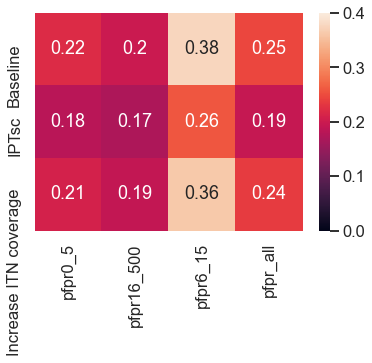

In [14]:
a = pd.melt(foo, id_vars=['scenario_name'], value_vars=['pfpr0_5', 'pfpr6_15','pfpr16_500', 'pfpr_all'])
b = a.pivot('scenario_name', 'variable', 'value')
sns.heatmap(b, vmin=0,vmax=0.4, annot=True)
plt.ylabel(None)
plt.xlabel(None)

In [17]:
marita_df = pd.read_csv("marita_results_2021-04-15.csv")

In [19]:
marita_df.columns

Index(['Unnamed: 0', 'scenario_number', 'archetype', 'drug_type', 'Scenario',
       'cost.CHW', 'cost.RDT', 'cost.drug', 'cost.ACT', 'cost.smc',
       'cost.facility', 'cost.severe', 'cost.bednet', 'cost.iver', 'cost.prim',
       'cost.CHW.d', 'cost.RDT.d', 'cost.drug.d', 'cost.facility.d',
       'cost.severe.d', 'cost.d', 'cost', 'cases'],
      dtype='object')

In [20]:
marita_df.head

<bound method NDFrame.head of      Unnamed: 0  scenario_number archetype drug_type          Scenario  \
0             1               25  Southern        DP  Southern_25_0.05   
1             2               34  Southern        DP  Southern_34_0.05   
2             3               36  Southern        DP  Southern_36_0.05   
3             4               26  Southern        DP  Southern_26_0.05   
4             5               33  Southern        DP  Southern_33_0.05   
..          ...              ...       ...       ...               ...   
331         332               28  Southern        DP  Southern_28_0.05   
332         333               28     Sahel        DP     Sahel_28_0.15   
333         334               28  Southern        DP  Southern_28_0.35   
334         335               28  Southern        DP  Southern_28_0.15   
335         336               28  Southern        DP  Southern_28_0.25   

         cost.CHW     cost.RDT      cost.drug    cost.ACT     cost.smc  ...  \
0 

In [23]:
marita_df["Scenario"].map(lambda x: "0.25" in x) 

0      False
1      False
2      False
3      False
4      False
       ...  
331    False
332    False
333    False
334    False
335     True
Name: Scenario, Length: 336, dtype: bool

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Southern')

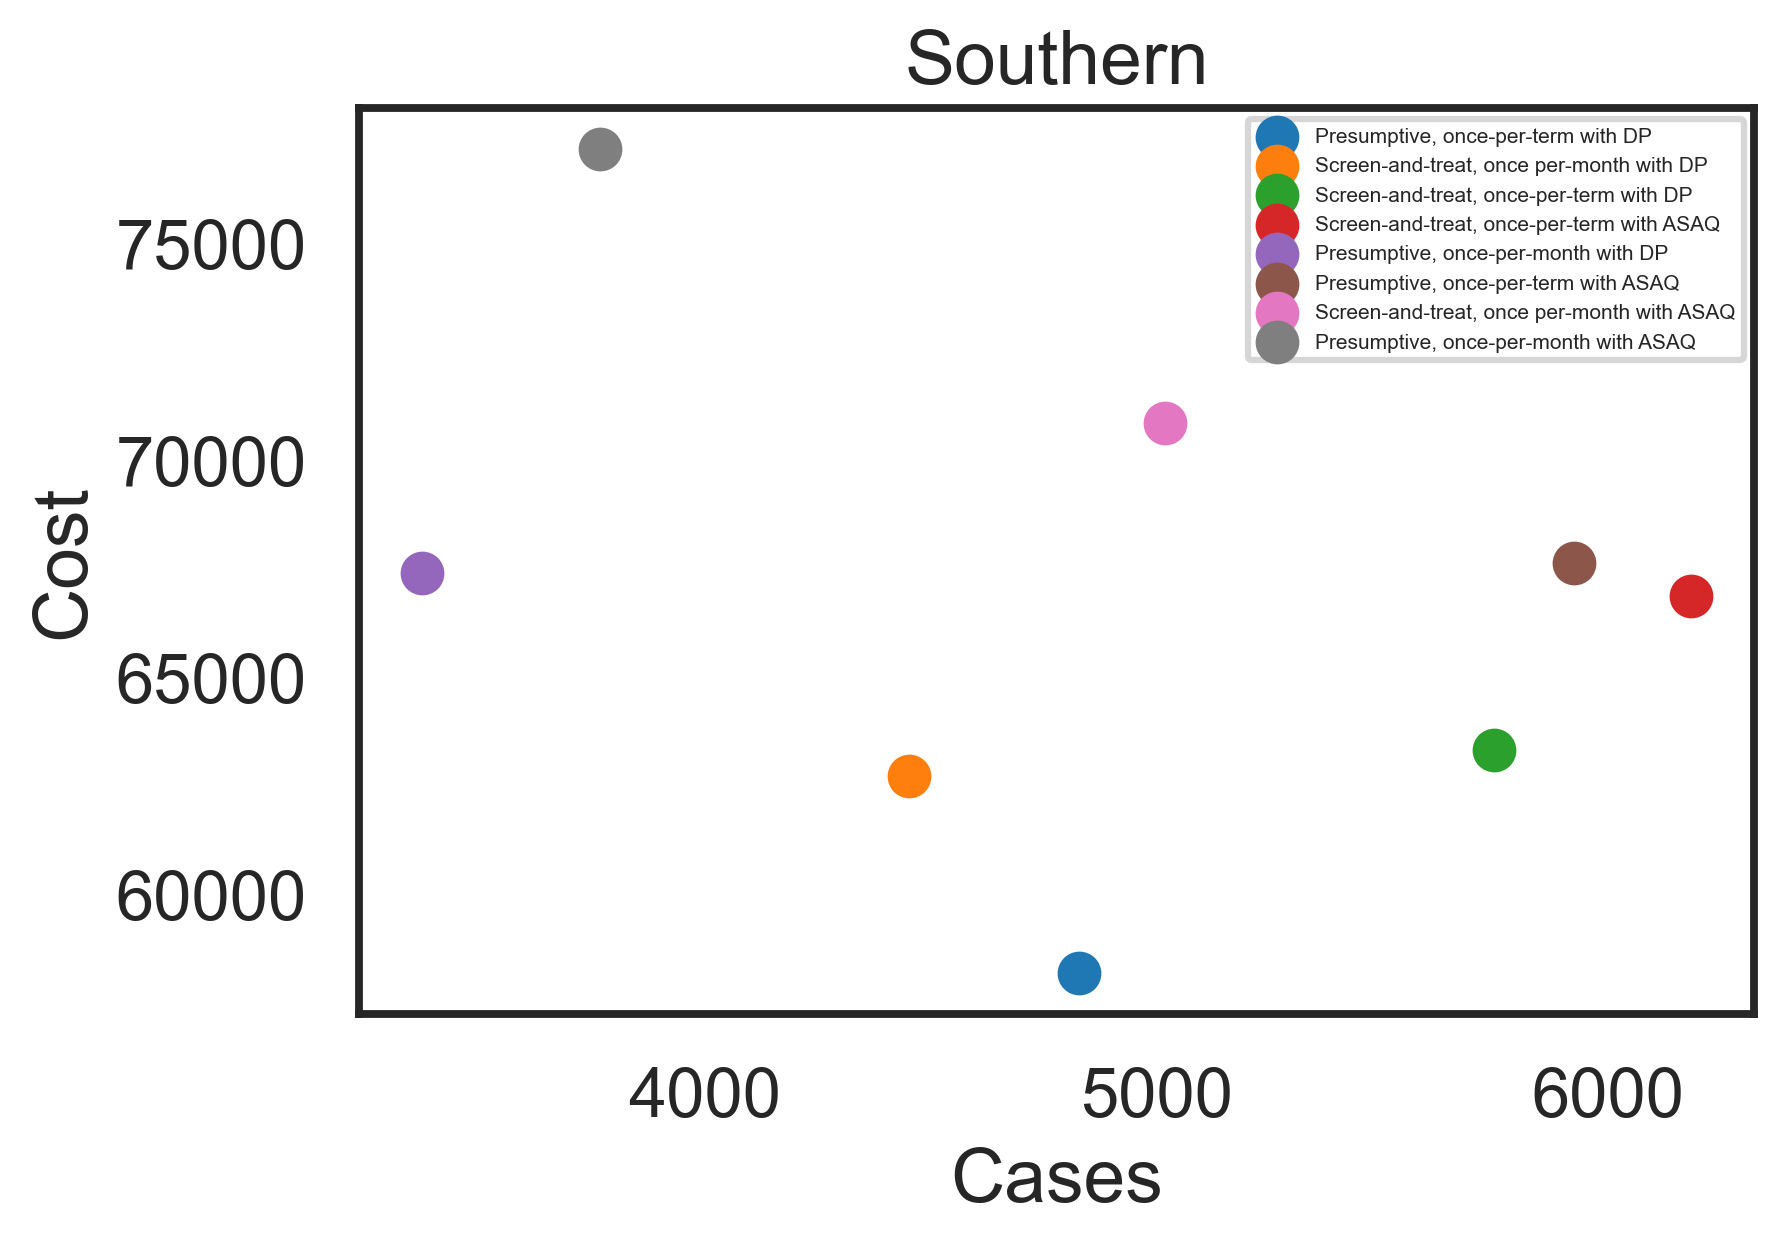

In [41]:
sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Southern",
                                       np.in1d(marita_df["scenario_number"], [1,4,7,10,13,16,19,22]),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]
scenario_names = {
    1: "Presumptive, once-per-term with ASAQ",
    4: "Presumptive, once-per-month with ASAQ",
    7: "Screen-and-treat, once-per-term with ASAQ",
    10: "Screen-and-treat, once per-month with ASAQ",
    13: "Presumptive, once-per-term with DP",
    16: "Presumptive, once-per-month with DP",
    19: "Screen-and-treat, once-per-term with DP",
    22: "Screen-and-treat, once per-month with DP"
}

sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    plt.scatter(row["cases"], row["cost"], label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=5)
plt.ylabel("Cost")
plt.xlabel("Cases")
plt.title("Southern")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Sahel')

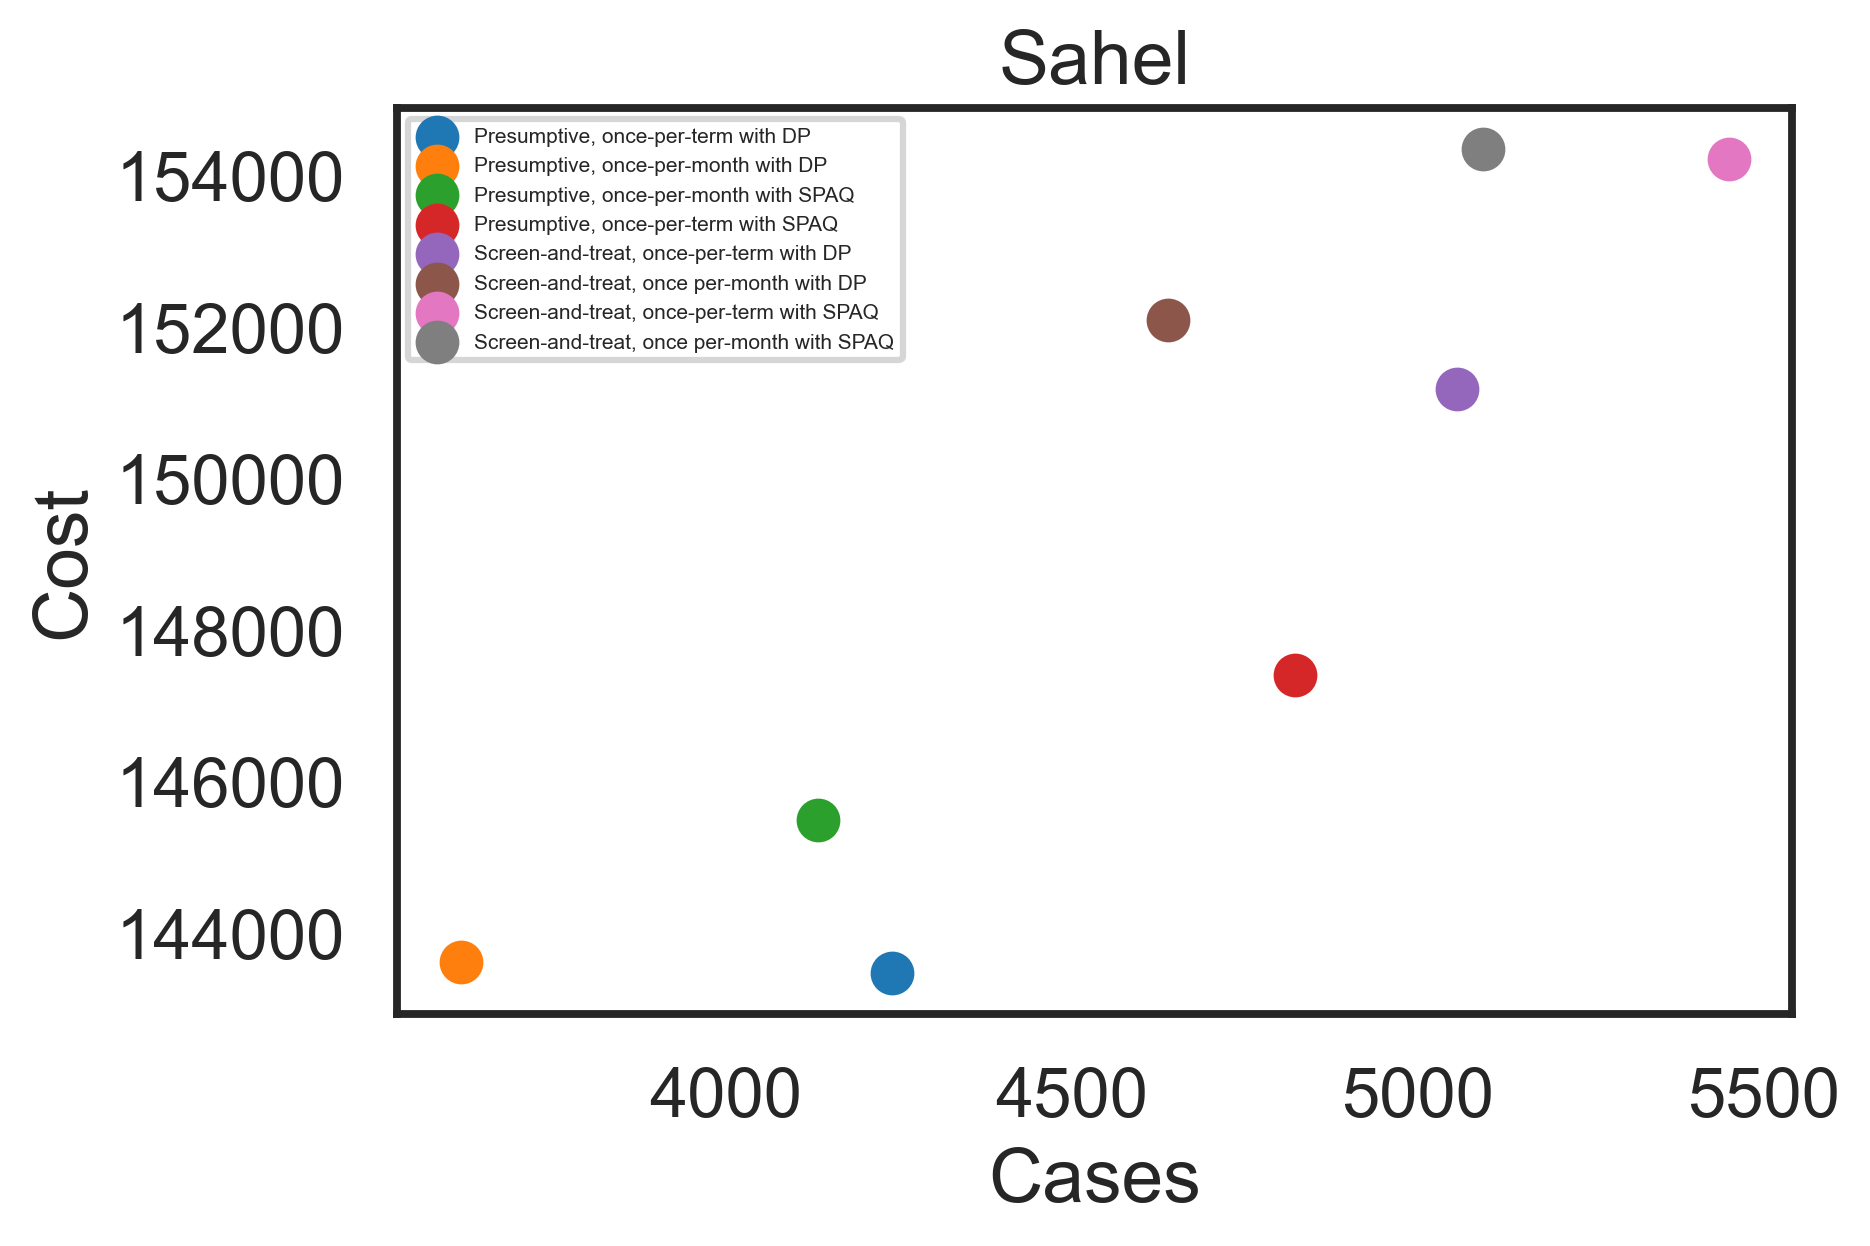

In [43]:
sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Sahel",
                                       np.in1d(marita_df["scenario_number"], [1,4,7,10,13,16,19,22]),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]
scenario_names = {
    1: "Presumptive, once-per-term with SPAQ",
    4: "Presumptive, once-per-month with SPAQ",
    7: "Screen-and-treat, once-per-term with SPAQ",
    10: "Screen-and-treat, once per-month with SPAQ",
    13: "Presumptive, once-per-term with DP",
    16: "Presumptive, once-per-month with DP",
    19: "Screen-and-treat, once-per-term with DP",
    22: "Screen-and-treat, once per-month with DP"
}

sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    plt.scatter(row["cases"], row["cost"], label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=5)
plt.ylabel("Cost")
plt.xlabel("Cases")
plt.title("Sahel")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Southern')

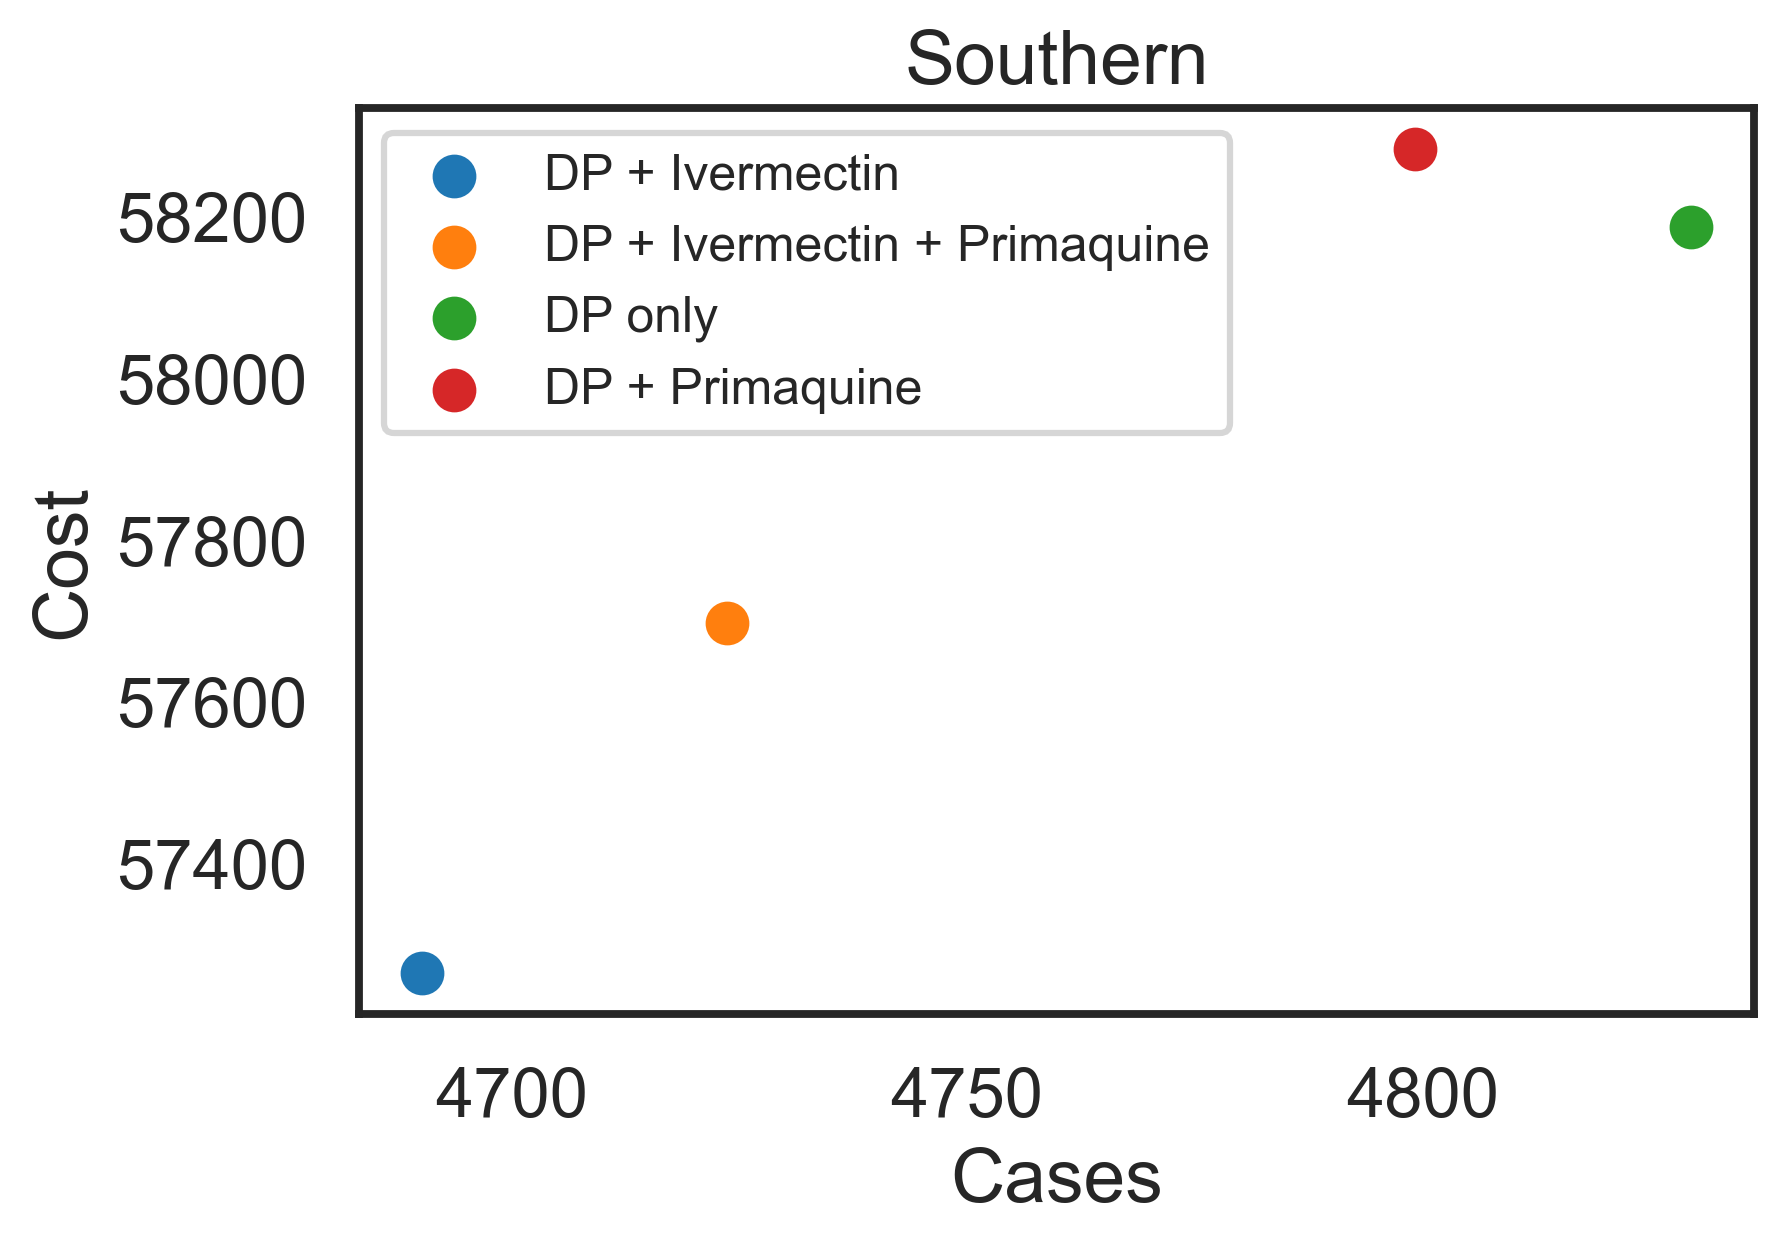

In [50]:
sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Southern",
                                       np.in1d(marita_df["scenario_number"], [13, 34, 35, 36]),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]
scenario_names = {
    13: "DP only",
    34: "DP + Ivermectin",
    35: "DP + Primaquine",
    36: "DP + Ivermectin + Primaquine"
}

sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    plt.scatter(row["cases"], row["cost"], label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost")
plt.xlabel("Cases")
plt.title("Southern")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Southern')

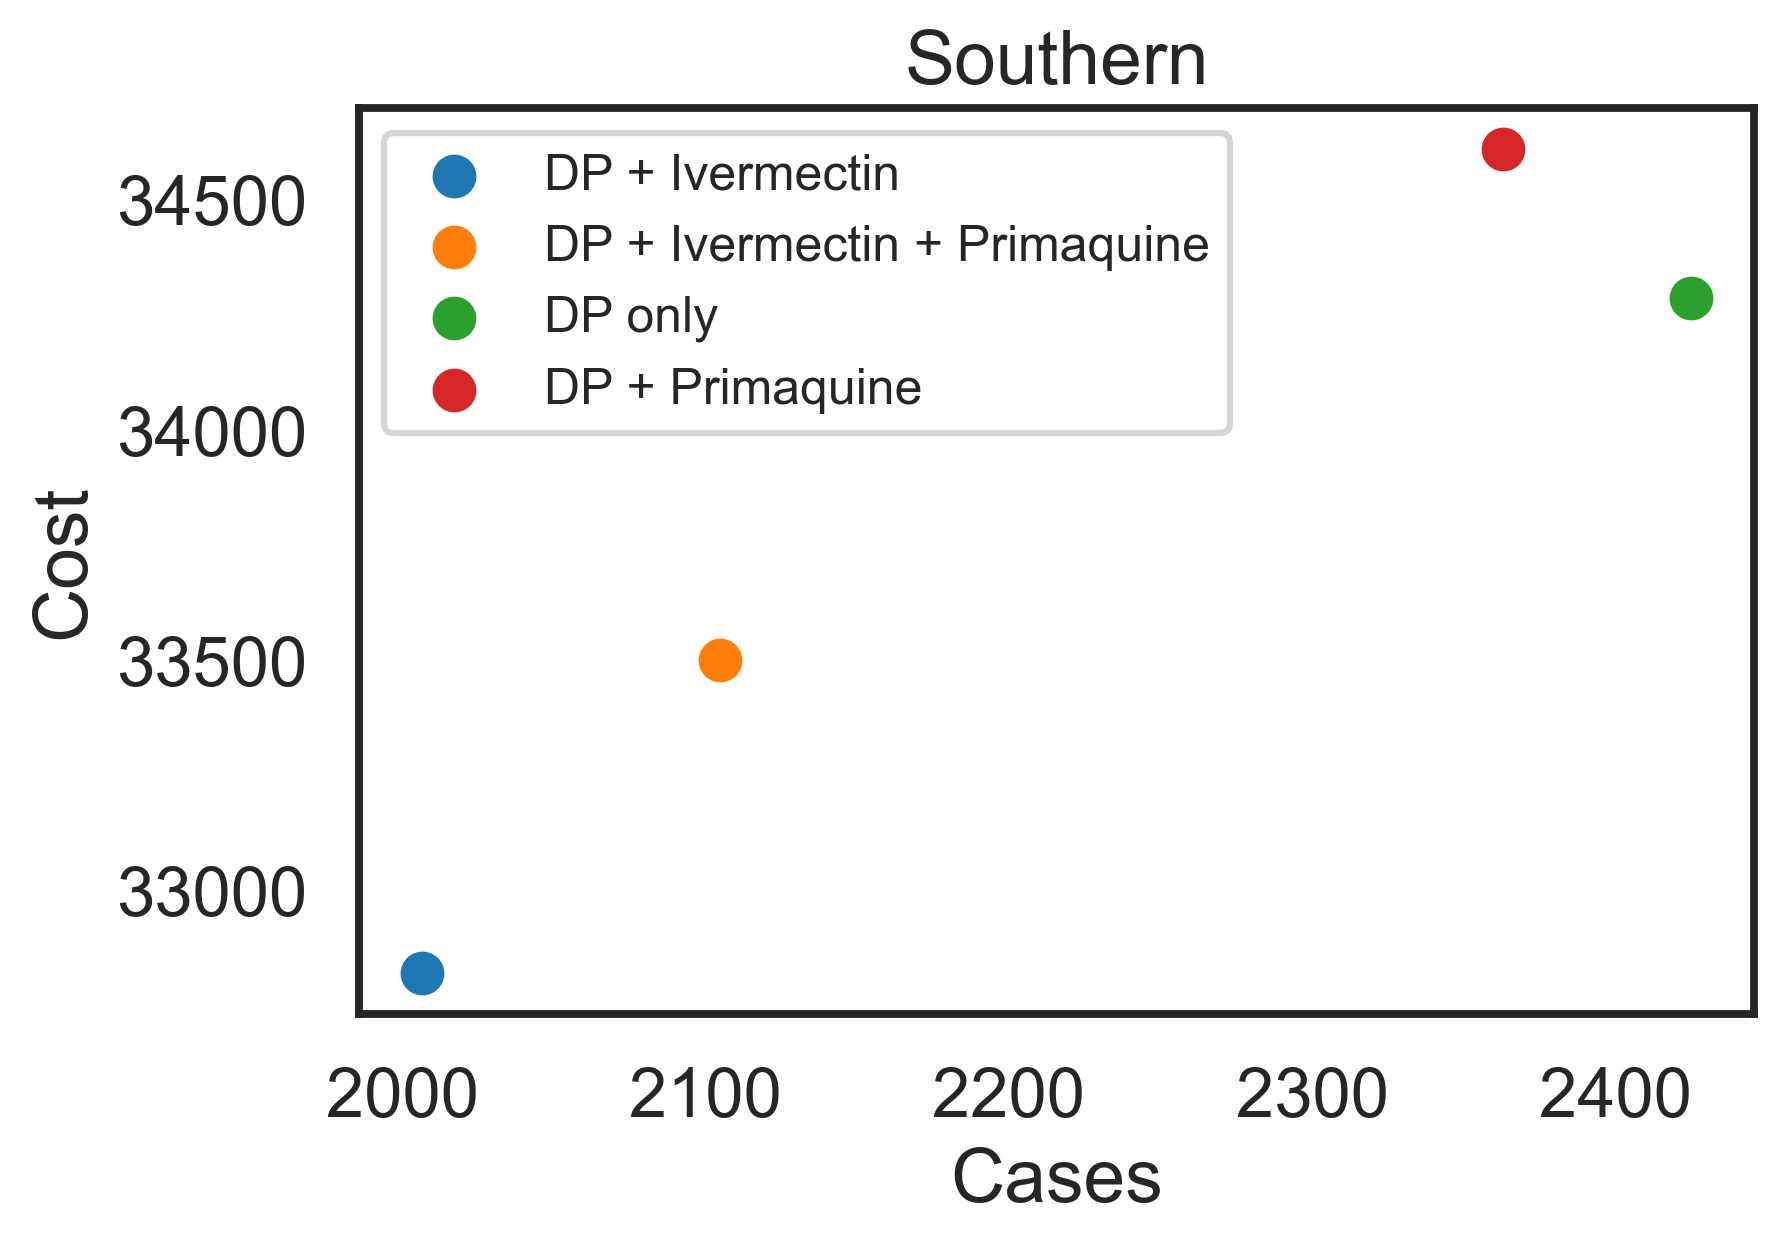

In [56]:
sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Southern",
                                       np.in1d(marita_df["scenario_number"], [13, 34, 35, 36]),
                                      marita_df["Scenario"].map(lambda x: "0.05" in x)])]
scenario_names = {
    13: "DP only",
    34: "DP + Ivermectin",
    35: "DP + Primaquine",
    36: "DP + Ivermectin + Primaquine"
}

sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    plt.scatter(row["cases"], row["cost"], label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost")
plt.xlabel("Cases")
plt.title("Southern")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Southern')

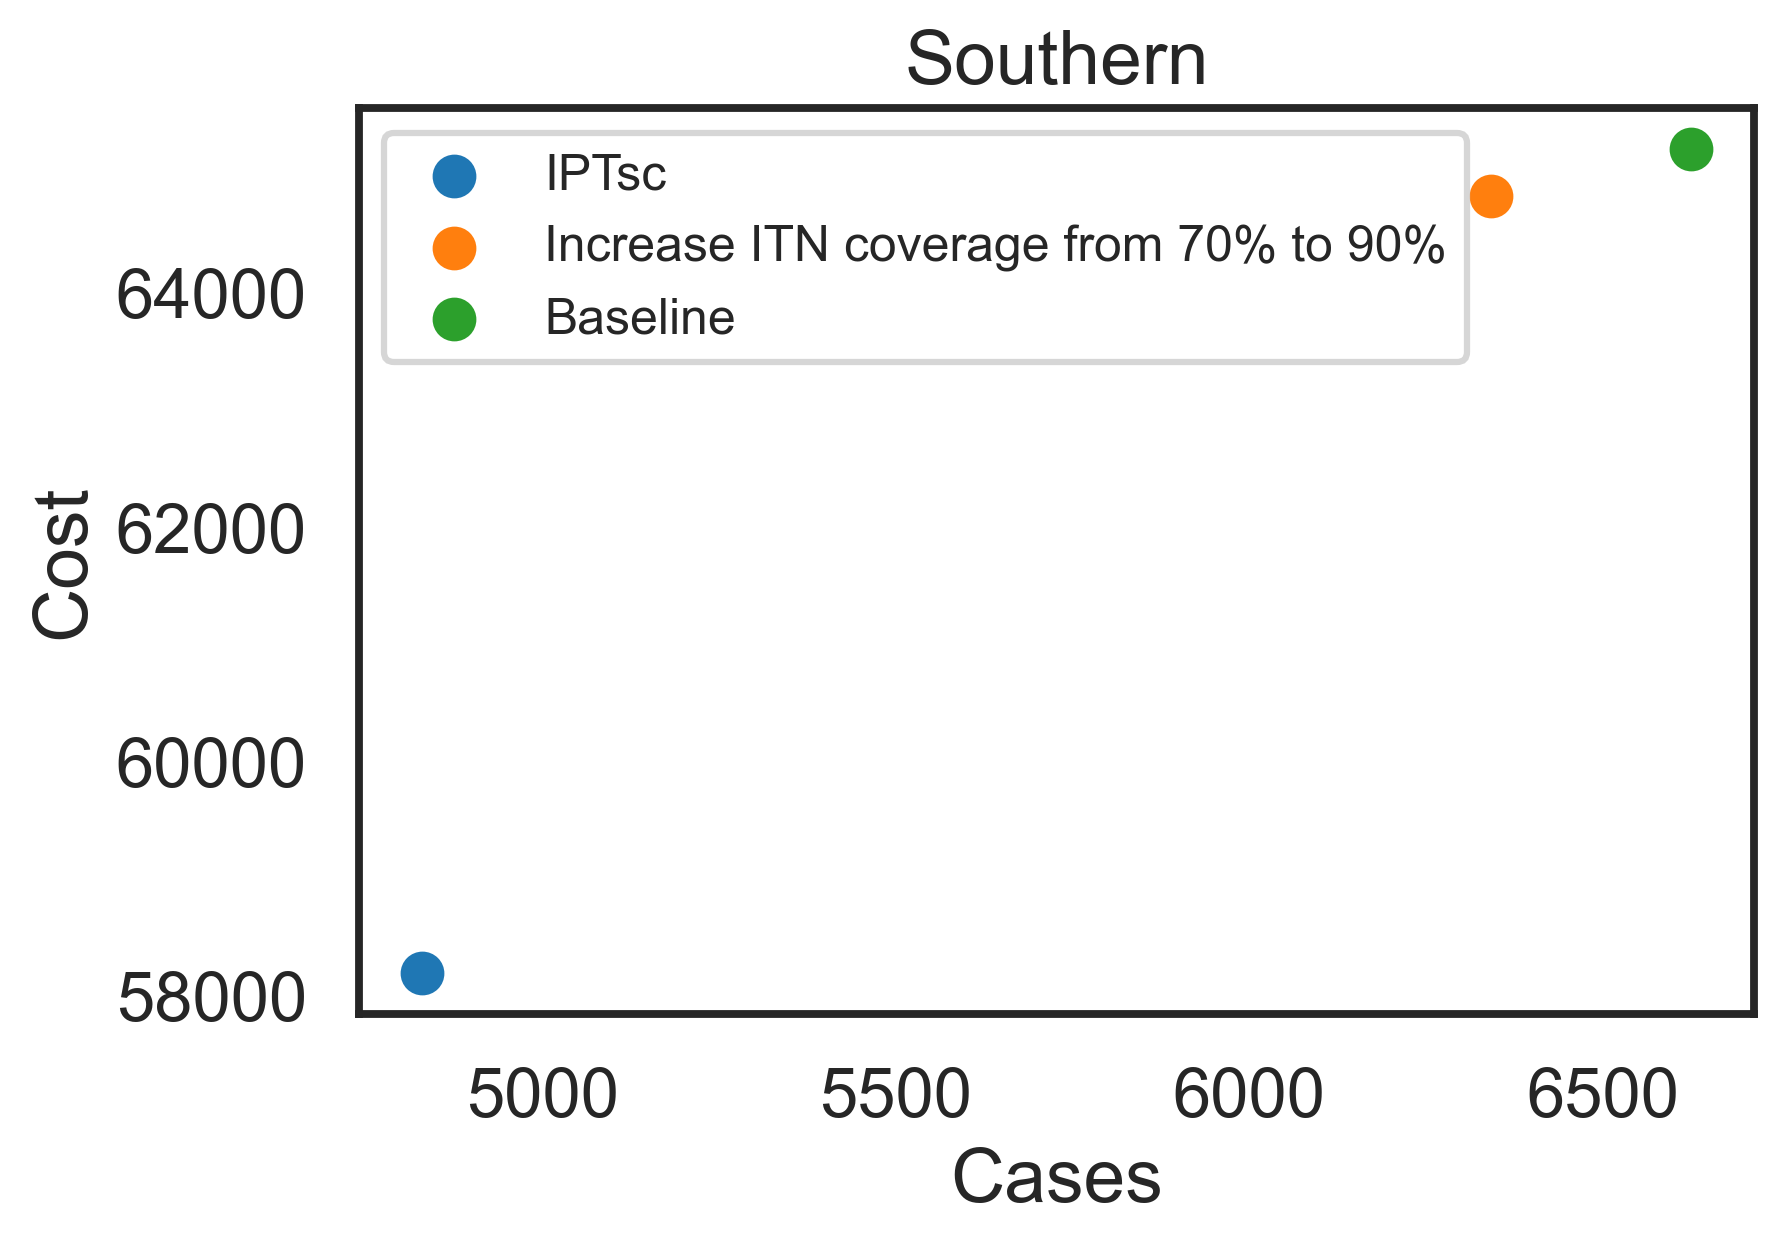

In [160]:
sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Southern",
                                       np.in1d(marita_df["scenario_number"], [13, 30, 31]),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]
scenario_names = {
    13: "IPTsc",
    30: "Baseline",
    31: "Increase ITN coverage from 70% to 90%"
}

sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    plt.scatter(row["cases"], row["cost"], label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost")
plt.xlabel("Cases")
plt.title("Southern")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Sahel')

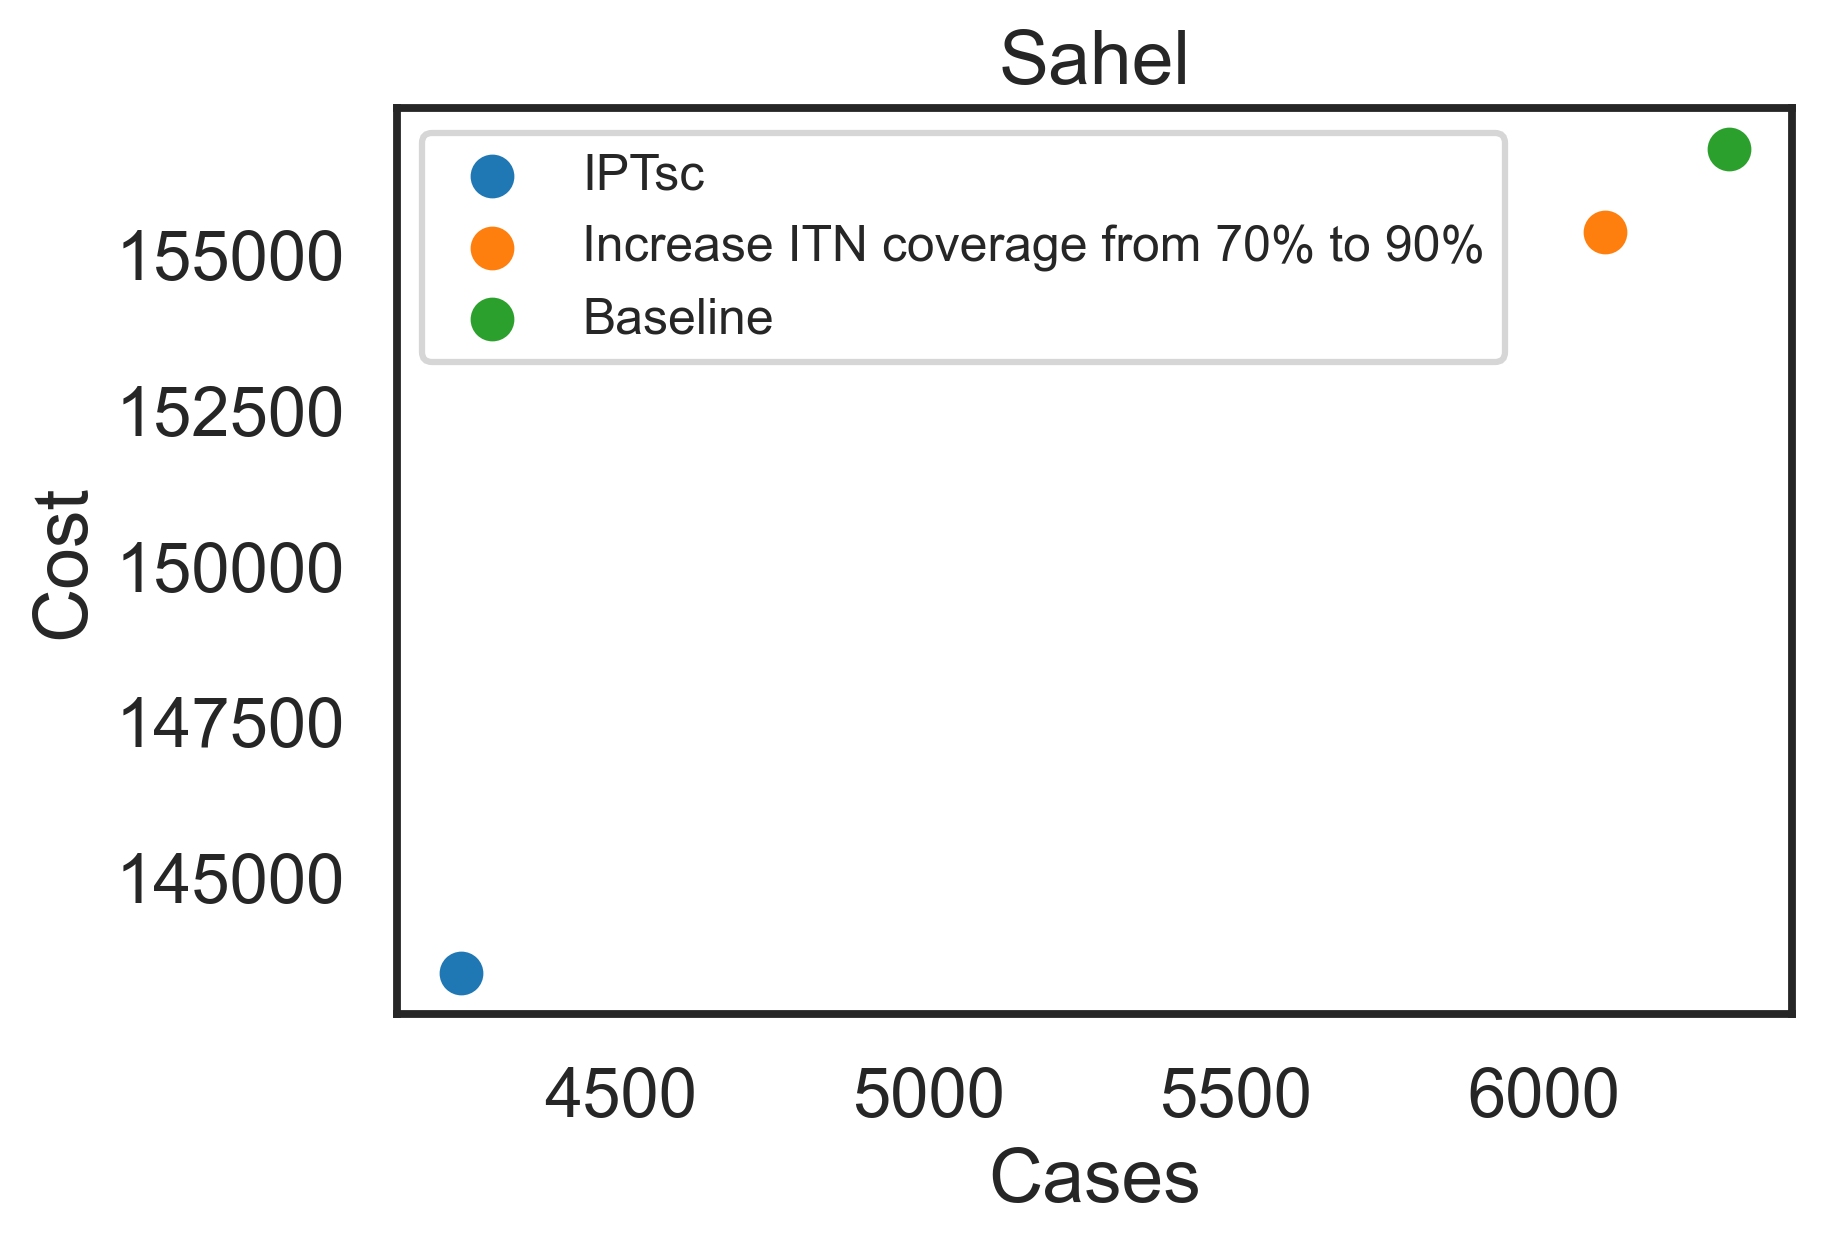

In [162]:
sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Sahel",
                                       np.in1d(marita_df["scenario_number"], [13, 30, 31]),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]
scenario_names = {
    13: "IPTsc",
    30: "Baseline",
    31: "Increase ITN coverage from 70% to 90%"
}

sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    plt.scatter(row["cases"], row["cost"], label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost")
plt.xlabel("Cases")
plt.title("Sahel")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

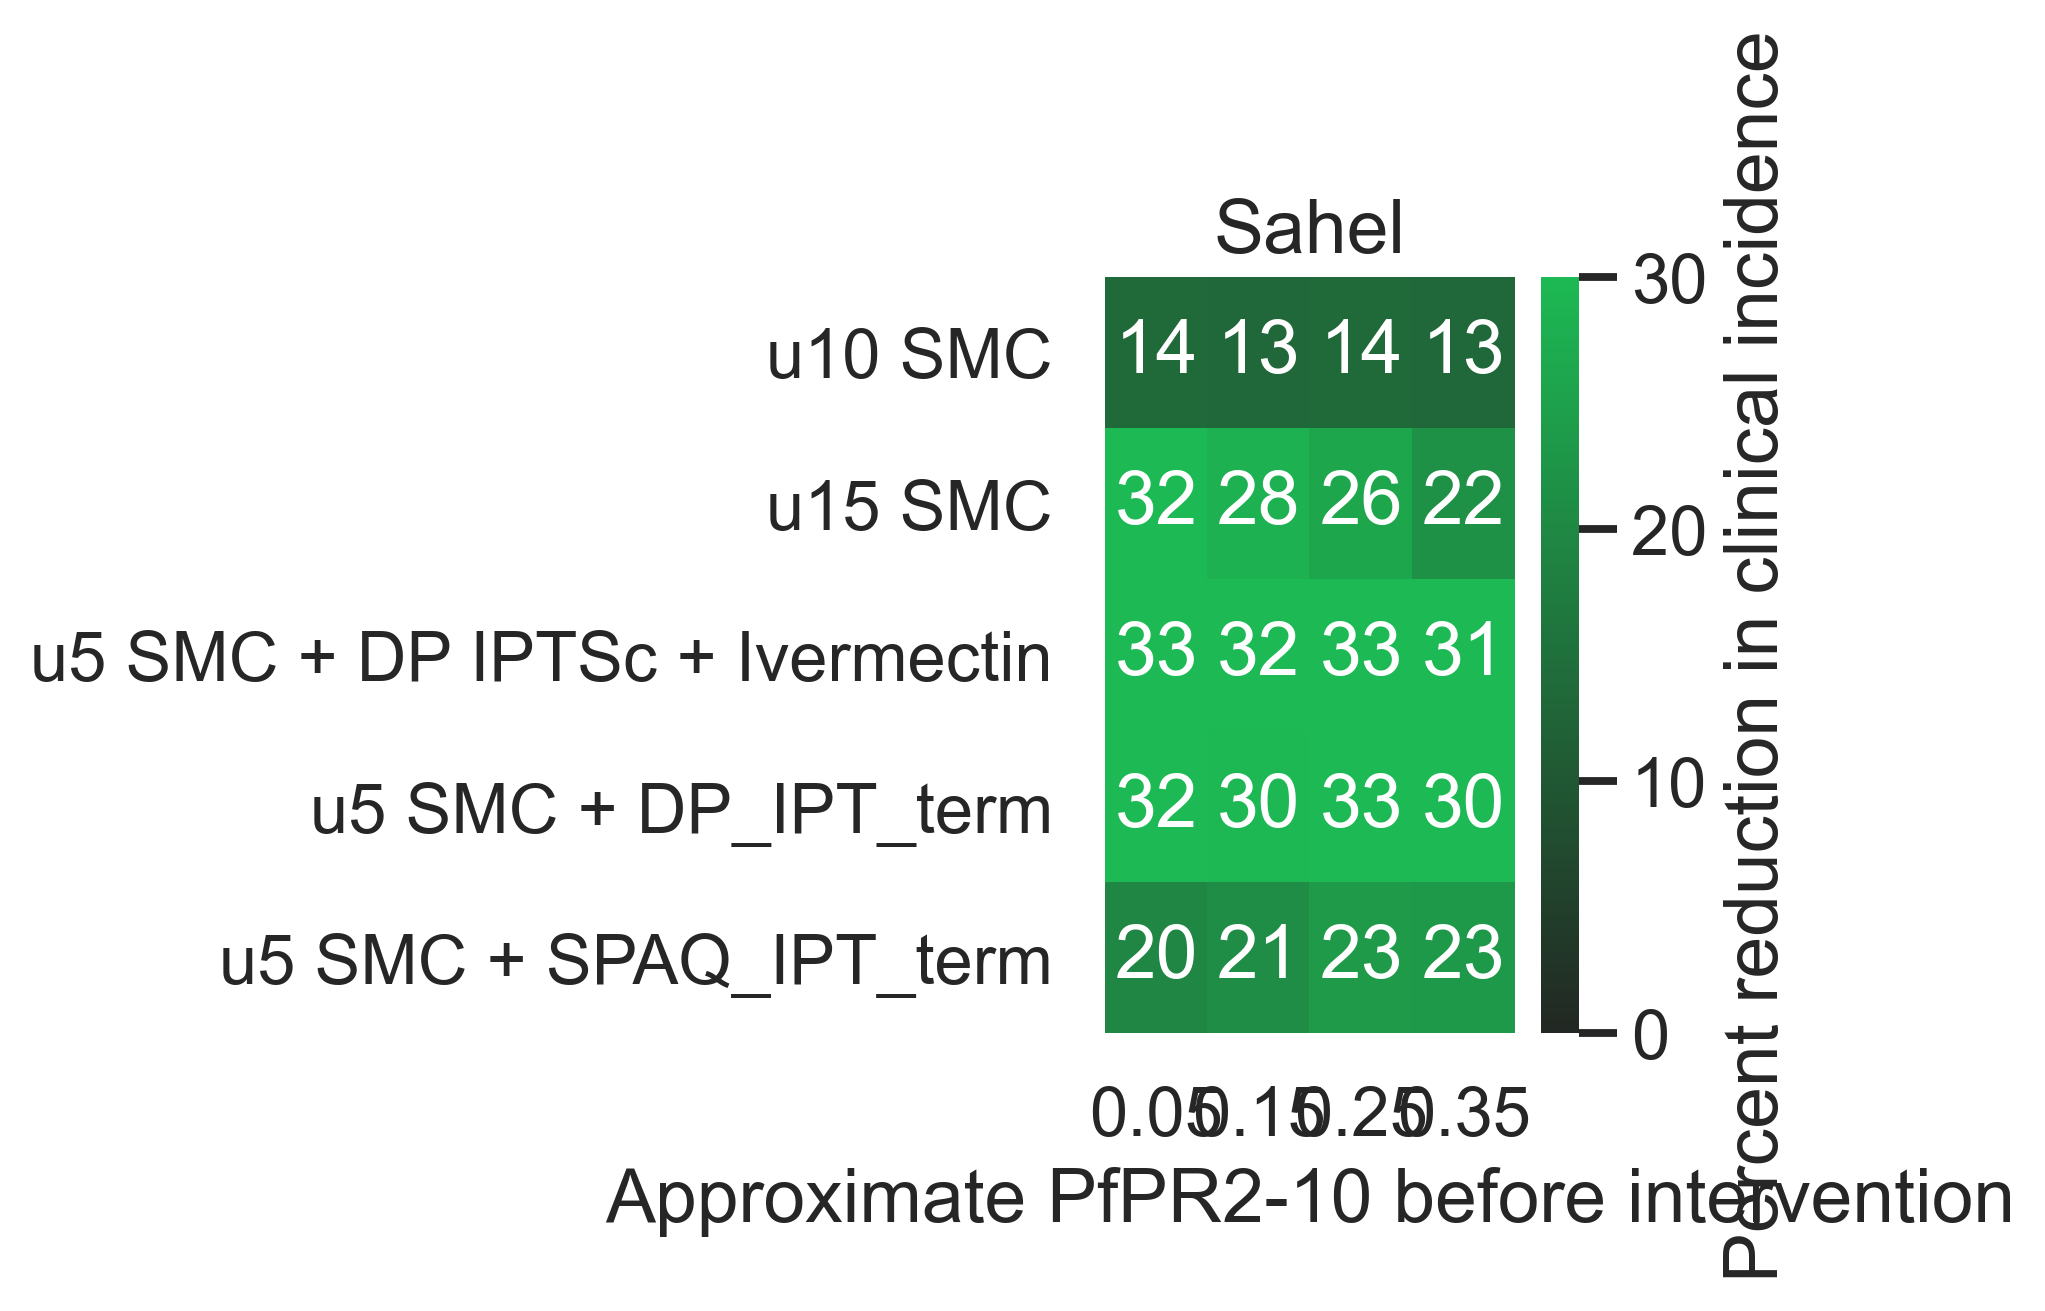

In [148]:
plt.figure(dpi=300)
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype)
# bar = foo[foo["out_of_school_rate"]==0.15]
bar = foo[np.in1d(foo["scenario_number"], [1, 13,35,36,44])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]

bar["intervention_name"] = "u5 SMC + " + bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]

bar.loc[bar["scenario_number"]==35, "intervention_name"] = "u10 SMC"
bar.loc[bar["scenario_number"]==36, "intervention_name"] = "u15 SMC"
bar.loc[bar["scenario_number"]==44, "intervention_name"] = "u5 SMC + DP IPTSc + Ivermectin"

# name_list = [
#     "SPAQ_IST_term",
#     "SPAQ_IST_month",
#     "SPAQ_IPT_term",
#     "DP_IST_term",
#     "DP_IST_month",
#     "SPAQ_IPT_month",
#     "DP_IPT_term",
#     "DP_IPT_month",
#     "DP_IPT_day"
# ]

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], name_list)
# bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=0, vmax=30, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)
plt.tight_layout()

# plt.savefig("figures/2021-04-13_dryrun/sahel_heatmap.pdf")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

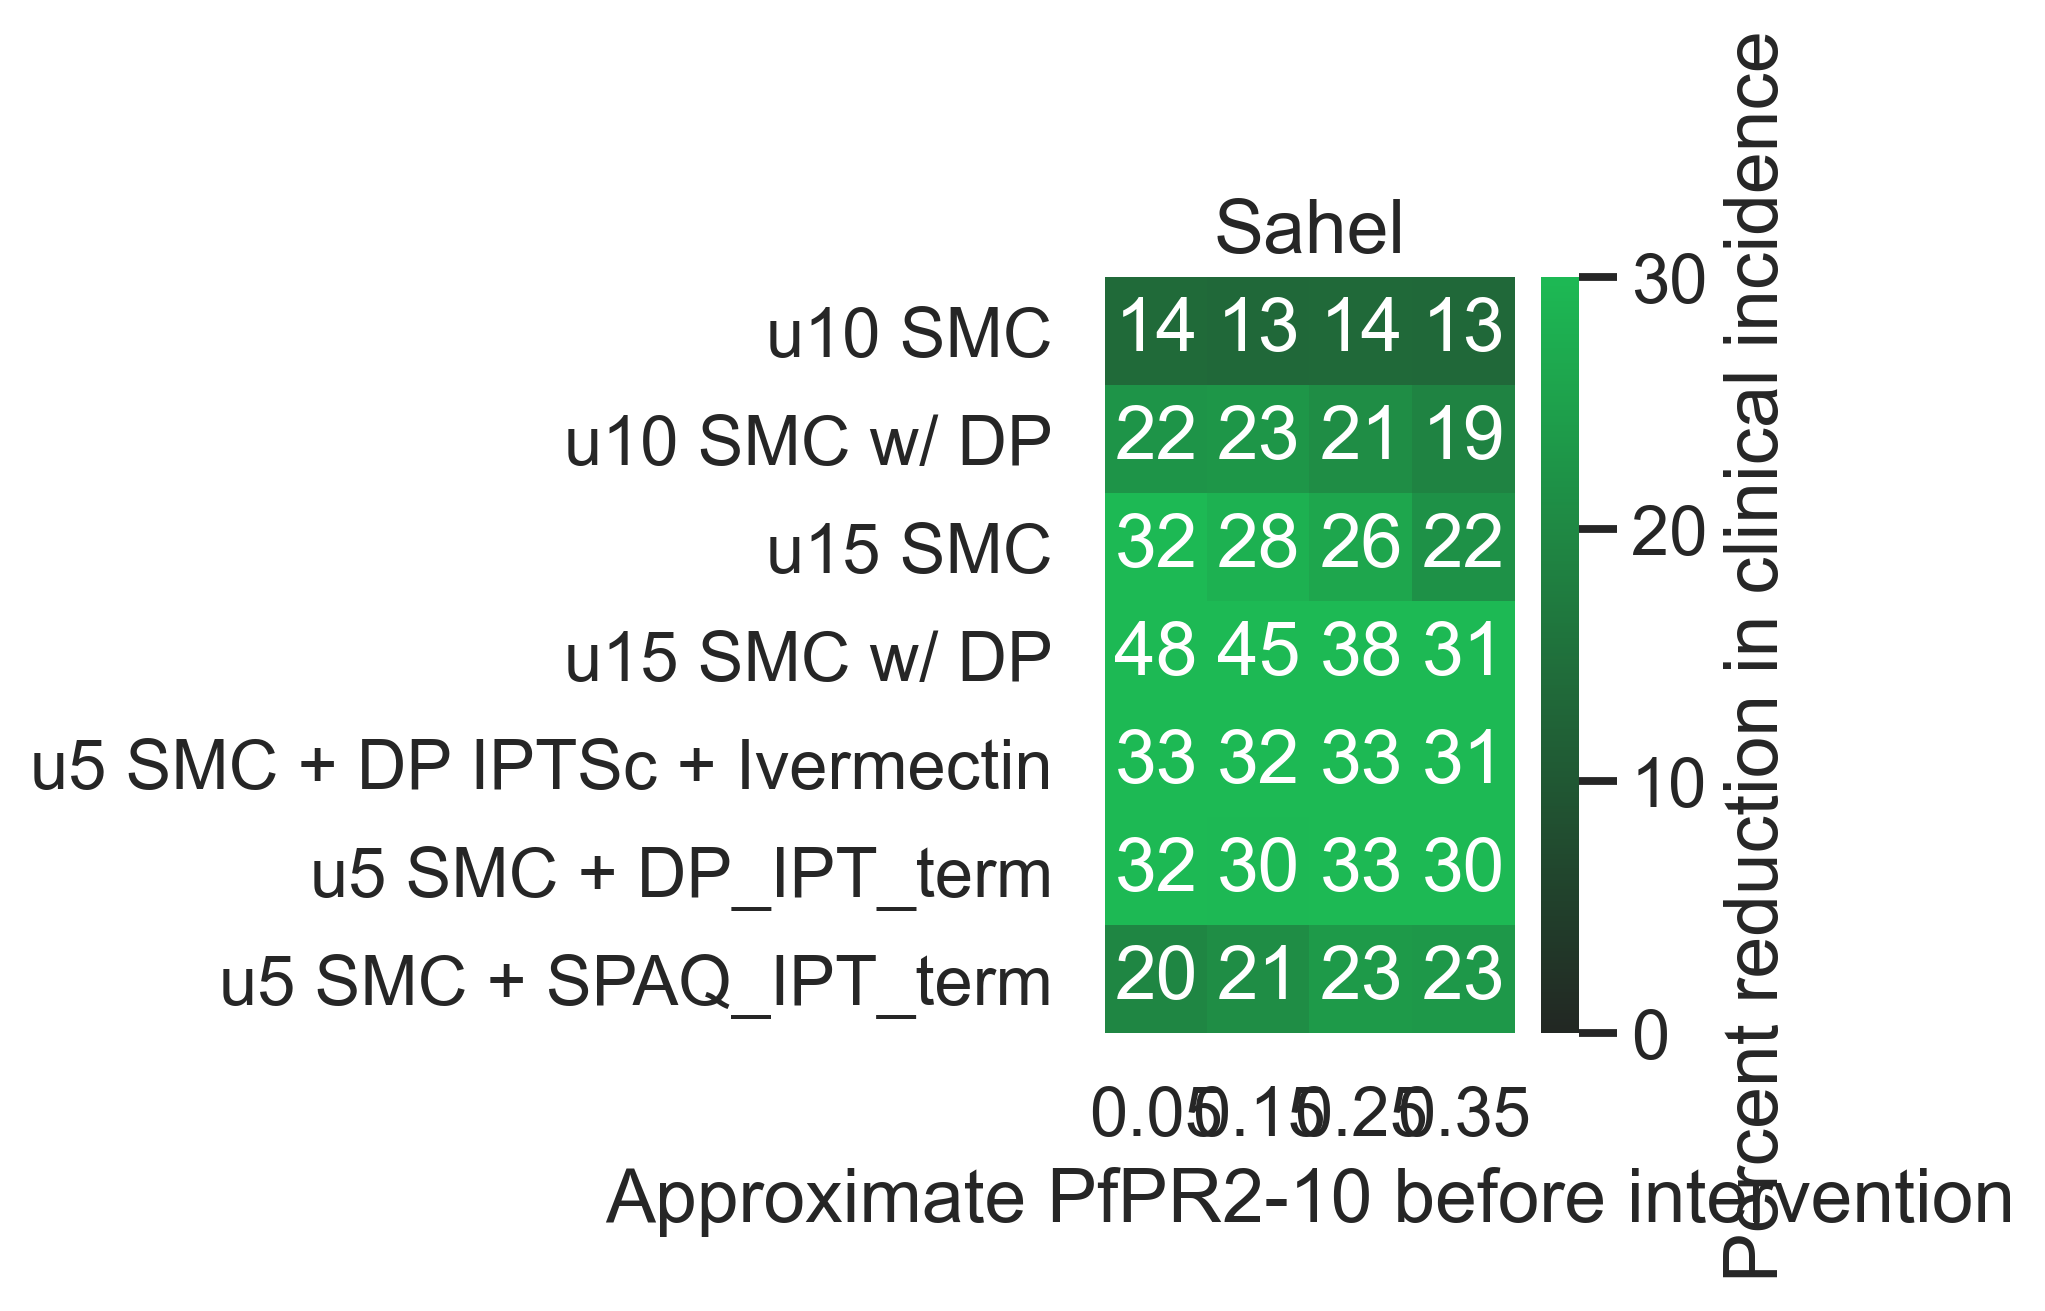

In [106]:
plt.figure(dpi=300)
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype)
# bar = foo[foo["out_of_school_rate"]==0.15]
bar = foo[np.in1d(foo["scenario_number"], [1, 13,35,36,44,46,47])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]

bar["intervention_name"] = "u5 SMC + " + bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]

bar.loc[bar["scenario_number"]==35, "intervention_name"] = "u10 SMC"
bar.loc[bar["scenario_number"]==36, "intervention_name"] = "u15 SMC"
bar.loc[bar["scenario_number"]==44, "intervention_name"] = "u5 SMC + DP IPTSc + Ivermectin"
bar.loc[bar["scenario_number"]==46, "intervention_name"] = "u10 SMC w/ DP"
bar.loc[bar["scenario_number"]==47, "intervention_name"] = "u15 SMC w/ DP"
# name_list = [
#     "SPAQ_IST_term",
#     "SPAQ_IST_month",
#     "SPAQ_IPT_term",
#     "DP_IST_term",
#     "DP_IST_month",
#     "SPAQ_IPT_month",
#     "DP_IPT_term",
#     "DP_IPT_month",
#     "DP_IPT_day"
# ]

# bar['intervention_name'] = pd.Categorical(bar['intervention_name'], name_list)
# bar.sort_values(by="intervention_name")

bar = bar.pivot("intervention_name", "burnin_approx_pfpr2_10", "Clinical Incidence Reduction")
sns.heatmap(bar, annot=True,cbar_kws={'label': 'Percent reduction in clinical incidence'}, 
            vmin=0, vmax=30, cmap=sns.dark_palette("#1DB954", reverse=False, as_cmap=True))
plt.ylabel(None)
plt.xlabel("Approximate PfPR2-10 before intervention")
plt.title(archetype)
plt.tight_layout()

# plt.savefig("figures/2021-04-13_dryrun/sahel_heatmap.pdf")

## Cost savings of IPTsc vs baseline

In [153]:
def compute_relative_cost_of_scenario(s, use_cost_low=True):
    marita_df = pd.read_csv("marita_results_2021-04-16.csv")
    
    for a, sdf in marita_df.groupby("archetype"):
        sdf = sdf.sort_values(by="Scenario")
        base = sdf[sdf["scenario_number"]==30].reset_index(drop=True)
        scen = sdf[sdf["scenario_number"]==s].reset_index(drop=True)
#         print(scen["cases"])
        if len(scen) > 0:
            print(a)
            if use_cost_low:
                scen["cost_diff"] = (base["cost.low"]-scen["cost.low"])/base["cost.low"]
            else:
                scen["cost_diff"] = (base["cost"]-scen["cost"])/base["cost"]
            scen["case_diff"] = (base["cases"]-scen["cases"])/base["cases"]
            scen["severe_diff"] = (base["cost.severe"]-scen["cost.severe"])/base["cost.severe"]

            print(scen[["cost_diff", "case_diff", "severe_diff"]])

In [154]:
compute_relative_cost_of_scenario(13)

Sahel
   cost_diff  case_diff  severe_diff
0   0.064051   0.315189     0.632935
1   0.068475   0.297999     0.479109
2   0.084320   0.326974     0.349805
3   0.088722   0.304018     0.283516
Southern
   cost_diff  case_diff  severe_diff
0   0.027132   0.341436     0.482629
1   0.099192   0.300994     0.382683
2   0.107882   0.270999     0.377898
3   0.099348   0.266023     0.229179


In [76]:
compute_relative_cost_of_scenario(32)

Sahel
   cost_diff  case_diff  severe_diff
0  -0.084309   0.050249     0.401718
1  -0.044949   0.027534     0.485580
2  -0.056553   0.156404     0.441284
3  -0.005249   0.154173     0.510570
Southern
   cost_diff  case_diff  severe_diff
0  -0.345616   0.078214     0.272355
1  -0.211552   0.063912     0.453784
2  -0.121805   0.102749     0.455876
3  -0.060631   0.130649     0.544938


In [77]:
compute_relative_cost_of_scenario(36)

Sahel
   cost_diff  case_diff  severe_diff
0  -0.653030   0.322318     0.646081
1  -0.621562   0.202193     0.197861
2  -0.610461   0.335012     0.484064
3  -0.545619   0.217284     0.160011
Southern
   cost_diff  case_diff  severe_diff
0   0.049394   0.428369     0.475927
1   0.109187   0.313972     0.414269
2   0.115394   0.286983     0.339619
3   0.102166   0.272262     0.146352


In [87]:
bar = foo[foo["scenario_number"]==13]
print(bar["clinical_incidence_all"]*5000)
print(bar["clinical_incidence_all"]*bar["pop_all"])

52    3268.058752
53    4103.148629
54    4240.334684
55    4587.289628
Name: clinical_incidence_all, dtype: float64
52    3263.660751
53    4152.282766
54    4219.222697
55    4596.261361
dtype: float64


In [88]:
df

NameError: name 'df' is not defined

In [101]:
df = pd.read_csv("endpoints_312b5201-609d-eb11-a2ce-c4346bcb1550.csv")

In [105]:
df["cases"] = df["clinical_incidence_all"]*df["pop_all"]
df["cases2"] = df["clinical_incidence_all"]*5000

In [106]:
x = df[np.logical_and(df["scenario_number"]==13, df["burnin_approx_pfpr2_10"]==0.05)]

In [107]:
print(np.mean(x["cases"]))
print(np.mean(x["cases2"]))

3263.499996090987
3268.0587523243753


In [134]:
compute_relative_cost_of_scenario(30)

0    4772.208309
1    5844.932767
2    6300.402214
3    6591.107282
Name: cases, dtype: float64
Sahel
   cost_diff  case_diff  severe_diff
0        0.0        0.0          0.0
1        0.0        0.0          0.0
2        0.0        0.0          0.0
3        0.0        0.0          0.0
0    3681.841057
1    5623.954576
2    6624.797296
3    7322.313840
Name: cases, dtype: float64
Southern
   cost_diff  case_diff  severe_diff
0        0.0        0.0          0.0
1        0.0        0.0          0.0
2        0.0        0.0          0.0
3        0.0        0.0          0.0


In [135]:
compute_relative_cost_of_scenario(36)

0    3234.041344
1    4189.694800
2    4663.131110
3    5158.964176
Name: cases, dtype: float64
Sahel
   cost_diff  case_diff  severe_diff
0  -0.653030   0.322318     0.646081
1  -0.624678   0.283192     0.426194
2  -0.607373   0.259868     0.278760
3  -0.545619   0.217284     0.160011
0    2104.655257
1    3858.187655
2    4723.596206
3    5328.727289
Name: cases, dtype: float64
Southern
   cost_diff  case_diff  severe_diff
0   0.049394   0.428369     0.475927
1   0.109187   0.313972     0.414269
2   0.115394   0.286983     0.339619
3   0.102166   0.272262     0.146352


In [113]:
(5844.932767-4663.131110)/5844.932767

0.20219251514274944

In [115]:
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype)
bar = foo[np.in1d(foo["scenario_number"], [1, 13,35,36])]
bar["Clinical Incidence Reduction"] = 100*(bar["clinical_incidence_all_BASELINE"]-bar["clinical_incidence_all"])/bar["clinical_incidence_all_BASELINE"]

bar["intervention_name"] = "u5 SMC + " + bar["drug_type"]+"_"+bar["screen_type"]+"_"+bar["interval"]

bar.loc[bar["scenario_number"]==35, "intervention_name"] = "u10 SMC"
bar.loc[bar["scenario_number"]==36, "intervention_name"] = "u15 SMC"

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\jsuresh\venv\default_venv\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [121]:
bar[["burnin_approx_pfpr2_10", "scenario_number", "Clinical Incidence Reduction", "clinical_incidence_all", "clinical_incidence_all_BASELINE"]]

burnin_approx_pfpr2_10  scenario_number  Clinical Incidence Reduction  \
4                      0.05                1                     19.558034   
5                      0.15                1                     20.877820   
6                      0.25                1                     23.458909   
7                      0.35                1                     23.104230   
52                     0.05               13                     31.518942   
53                     0.15               13                     29.799900   
54                     0.25               13                     32.697397   
55                     0.35               13                     30.401836   
140                    0.05               35                     13.776665   
141                    0.15               35                     13.367883   
142                    0.25               35                     13.652691   
143                    0.35               35                     13.369794   
144                    0.05               36                     32.231765   
145                    0.15               36                     28.319196   
146                    0.25               36                     25.986771   
147                    0.35               36                     21.728414   

     clinical_incidence_all  clinical_incidence_all_BASELINE  
4                  0.767772                         0.954442  
5                  0.924928                         1.168987  
6                  0.964479                         1.260080  
7                  1.013657                         1.318221  
52                 0.653612                         0.954442  
53                 0.820630                         1.168987  
54                 0.848067                         1.260080  
55                 0.917458                         1.318221  
140                0.822951                         0.954442  
141                1.012718                         1.168987  
142                1.088046                         1.260080  
143                1.141978                         1.318221  
144                0.646808                         0.954442  
145                0.837939                         1.168987  
146                0.932626                         1.260080  
147                1.031793                         1.318221

In [122]:
(0.954442-0.646808)/0.954442

0.32231817124560735

In [123]:
(1.168987-0.837939)/1.168987

0.2831921997421699

In [131]:
x = df[np.logical_and(df["scenario_number"]==30, df["burnin_approx_pfpr2_10"]==0.15)]
print(np.mean(x["clinical_incidence_all"]))
print(np.mean(x["clinical_incidence_all"]*5000))

x = df[np.logical_and(df["scenario_number"]==36, df["burnin_approx_pfpr2_10"]==0.15)]
print(np.mean(x["clinical_incidence_all"]))
print(np.mean(x["clinical_incidence_all"]*5000))

1.1689865534690245
5844.932767345122
0.8379389599785118
4189.694799892558


In [128]:
5844.932767
4663.13111

0.8379389599785118

In [138]:
compute_relative_cost_of_scenario(13)

Sahel
   cost_diff  case_diff  severe_diff
0   0.064051   0.315189     0.632935
1   0.068475   0.297999     0.479109
2   0.084320   0.326974     0.349805
3   0.088722   0.304018     0.283516
Southern
   cost_diff  case_diff  severe_diff
0   0.027132   0.341436     0.482629
1   0.099192   0.300994     0.382683
2   0.107882   0.270999     0.377898
3   0.099348   0.266023     0.229179


In [144]:
compute_relative_cost_of_scenario(13)

Sahel
   cost_diff  case_diff  severe_diff
0   0.064051   0.315189     0.632935
1   0.068475   0.297999     0.479109
2   0.084320   0.326974     0.349805
3   0.088722   0.304018     0.283516
Southern
   cost_diff  case_diff  severe_diff
0   0.027132   0.341436     0.482629
1   0.099192   0.300994     0.382683
2   0.107882   0.270999     0.377898
3   0.099348   0.266023     0.229179


In [155]:
compute_relative_cost_of_scenario(1)

Sahel
   cost_diff  case_diff  severe_diff
0   0.038284   0.195580     0.457921
1   0.045536   0.208778     0.311039
2   0.059168   0.234589     0.175875
3   0.065908   0.231042     0.271711
Southern
   cost_diff  case_diff  severe_diff
0  -0.129837   0.174662     0.243361
1  -0.069106   0.104143     0.113345
2  -0.037098   0.105645     0.207879
3  -0.026078   0.112477     0.050875


In [158]:
compute_relative_cost_of_scenario(35)

Sahel
   cost_diff  case_diff  severe_diff
0  -0.072541   0.137767     0.368348
1  -0.058904   0.133679     0.269169
2  -0.052792   0.136527     0.152216
3  -0.054226   0.133698     0.059733
Southern
   cost_diff  case_diff  severe_diff
0   0.017946   0.358214     0.356608
1   0.101215   0.299999     0.467065
2   0.106419   0.275567     0.218733
3   0.091900   0.258748     0.076134


In [157]:
compute_relative_cost_of_scenario(36)

Sahel
   cost_diff  case_diff  severe_diff
0  -0.143127   0.322318     0.646081
1  -0.131155   0.283192     0.426194
2  -0.126162   0.259868     0.278760
3  -0.118323   0.217284     0.160011
Southern
   cost_diff  case_diff  severe_diff
0   0.049394   0.428369     0.475927
1   0.109187   0.313972     0.414269
2   0.115394   0.286983     0.339619
3   0.102166   0.272262     0.146352


# Stacked bar plot for baseline costs vs IPTsc costs

In [164]:
marita_df.columns

Index(['Unnamed: 0', 'scenario_number', 'archetype', 'drug_type', 'Scenario',
       'cost.CHW', 'cost.RDT', 'cost.drug', 'cost.ACT', 'cost.smc',
       'cost.facility', 'cost.severe', 'cost.bednet', 'cost.iver', 'cost.prim',
       'cost.CHW.d', 'cost.RDT.d', 'cost.drug.d', 'cost.facility.d',
       'cost.severe.d', 'cost.d', 'cost', 'cases'],
      dtype='object')

<AxesSubplot:xlabel='Scenario', ylabel='cost.facility'>

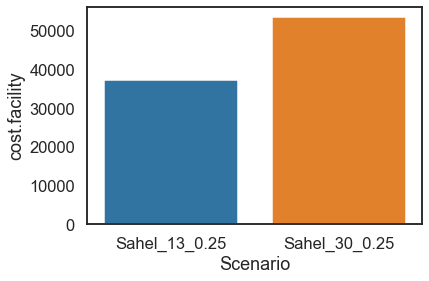

In [169]:
plot_df = marita_df[np.in1d(marita_df["Scenario"], ["Sahel_13_0.25", "Sahel_30_0.25"])]
sns.barplot(data=plot_df, x="Scenario", y="cost.facility")

In [224]:
s1_dict = dict(marita_df[marita_df["Scenario"]=="Sahel_13_0.25"].reset_index(drop=True).iloc[0])
s2_dict = dict(marita_df[marita_df["Scenario"]=="Sahel_30_0.25"].reset_index(drop=True).iloc[0])
print(s1_dict)
print(s2_dict)

s1_dict["cost.facility_total"] = s1_dict["cost.facility"] + s1_dict["cost.RDT"] + s1_dict["cost.ACT"]
s2_dict["cost.facility_total"] = s2_dict["cost.facility"] + s2_dict["cost.RDT"] + s2_dict["cost.ACT"]

# stack_order = ["cost.smc","cost.facility", "cost.ACT", "cost.RDT", "cost.severe", "cost.CHW", "cost.drug"]
stack_order = ["cost.smc","cost.facility_total", "cost.severe", "cost.CHW", "cost.drug"]

{'Unnamed: 0': 204, 'scenario_number': 13, 'archetype': 'Sahel', 'drug_type': 'DP', 'Scenario': 'Sahel_13_0.25', 'cost.CHW': 2214.31569119611, 'cost.RDT': 1491.2149558265398, 'cost.drug': 1404.30298744595, 'cost.ACT': 673.017141372708, 'cost.smc': 86301.3677253027, 'cost.facility': 37315.6866828902, 'cost.severe': 199.22658801494998, 'cost.bednet': 13869.3360026799, 'cost.iver': 0.0, 'cost.prim': 0.0, 'cost.CHW.d': 2214.31569119611, 'cost.RDT.d': 1491.2149558265398, 'cost.drug.d': 1404.30298744595, 'cost.facility.d': 37315.6866828902, 'cost.severe.d': 199.22658801494998, 'cost.d': 143468.467774729, 'cost': 143468.467774729, 'cases': 4240.33468395015}
{'Unnamed: 0': 272, 'scenario_number': 30, 'archetype': 'Sahel', 'drug_type': 'None', 'Scenario': 'Sahel_30_0.25', 'cost.CHW': 0.0, 'cost.RDT': 2139.3413057994, 'cost.drug': 0.0, 'cost.ACT': 964.6945744040289, 'cost.smc': 85852.3831755384, 'cost.facility': 53547.5618354821, 'cost.severe': 306.410286777593, 'cost.bednet': 13869.3360026799, 

In [225]:
def make_stacked_bar_plot(s1_dict, s2_dict, stack_order, labels):
    plt.close('all')
    plt.figure(dpi=200)
    x = labels
    bot = np.array([0.,0.])
    
    for i in range(len(stack_order)):
        c="C{}".format(i)
        y = np.array([s1_dict[stack_order[i]], s2_dict[stack_order[i]]])/5
        print(stack_order[i])
        print(y)
        plt.bar(labels, y, bottom=bot, label=stack_order[i], color=c, edgecolor=c)
        bot += y
    plt.legend()
    plt.ylim(0,np.max(bot)*1.1)
    plt.ylabel("Total cost per 1000 individuals")

cost.smc
[17170.47663511 17260.27354506]
cost.facility_total
[11330.31954314  7895.98375602]
cost.severe
[61.28205736 39.8453176 ]
cost.CHW
[  0.         442.86313824]
cost.drug
[  0.         280.86059749]


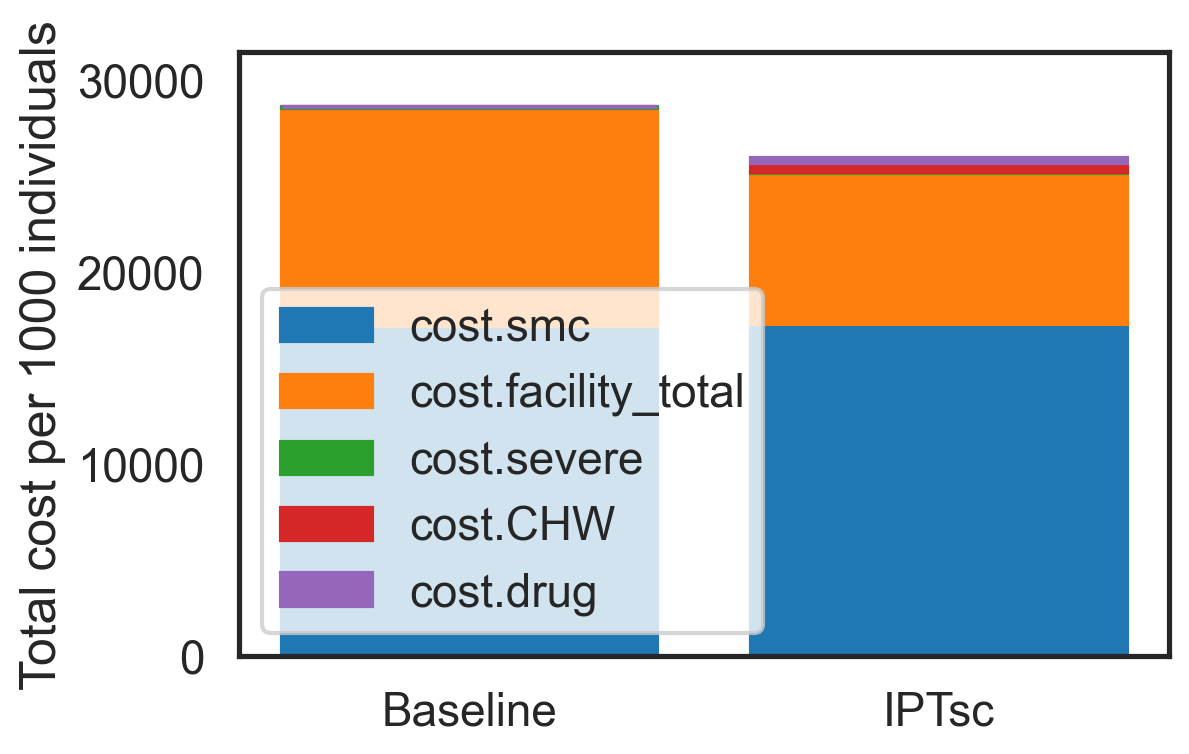

In [239]:
s1_dict = dict(marita_df[marita_df["Scenario"]=="Sahel_13_0.25"].reset_index(drop=True).iloc[0])
s2_dict = dict(marita_df[marita_df["Scenario"]=="Sahel_30_0.25"].reset_index(drop=True).iloc[0])

s1_dict["cost.facility_total"] = s1_dict["cost.facility"] + s1_dict["cost.RDT"] + s1_dict["cost.ACT"]
s2_dict["cost.facility_total"] = s2_dict["cost.facility"] + s2_dict["cost.RDT"] + s2_dict["cost.ACT"]

# stack_order = ["cost.smc","cost.facility", "cost.ACT", "cost.RDT", "cost.severe", "cost.CHW", "cost.drug"]
stack_order = ["cost.smc","cost.facility_total", "cost.severe", "cost.CHW", "cost.drug"]

make_stacked_bar_plot(s2_dict, s1_dict, stack_order, ["Baseline", "IPTsc"])
# plt.savefig("sahel_costs_breakdown.pdf")

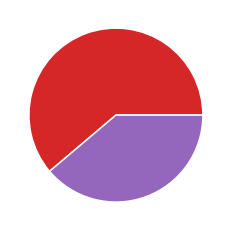

In [240]:
plt.pie([s1_dict["cost.CHW"], s1_dict["cost.drug"]], colors=["C3","C4"])
plt.savefig("figures/2021-04-13_dryrun/iptsc_cost_breakdown_sahel.pdf")

cost.smc
[0. 0.]
cost.facility_total
[9930.20792832 7395.03413347]
cost.severe
[340.62388228 211.9029105 ]
cost.CHW
[  0.         982.47761925]
cost.drug
[  0.        274.1271548]


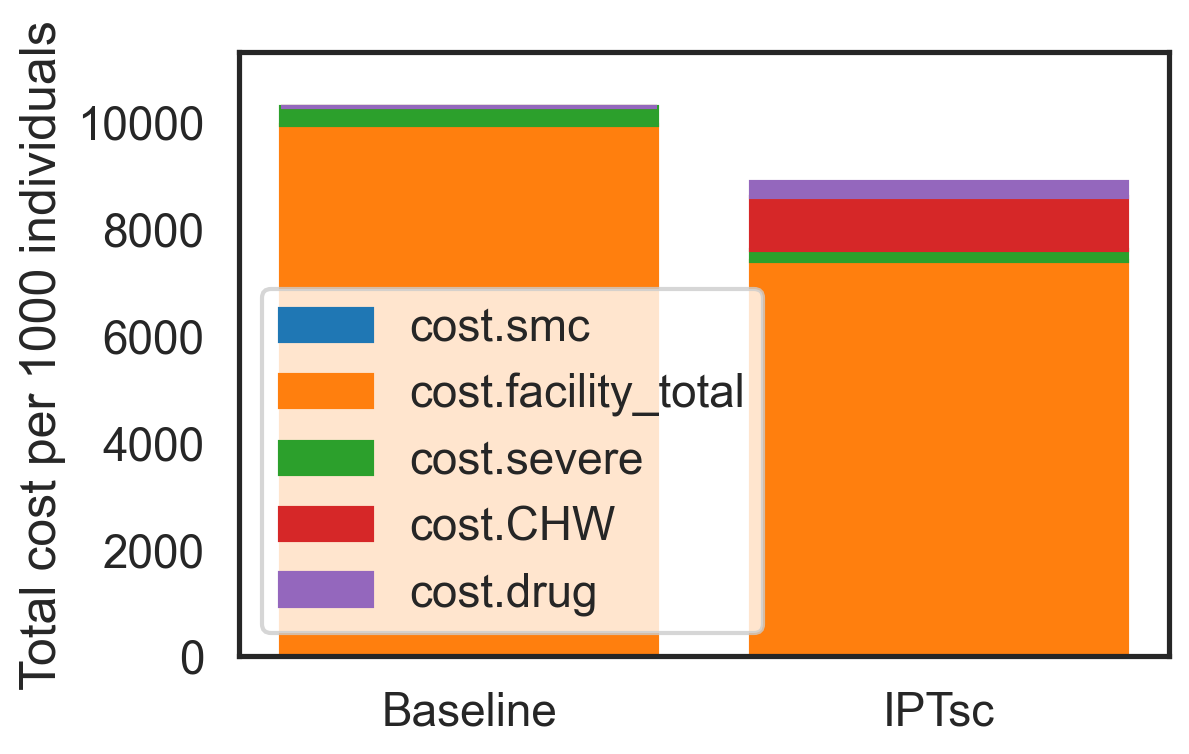

In [230]:
s1_dict = dict(marita_df[marita_df["Scenario"]=="Southern_13_0.25"].reset_index(drop=True).iloc[0])
s2_dict = dict(marita_df[marita_df["Scenario"]=="Southern_30_0.25"].reset_index(drop=True).iloc[0])

s1_dict["cost.facility_total"] = s1_dict["cost.facility"] + s1_dict["cost.RDT"] + s1_dict["cost.ACT"]
s2_dict["cost.facility_total"] = s2_dict["cost.facility"] + s2_dict["cost.RDT"] + s2_dict["cost.ACT"]

# stack_order = ["cost.smc","cost.facility", "cost.ACT", "cost.RDT", "cost.severe", "cost.CHW", "cost.drug"]
stack_order = ["cost.smc","cost.facility_total", "cost.severe", "cost.CHW", "cost.drug"]

make_stacked_bar_plot(s2_dict, s1_dict, stack_order, ["Baseline", "IPTsc"])
plt.savefig("southern_costs_breakdown.pdf")

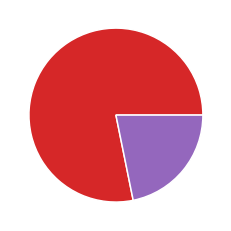

In [238]:
plt.pie([s1_dict["cost.CHW"], s1_dict["cost.drug"]], colors=["C3","C4"])
plt.savefig("figures/2021-04-13_dryrun/iptsc_cost_breakdown_southern.pdf")

# IPTsc vs SMC CEA

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Sahel')

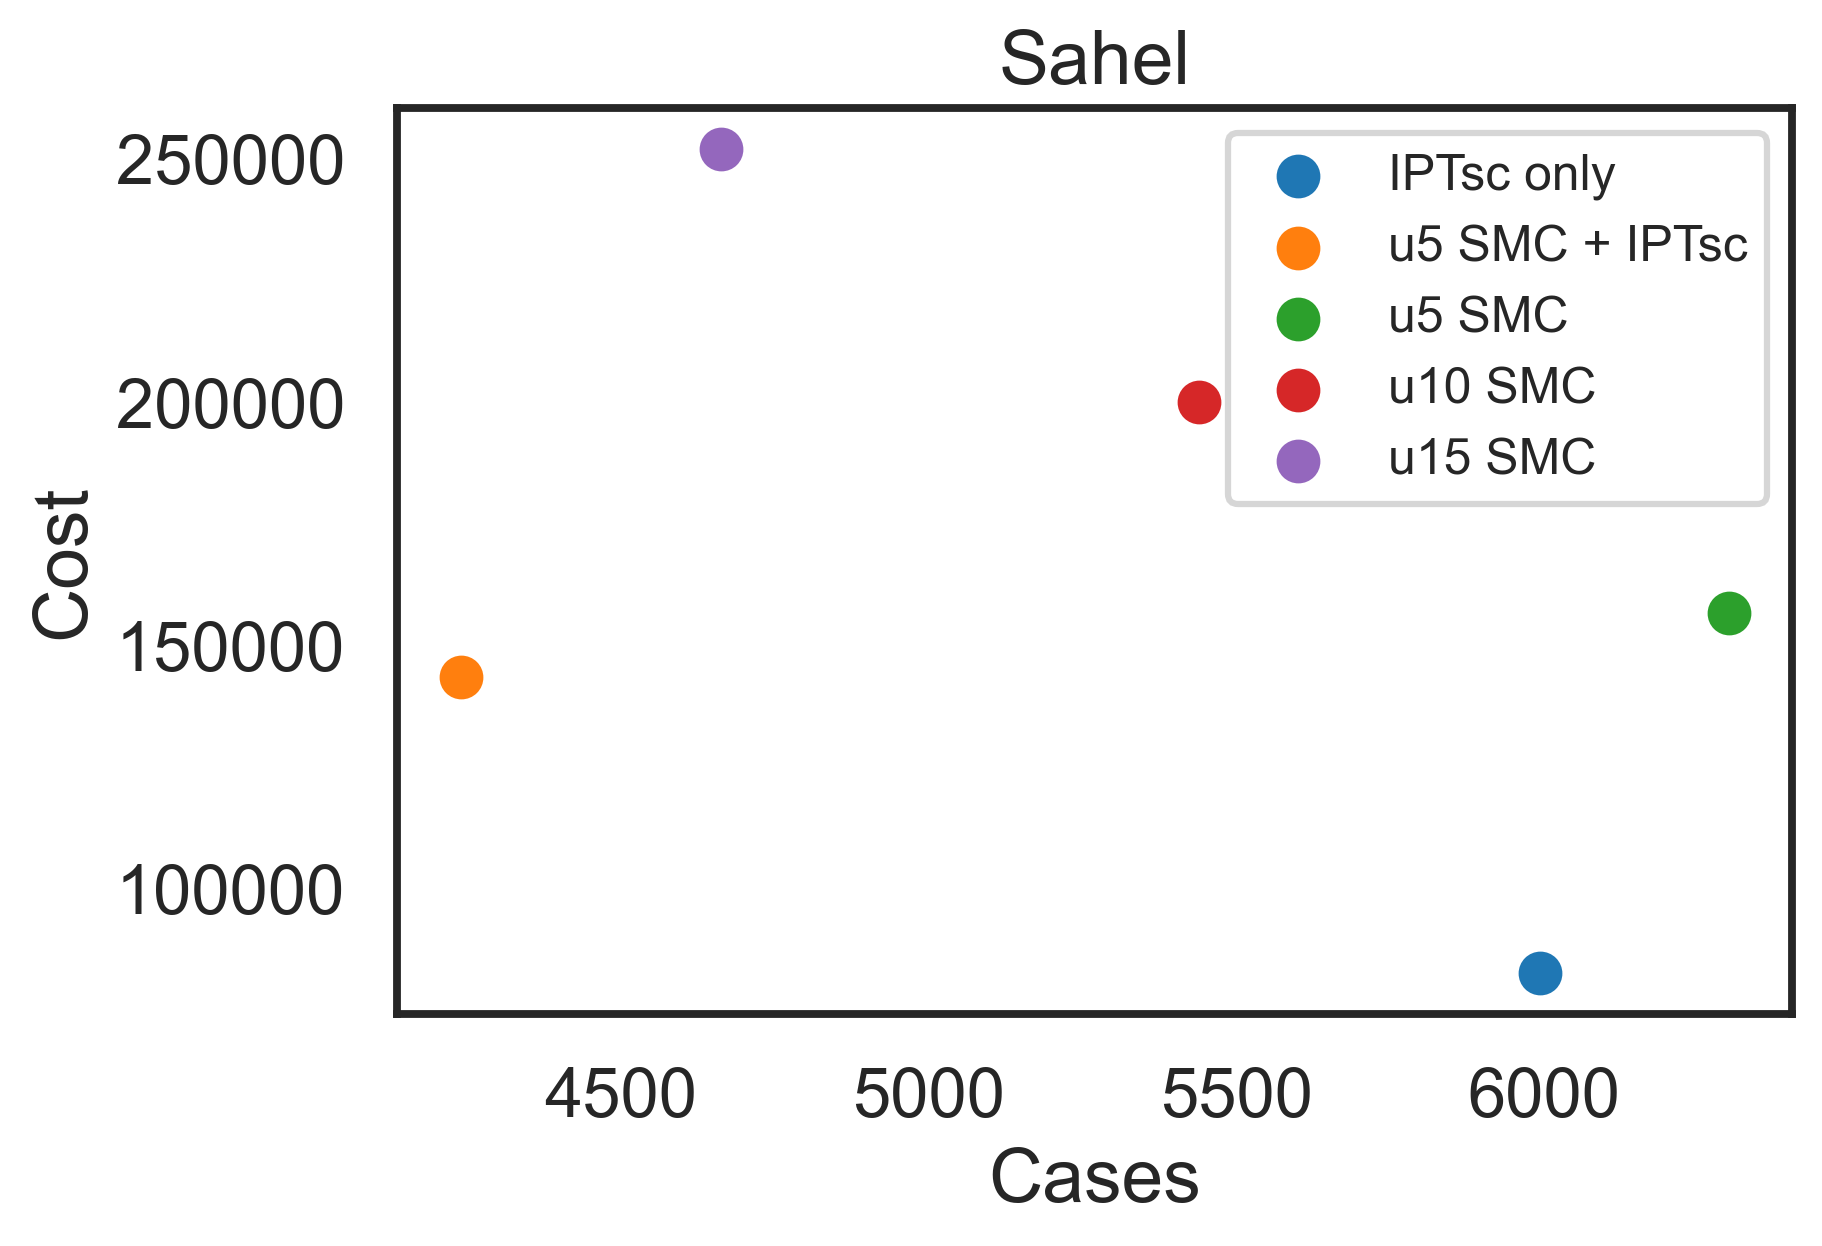

In [5]:
scenario_names = {
    13: "u5 SMC + IPTsc",
    30: "u5 SMC",
    34: "IPTsc only",
    35: "u10 SMC",
    36: "u15 SMC"
}

sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Sahel",
                                       np.in1d(marita_df["scenario_number"], list(scenario_names.keys())),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]


sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    plt.scatter(row["cases"], row["cost"], label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost")
plt.xlabel("Cases")
plt.title("Sahel")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Sahel')

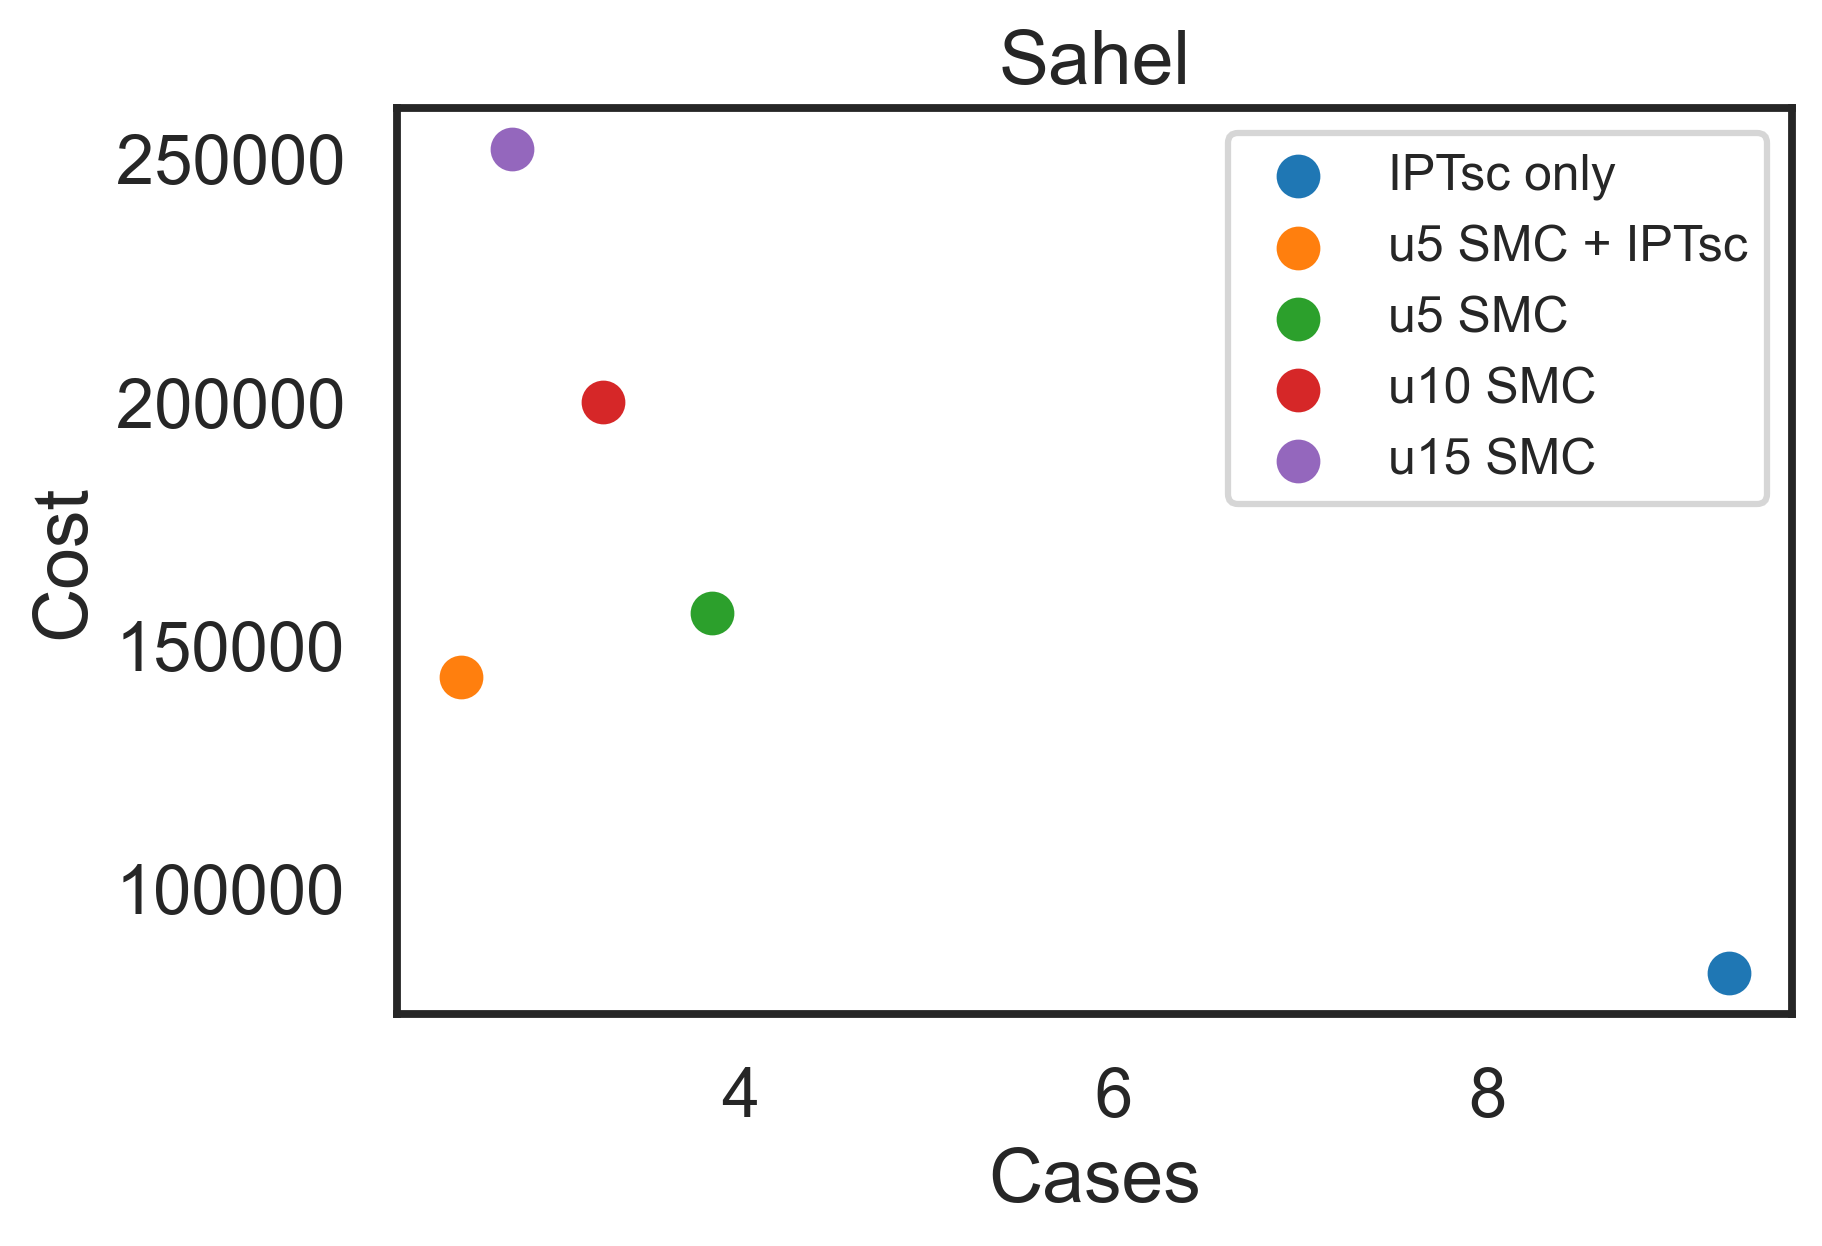

In [6]:
scenario_names = {
    13: "u5 SMC + IPTsc",
    30: "u5 SMC",
    34: "IPTsc only",
    35: "u10 SMC",
    36: "u15 SMC"
}

sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Sahel",
                                       np.in1d(marita_df["scenario_number"], list(scenario_names.keys())),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]


sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

cost_per_severe = 79.60
for i,row in sdf.iterrows():
    plt.scatter(row["cost.severe"]/79.60, row["cost"], label=row["scenario_name"])
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost")
plt.xlabel("Cases")
plt.title("Sahel")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


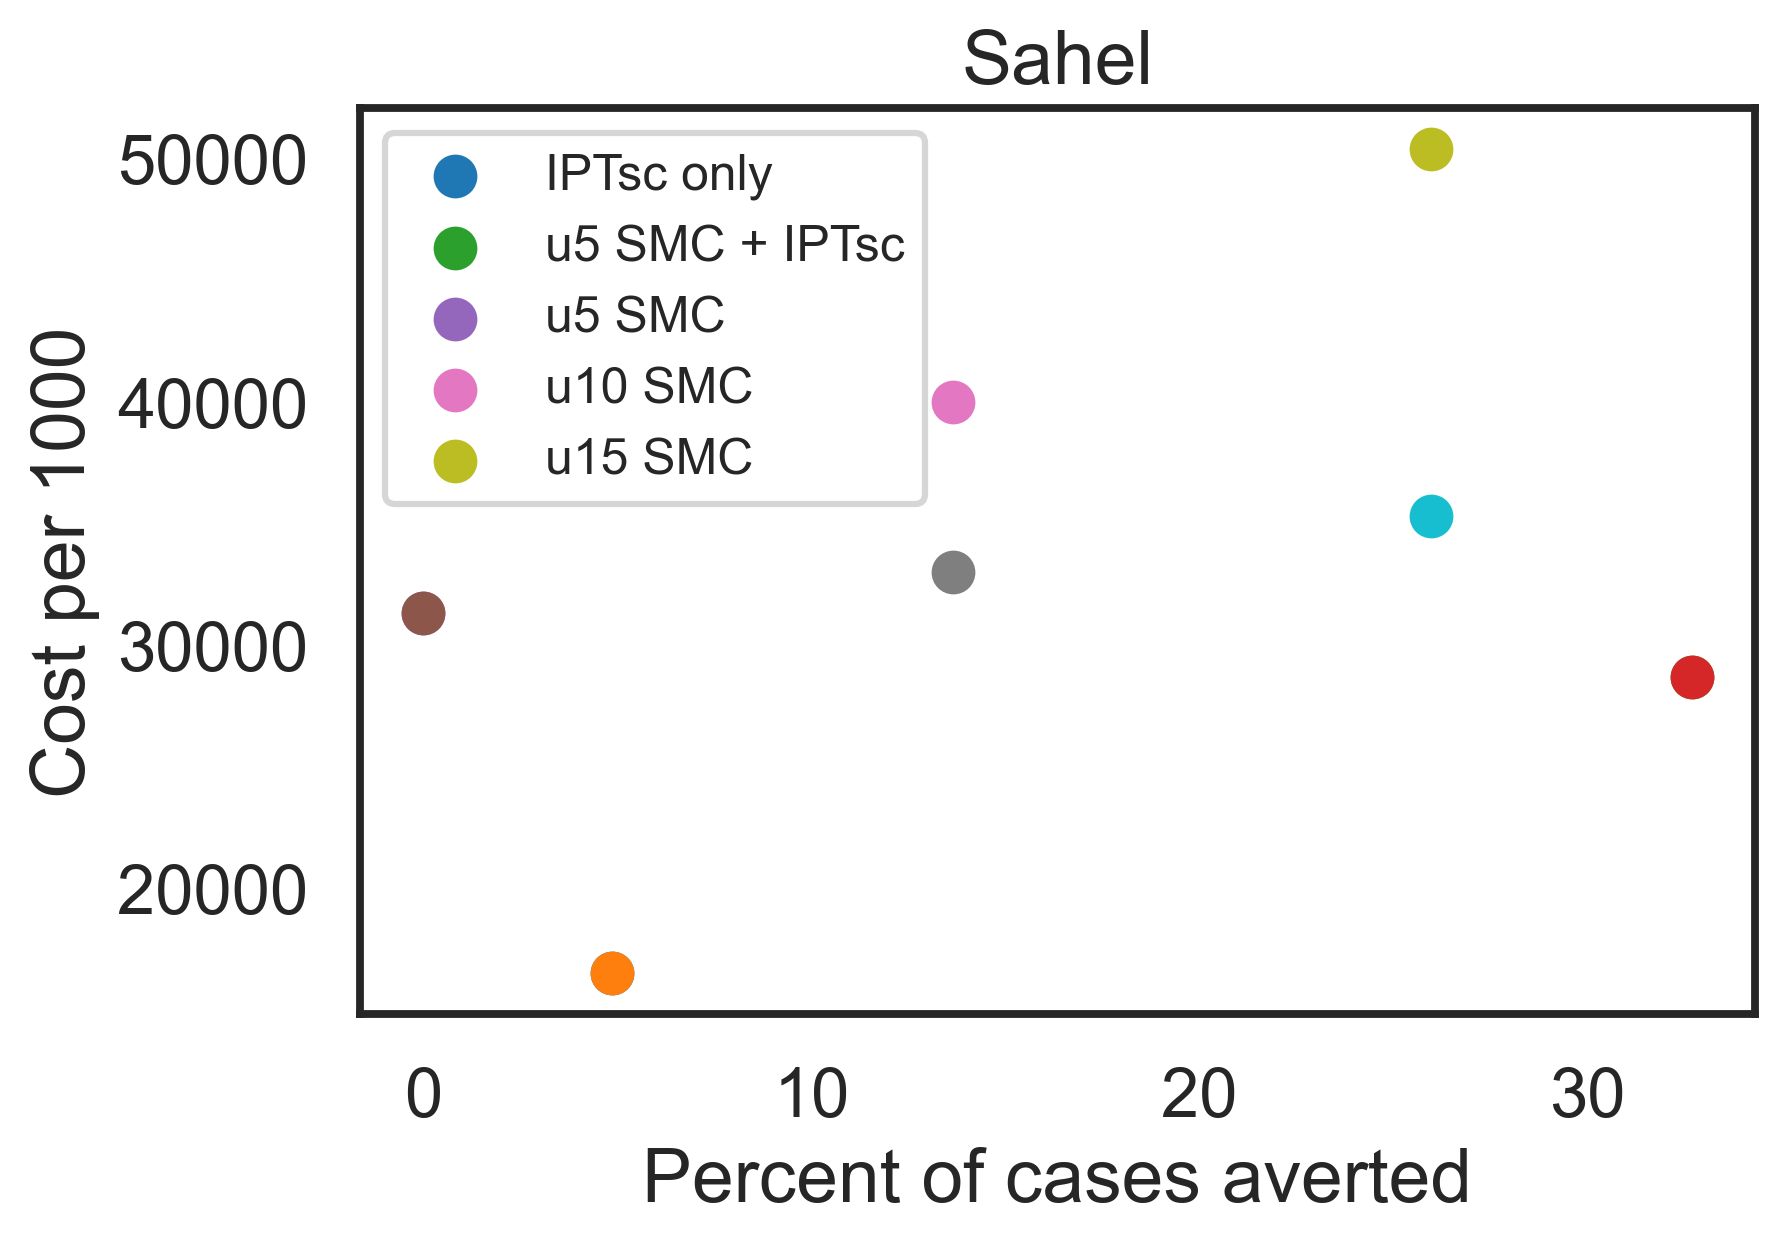

In [14]:
baseline_cases = 6300.402214 #sahel

scenario_names = {
    13: "u5 SMC + IPTsc",
    30: "u5 SMC",
    34: "IPTsc only",
    35: "u10 SMC",
    36: "u15 SMC"
}

sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Sahel",
                                       np.in1d(marita_df["scenario_number"], list(scenario_names.keys())),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]


sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    x = 100*(baseline_cases-row["cases"])/baseline_cases
    y = row["cost"]/5
    y2 = row["cost.low"]/5
    plt.scatter(x, y , label=row["scenario_name"])
    plt.scatter(x,y2)
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost per 1000")
plt.xlabel("Percent of cases averted")
plt.title("Sahel")
plt.savefig("figures/2021-04-13_dryrun/smc_cea.pdf")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Text(0.5, 1.0, 'Sahel')

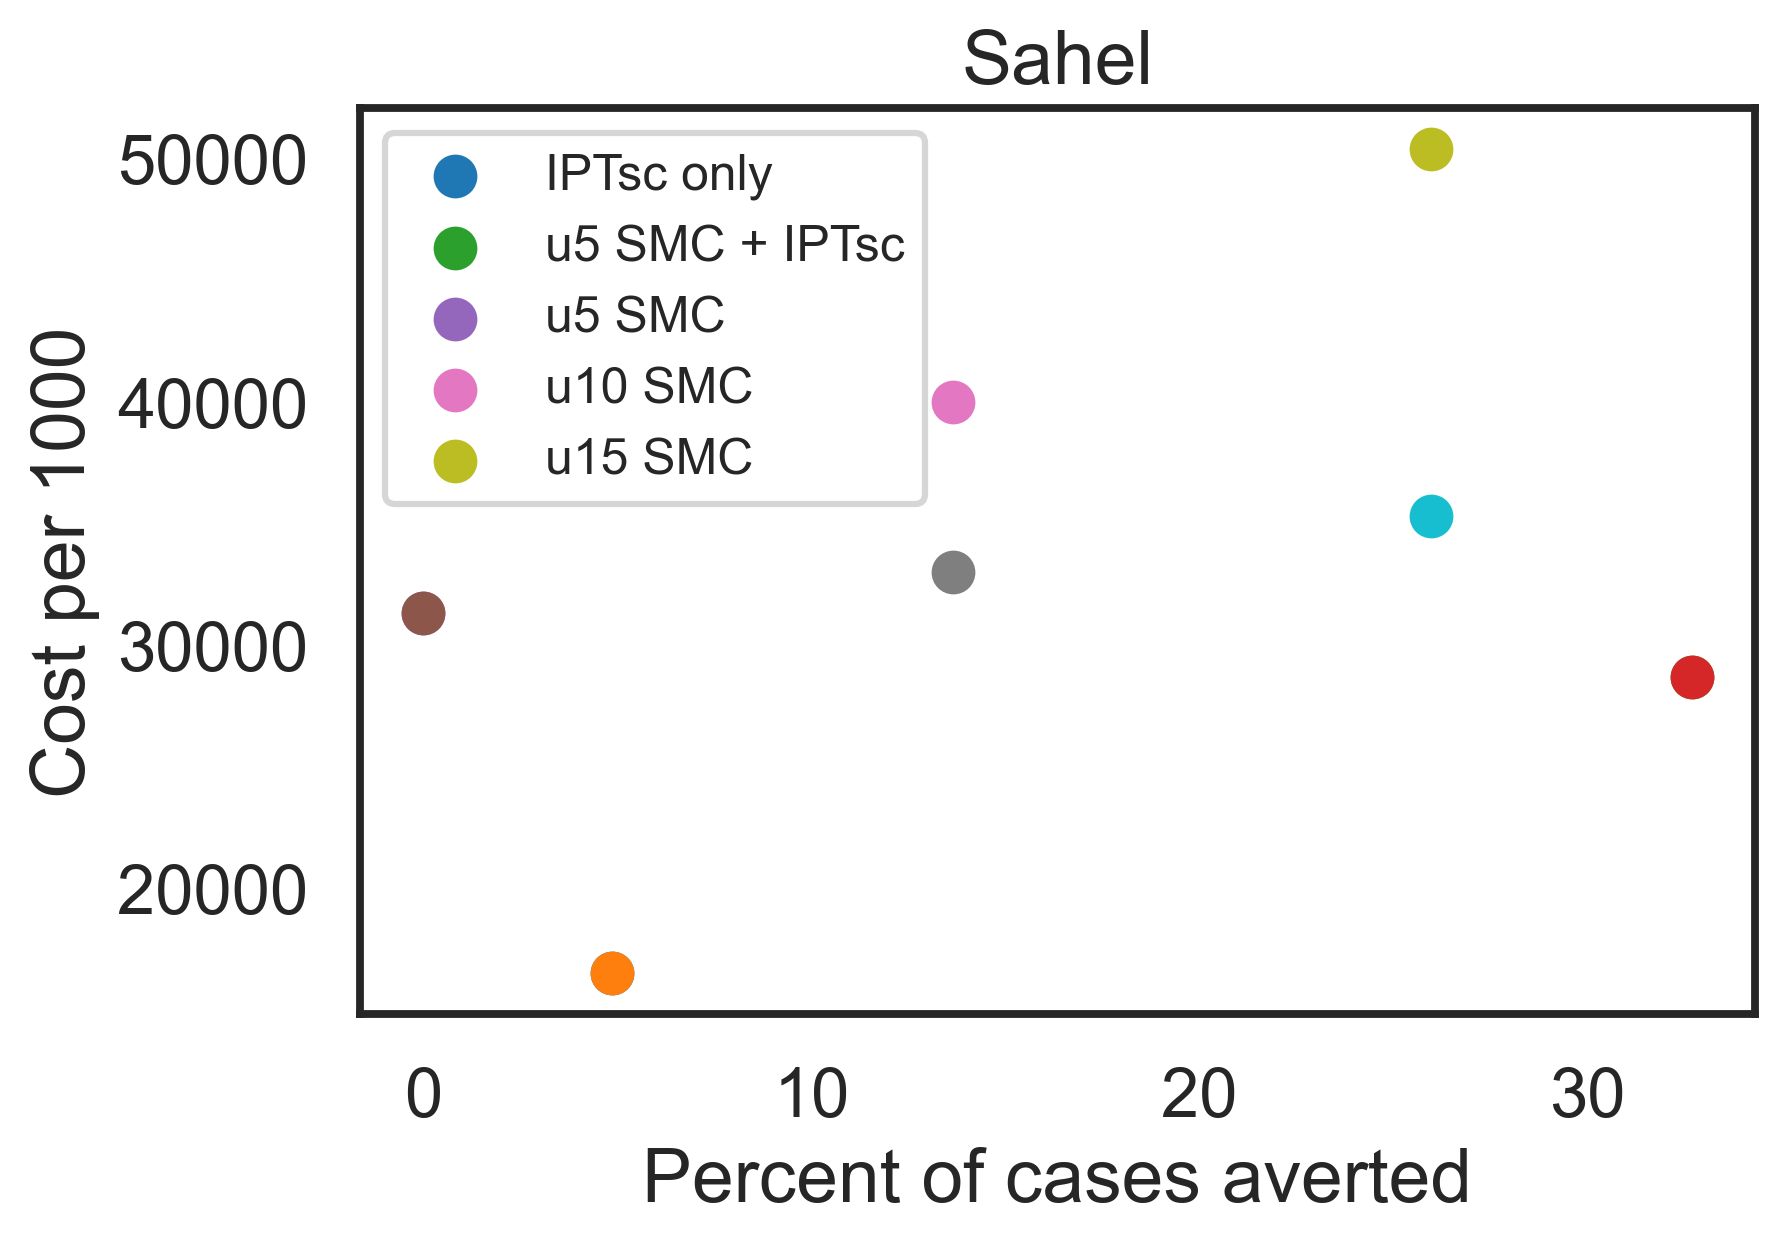

In [107]:
baseline_cases = 6300.402214 #sahel

scenario_names = {
    13: "u5 SMC + IPTsc",
    30: "u5 SMC",
    34: "IPTsc only",
    35: "u10 SMC",
    36: "u15 SMC"
}

sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Sahel",
                                       np.in1d(marita_df["scenario_number"], list(scenario_names.keys())),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]


sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    x = 100*(baseline_cases-row["cases"])/baseline_cases
    y = row["cost"]/5
    y2 = row["cost.low"]/5
    plt.scatter(x, y , label=row["scenario_name"])
    plt.scatter(x,y2)
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=12)
plt.ylabel("Cost per 1000")
plt.xlabel("Percent of cases averted")
plt.title("Sahel")
# plt.savefig("figures/2021-04-13_dryrun/smc_cea.pdf")

In [108]:
# estimate cost of SMC with DP:
# 

Unnamed: 0  scenario_number archetype drug_type       Scenario  \
143         144               34     Sahel        DP  Sahel_34_0.25   
203         204               13     Sahel        DP  Sahel_13_0.25   
271         272               30     Sahel      None  Sahel_30_0.25   
297         298               35     Sahel      None  Sahel_35_0.25   
301         302               36     Sahel      None  Sahel_36_0.25   

        cost.CHW     cost.RDT    cost.drug     cost.ACT       cost.smc  ...  \
143  2208.399618  2434.745925  1400.393010  1099.232795       0.000000  ...   
203  2214.315691  1491.214956  1404.302987   673.017141   86301.367725  ...   
271     0.000000  2139.341306     0.000000   964.694574   85852.383176  ...   
297     0.000000  1865.365670     0.000000   841.609592  136536.161224  ...   
301     0.000000  1624.881525     0.000000   732.980212  194733.349829  ...   

     cost.drug.d  cost.facility.d  cost.severe.d         cost.d  cost.smc.ref  \
143  1400.393010     60899.226322     739.628777   82650.962449  85852.383176   
203  1404.302987     37315.686683     199.226588  143468.467775  85852.383176   
271     0.000000     53547.561835     306.410287  156679.727181  85852.383176   
297     0.000000     46681.281816     259.769733  200053.524038  85852.383176   
301     0.000000     40661.170545     220.995426  251842.713539  85852.383176   

      cost.smc.low       cost.low           cost        cases   scenario_name  
143       0.000000   82650.962449   82650.962449  5993.345493      IPTsc only  
203   86301.367725  143468.467775  143468.467775  4240.334684  u5 SMC + IPTsc  
271   85852.383176  156679.727181  156679.727181  6300.402214          u5 SMC  
297  101433.747555  164951.110369  200053.524038  5440.227777         u10 SMC  
301  119337.338464  176446.702174  251842.713539  4663.131110         u15 SMC  

[5 rows x 27 columns]

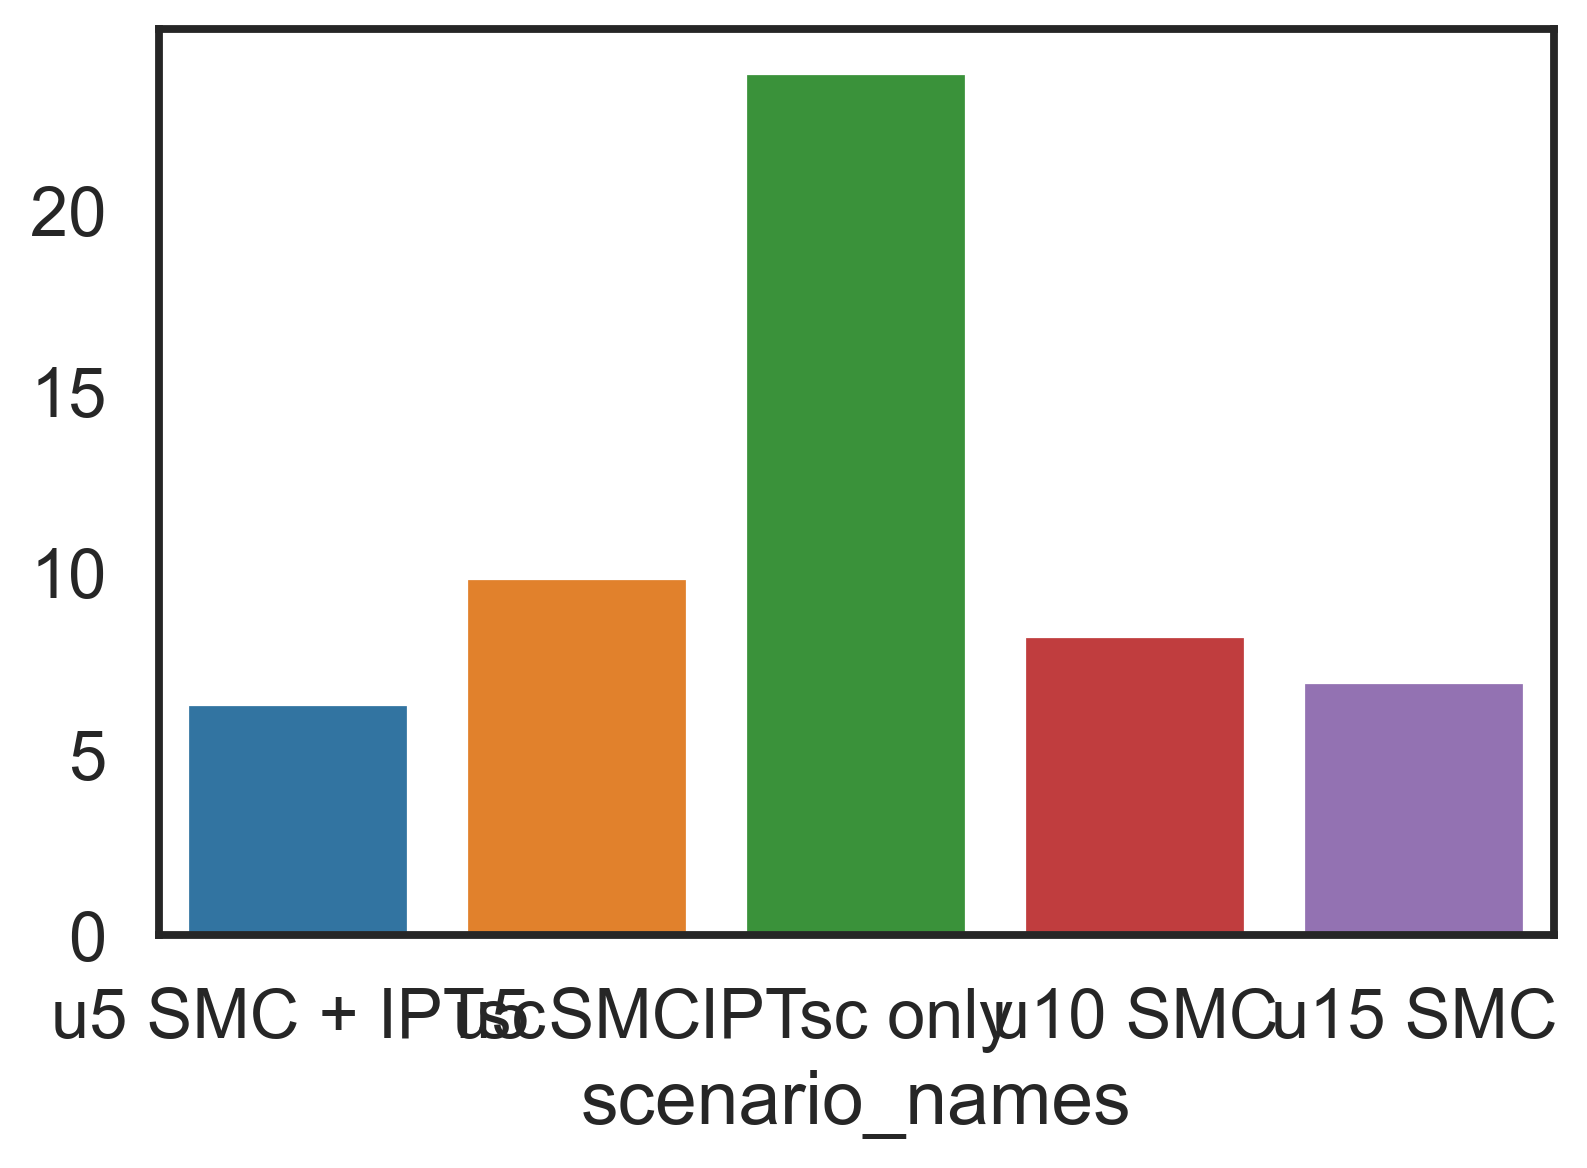

In [27]:
plt.figure(dpi=300)
archetype="Sahel"
foo = get_agg_df_w_baseline(archetype)

scenario_names = {
    13: "u5 SMC + IPTsc",
    30: "u5 SMC",
    34: "IPTsc only",
    35: "u10 SMC",
    36: "u15 SMC"
}

foo = foo[np.logical_and(foo["burnin_approx_pfpr2_10"]==0.25,
                         np.in1d(foo["scenario_number"], list(scenario_names.keys())))]

foo["scenario_names"] = foo["scenario_number"].map(scenario_names)

sns.barplot(data=foo, x="scenario_names", y=foo["severe_incidence_all"]*foo["pop_all"])

plt.savefig("figures/2021-04-13_dryrun/smc_severe_cases.pdf")

In [25]:
df = pd.read_csv("endpoints_312b5201-609d-eb11-a2ce-c4346bcb1550.csv")

scenario_names = {
    13: "u5 SMC + IPTsc",
    30: "u5 SMC",
    34: "IPTsc only",
    35: "u10 SMC",
    36: "u15 SMC"
}

df = df[np.logical_and(df["burnin_approx_pfpr2_10"]==0.25,
                         np.in1d(df["scenario_number"], list(scenario_names.keys())))]

df["scenario_names"] = df["scenario_number"].map(scenario_names)

<AxesSubplot:xlabel='scenario_names', ylabel='severe_incidence_all'>

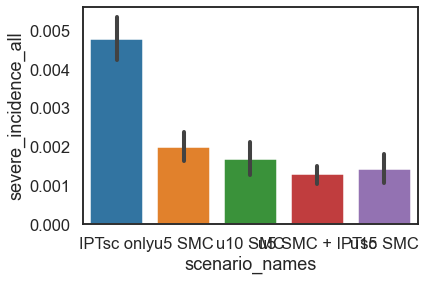

In [26]:
sns.barplot(data=df, x="scenario_names", y="severe_incidence_all")

# Cases averted vs baseline prevalence

In [30]:

archetype="Southern"
foo = get_agg_df_w_baseline(archetype)

scenario_names = {
    13: "IPTsc",
    32: "90% coverage of under-5s",
    33: "Same number of doses given to under-5s"
}

foo = foo[np.in1d(foo["scenario_number"], list(scenario_names.keys()))]

foo["scenario_names"] = foo["scenario_number"].map(scenario_names)

# Maybe start with 32 and 33, then show 13.

<Figure size 1800x1200 with 0 Axes>

Text(0, 0.5, 'Baseline PfPR2-10')

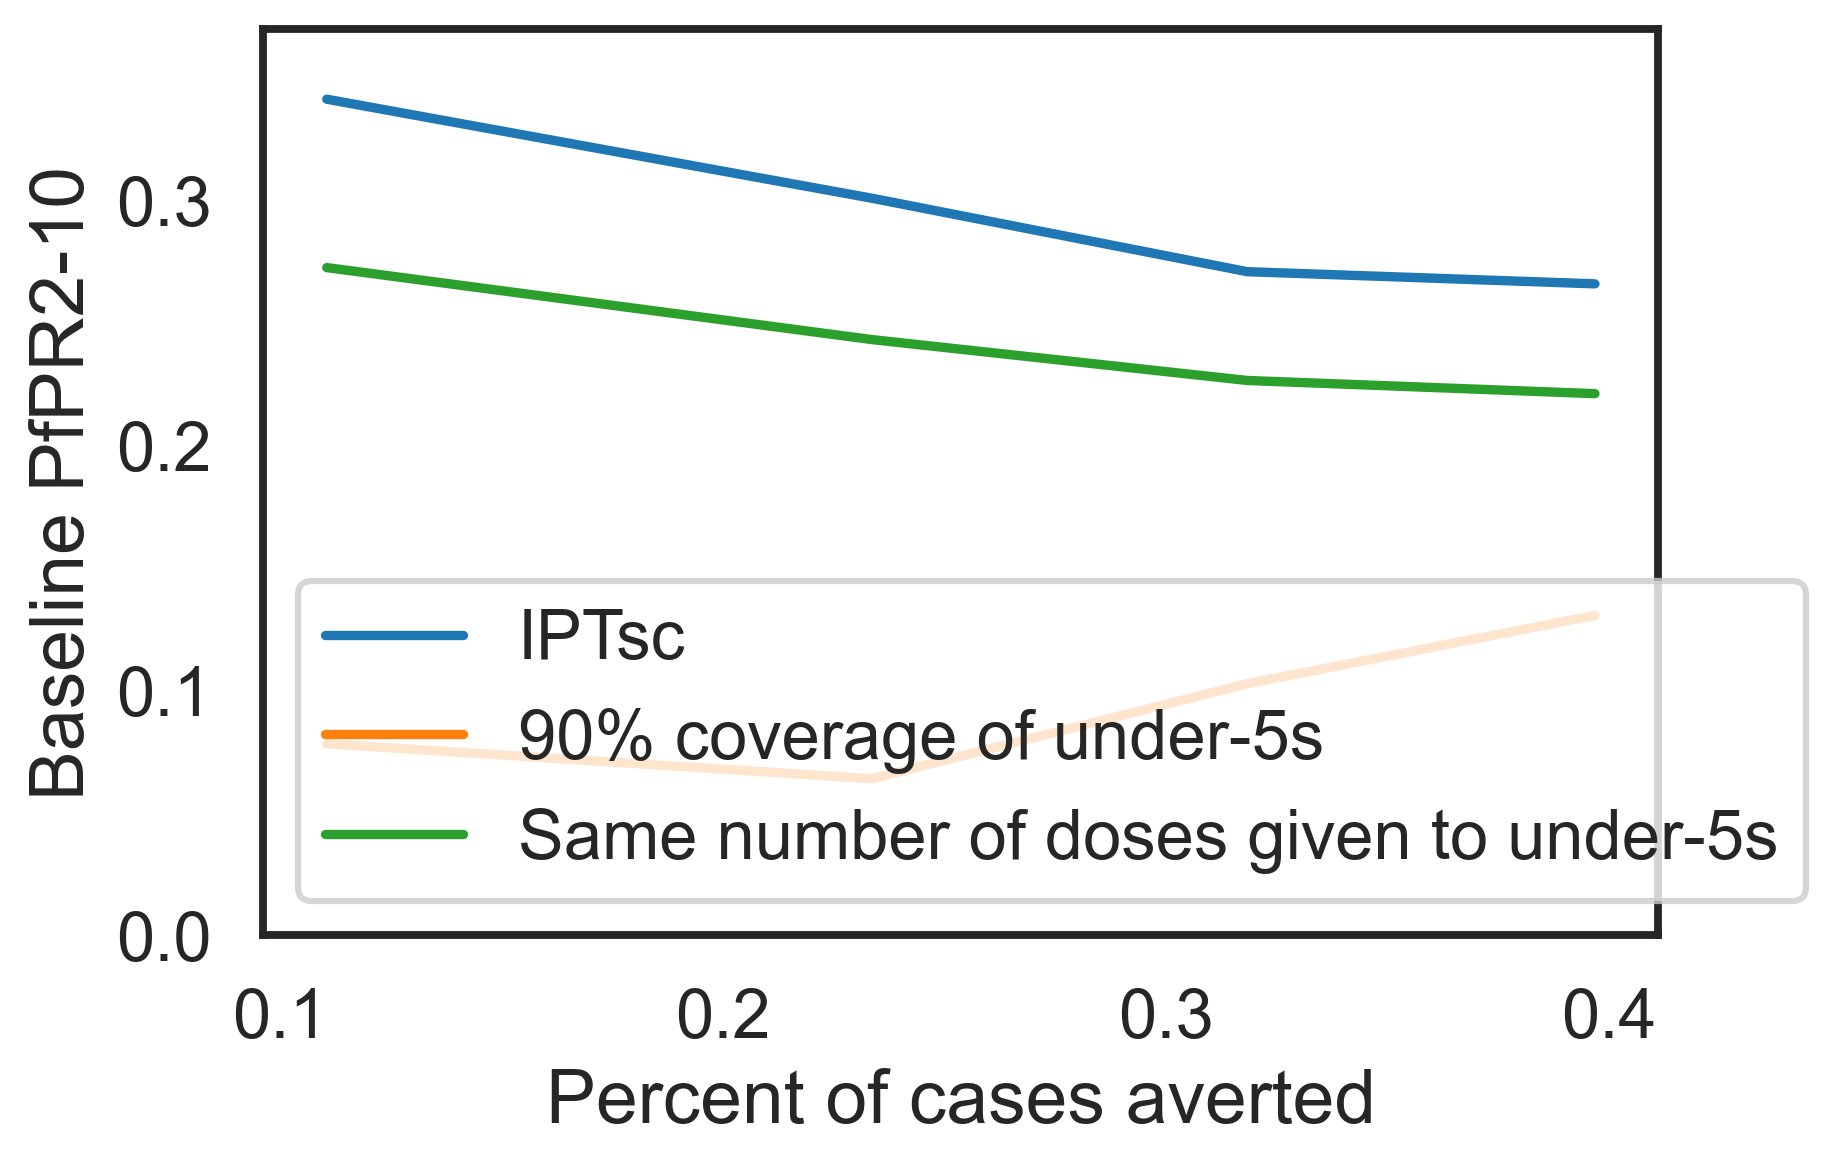

In [38]:
plt.figure(dpi=300)
for s, sdf in foo.groupby("scenario_number"):
    x = sdf["pfpr2_10_BASELINE"]
    y = (sdf["clinical_incidence_all_BASELINE"]-sdf["clinical_incidence_all"])/sdf["clinical_incidence_all_BASELINE"]
    plt.plot(x,y, label=scenario_names[s])
plt.legend()
plt.ylim([0,0.37])
plt.xlabel("Percent of cases averted")
plt.ylabel("Baseline PfPR2-10")

In [64]:
df = pd.read_csv("endpoints_a71e7b31-559d-eb11-a2ce-c4346bcb1550.csv")
df_baseline = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
df = df.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")

scenario_names = {
    13: "IPTsc",
    32: "90% coverage of under-5s",
    33: "Same number of doses given to under-5s"
}

df = df[np.in1d(df["scenario_number"], list(scenario_names.keys()))]

df["scenario_names"] = df["scenario_number"].map(scenario_names)
df["clinical_burden_averted"] = (df["clinical_incidence_all_BASELINE"]-df["clinical_incidence_all"])/df["clinical_incidence_all_BASELINE"]
df["severe_burden_averted"] = (df["severe_incidence_all_BASELINE"]-df["severe_incidence_all"])/df["severe_incidence_all_BASELINE"]

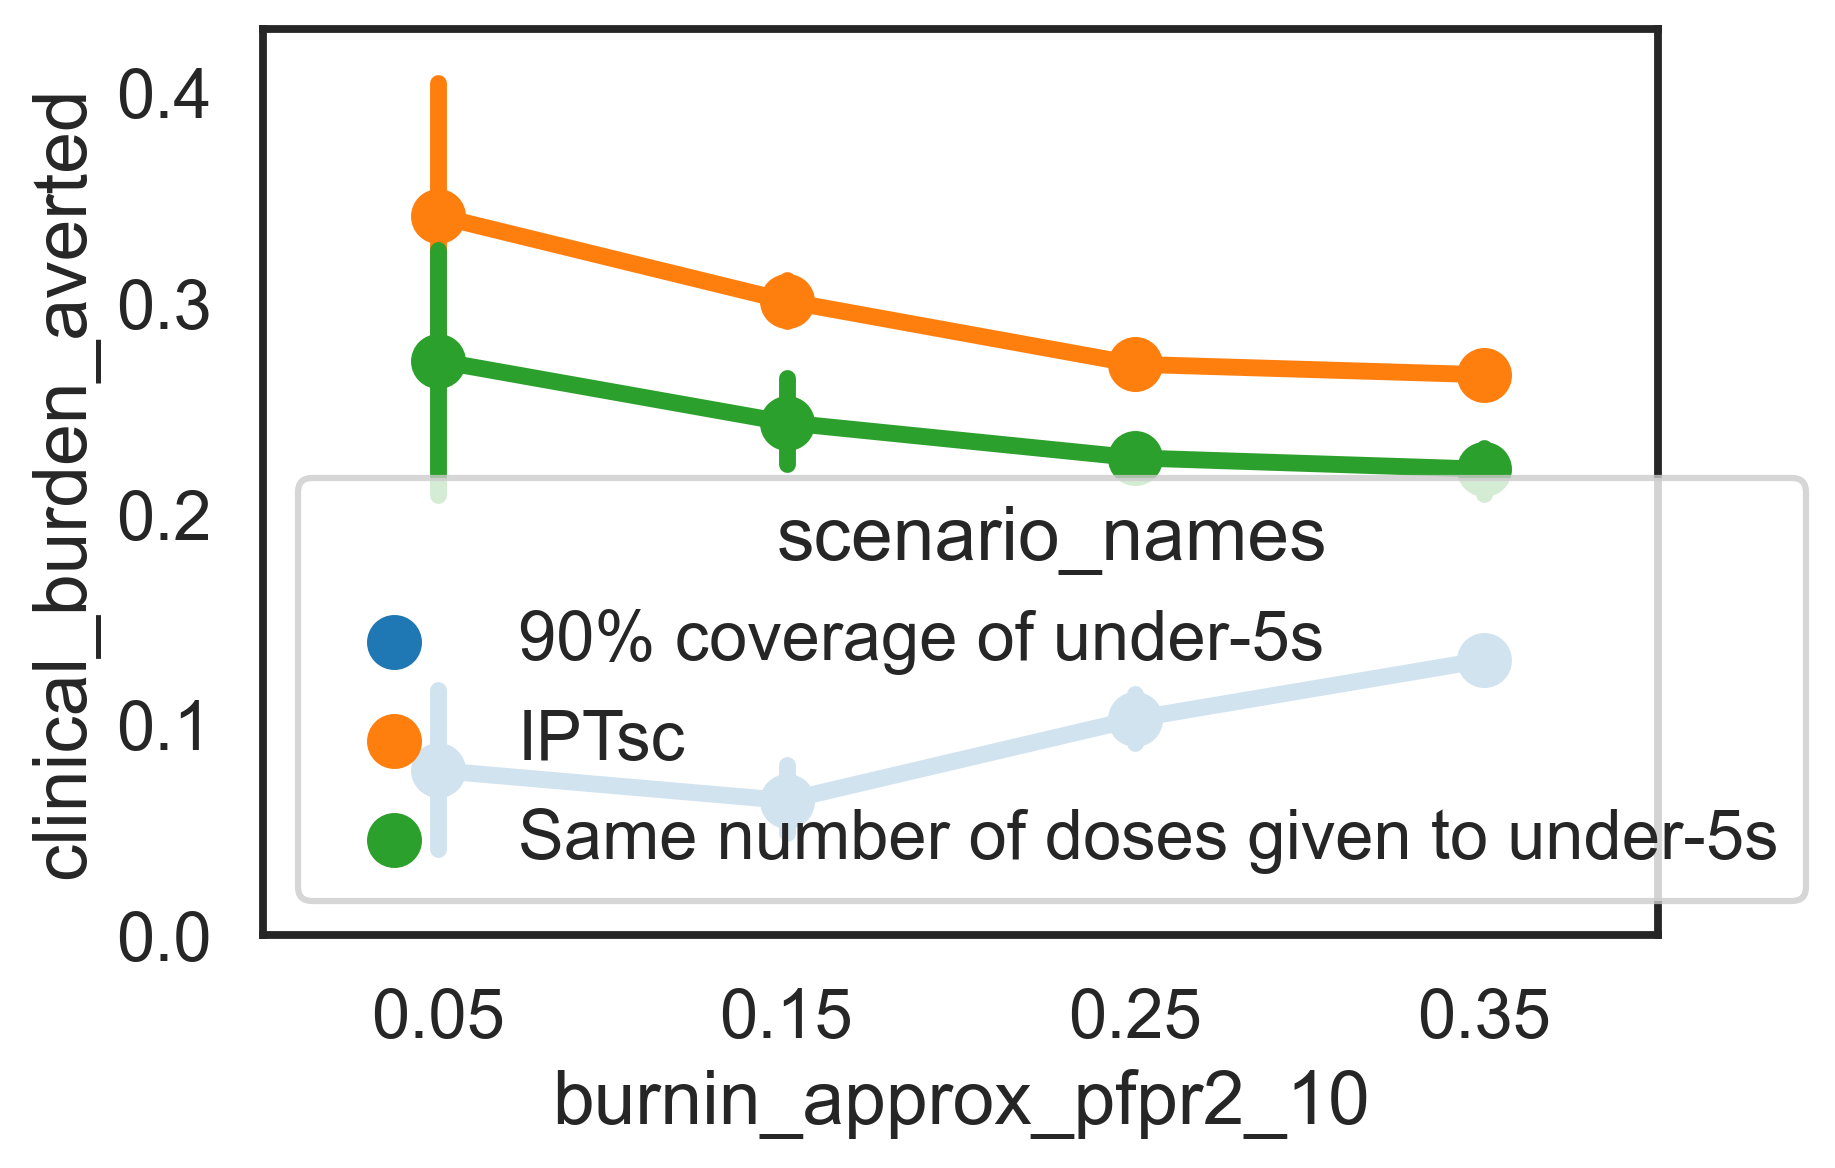

In [56]:
plt.figure(dpi=300)
sns.pointplot(data=df, x="burnin_approx_pfpr2_10", y="clinical_burden_averted", hue="scenario_names")
plt.ylim([0,0.43])
plt.savefig("figures/2021-04-13_dryrun/clinical_burden_age_targeting.pdf")

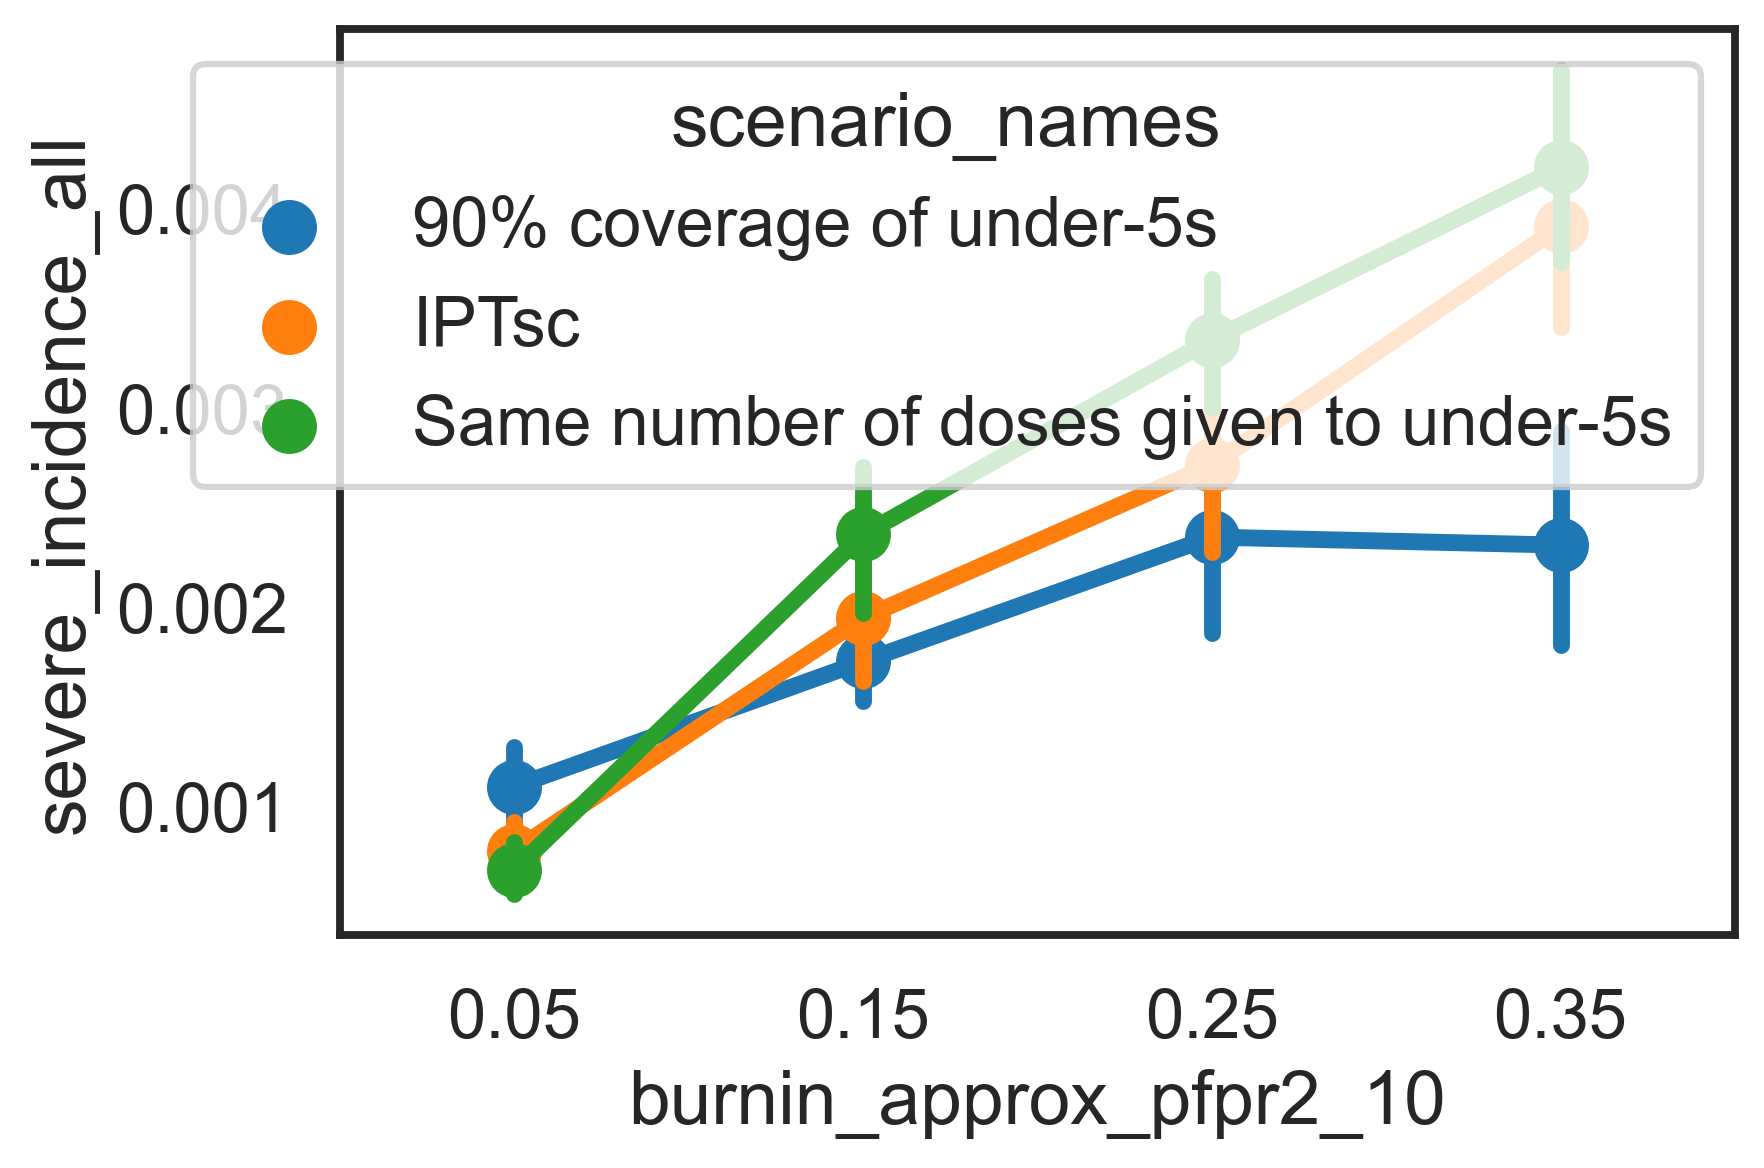

In [63]:
plt.figure(dpi=300)
sns.pointplot(data=df, x="burnin_approx_pfpr2_10", y="severe_incidence_all", hue="scenario_names")
# plt.ylim([0,0.43])
plt.savefig("figures/2021-04-13_dryrun/clinical_burden_age_targeting_severe.pdf")

In [68]:
df = pd.read_csv("endpoints_a71e7b31-559d-eb11-a2ce-c4346bcb1550.csv")
df_baseline = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()
df = df.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")

scenario_names = {
    13: "IPTsc",
    32: "90% coverage of under-5s",
    27: "Completely clear SAC infections"
}

df = df[np.in1d(df["scenario_number"], list(scenario_names.keys()))]

df["scenario_names"] = df["scenario_number"].map(scenario_names)
df["clinical_burden_averted"] = (df["clinical_incidence_all_BASELINE"]-df["clinical_incidence_all"])/df["clinical_incidence_all_BASELINE"]
df["severe_burden_averted"] = (df["severe_incidence_all_BASELINE"]-df["severe_incidence_all"])/df["severe_incidence_all_BASELINE"]

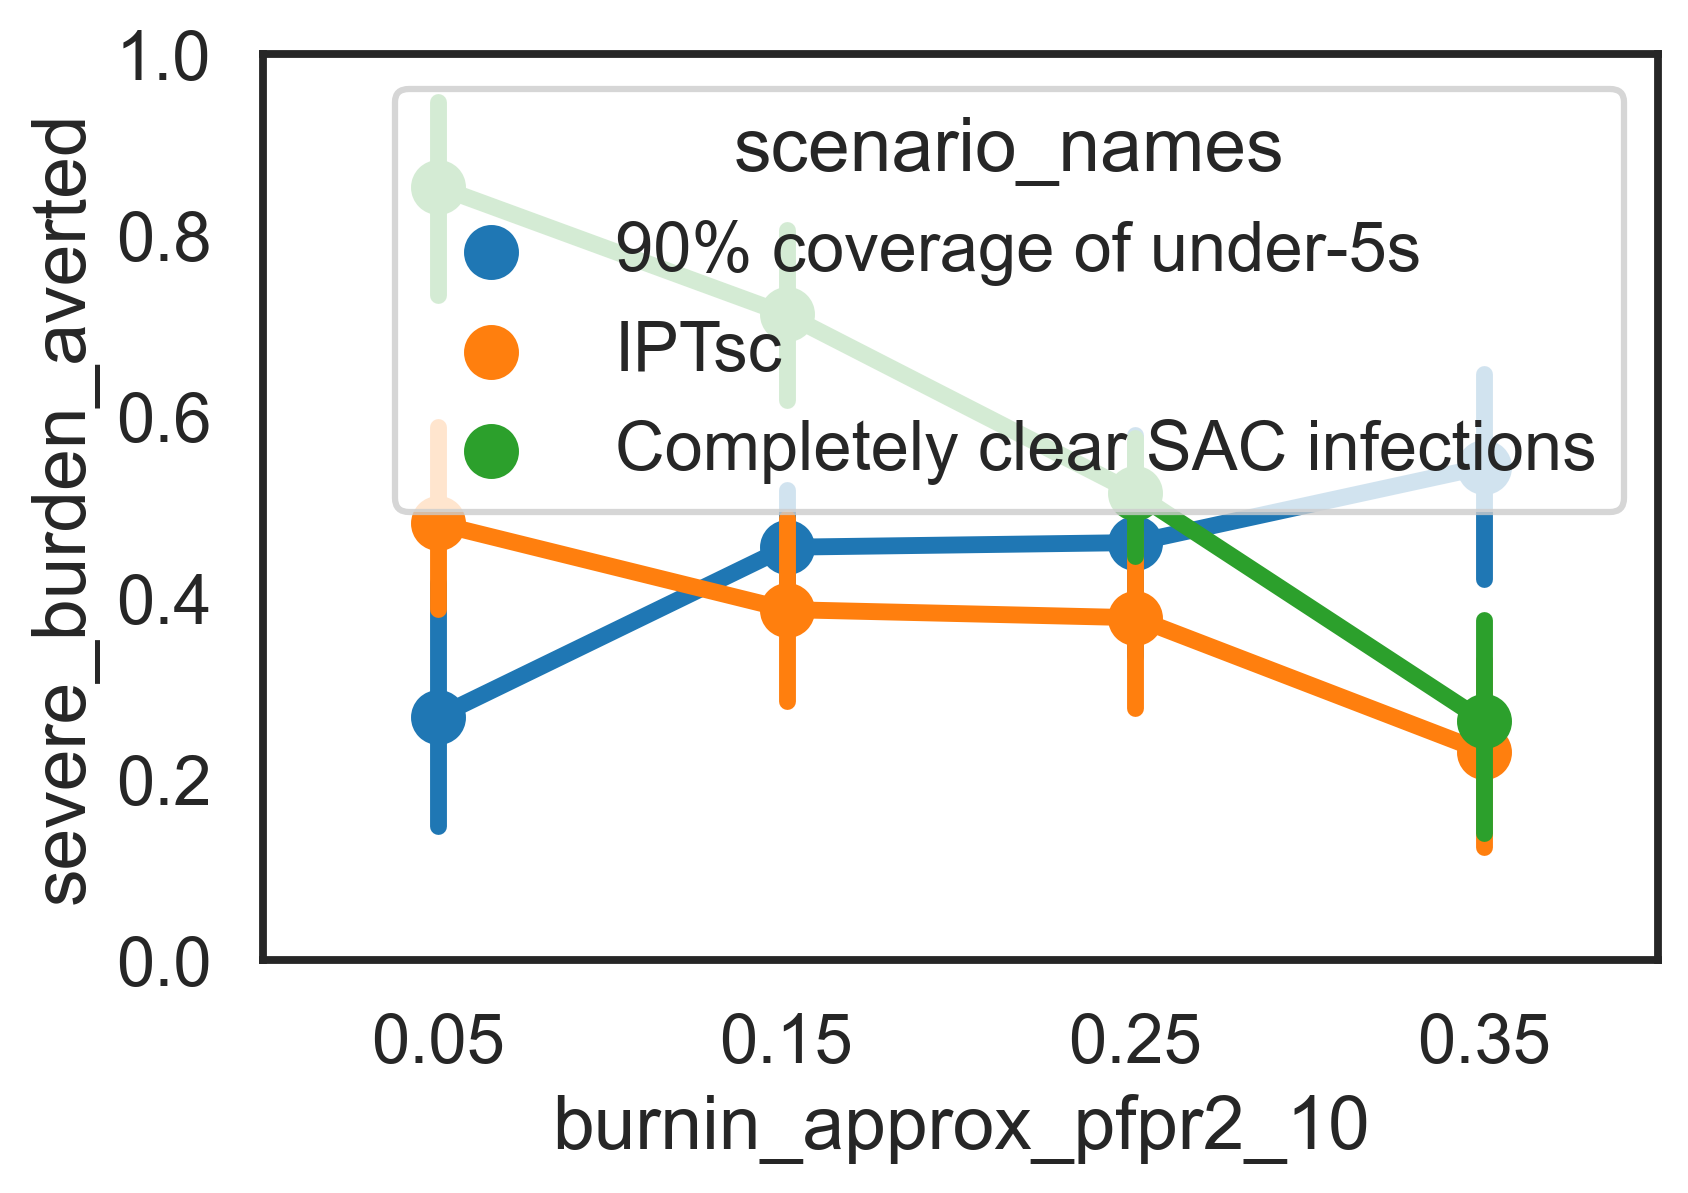

In [73]:
plt.figure(dpi=300)
sns.pointplot(data=df, x="burnin_approx_pfpr2_10", y="severe_burden_averted", hue="scenario_names")
plt.ylim([0,1])
plt.savefig("figures/2021-04-13_dryrun/severe_burden_averted_age_targeting.pdf")

{'whiskers': [<matplotlib.lines.Line2D at 0x12af7a46048>,
 'caps': [<matplotlib.lines.Line2D at 0x12af7a46860>,
 'boxes': [<matplotlib.lines.Line2D at 0x12af7a25518>],
 'medians': [<matplotlib.lines.Line2D at 0x12af7a46e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x12af7a6d128>],
 'means': []}

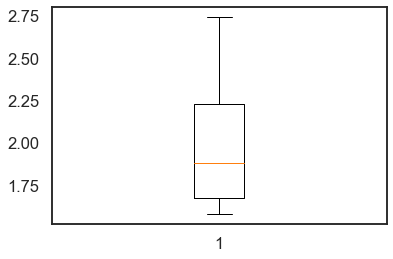

In [60]:
plt.boxplot(df["pfpr6_15_BASELINE"]/df["pfpr0_5_BASELINE"])

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


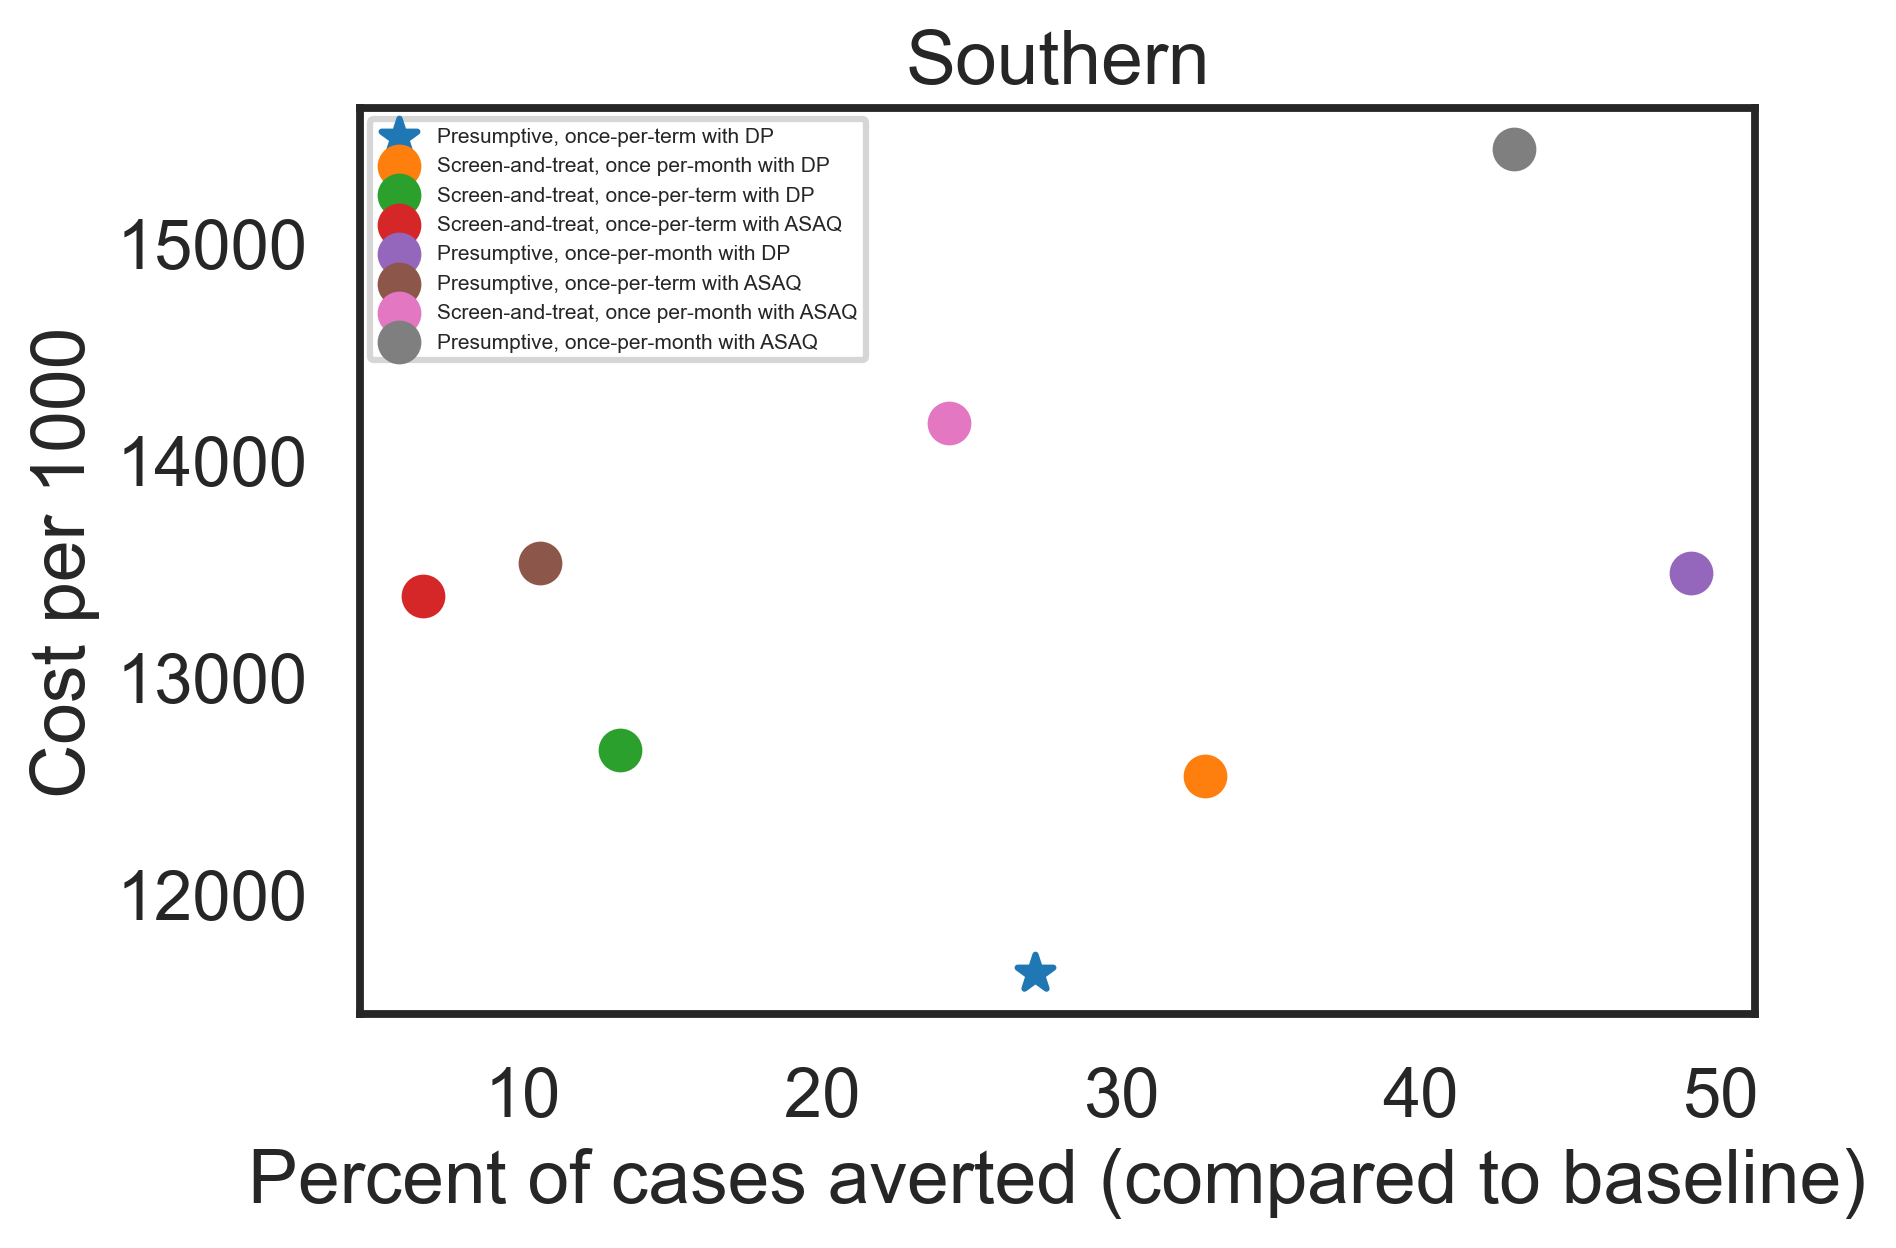

In [82]:
sdf = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Southern",
                                       np.in1d(marita_df["scenario_number"], [1,4,7,10,13,16,19,22]),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]

baseline_cases = 6624.79729648578

scenario_names = {
    1: "Presumptive, once-per-term with ASAQ",
    4: "Presumptive, once-per-month with ASAQ",
    7: "Screen-and-treat, once-per-term with ASAQ",
    10: "Screen-and-treat, once per-month with ASAQ",
    13: "Presumptive, once-per-term with DP",
    16: "Presumptive, once-per-month with DP",
    19: "Screen-and-treat, once-per-term with DP",
    22: "Screen-and-treat, once per-month with DP"
}

sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    x = 100*(baseline_cases-row["cases"])/baseline_cases
    y = row["cost"]/5
    marker='o'
    if row["scenario_number"] == 13: 
        marker= '*'
    plt.scatter(x,y, label=row["scenario_name"], marker=marker)
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=5)
plt.xlabel("Percent of cases averted (compared to baseline)")
plt.ylabel("Cost per 1000")
plt.title("Southern")
plt.savefig("figures/2021-04-13_dryrun/southern_cea_regimens_by_averted.pdf")

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


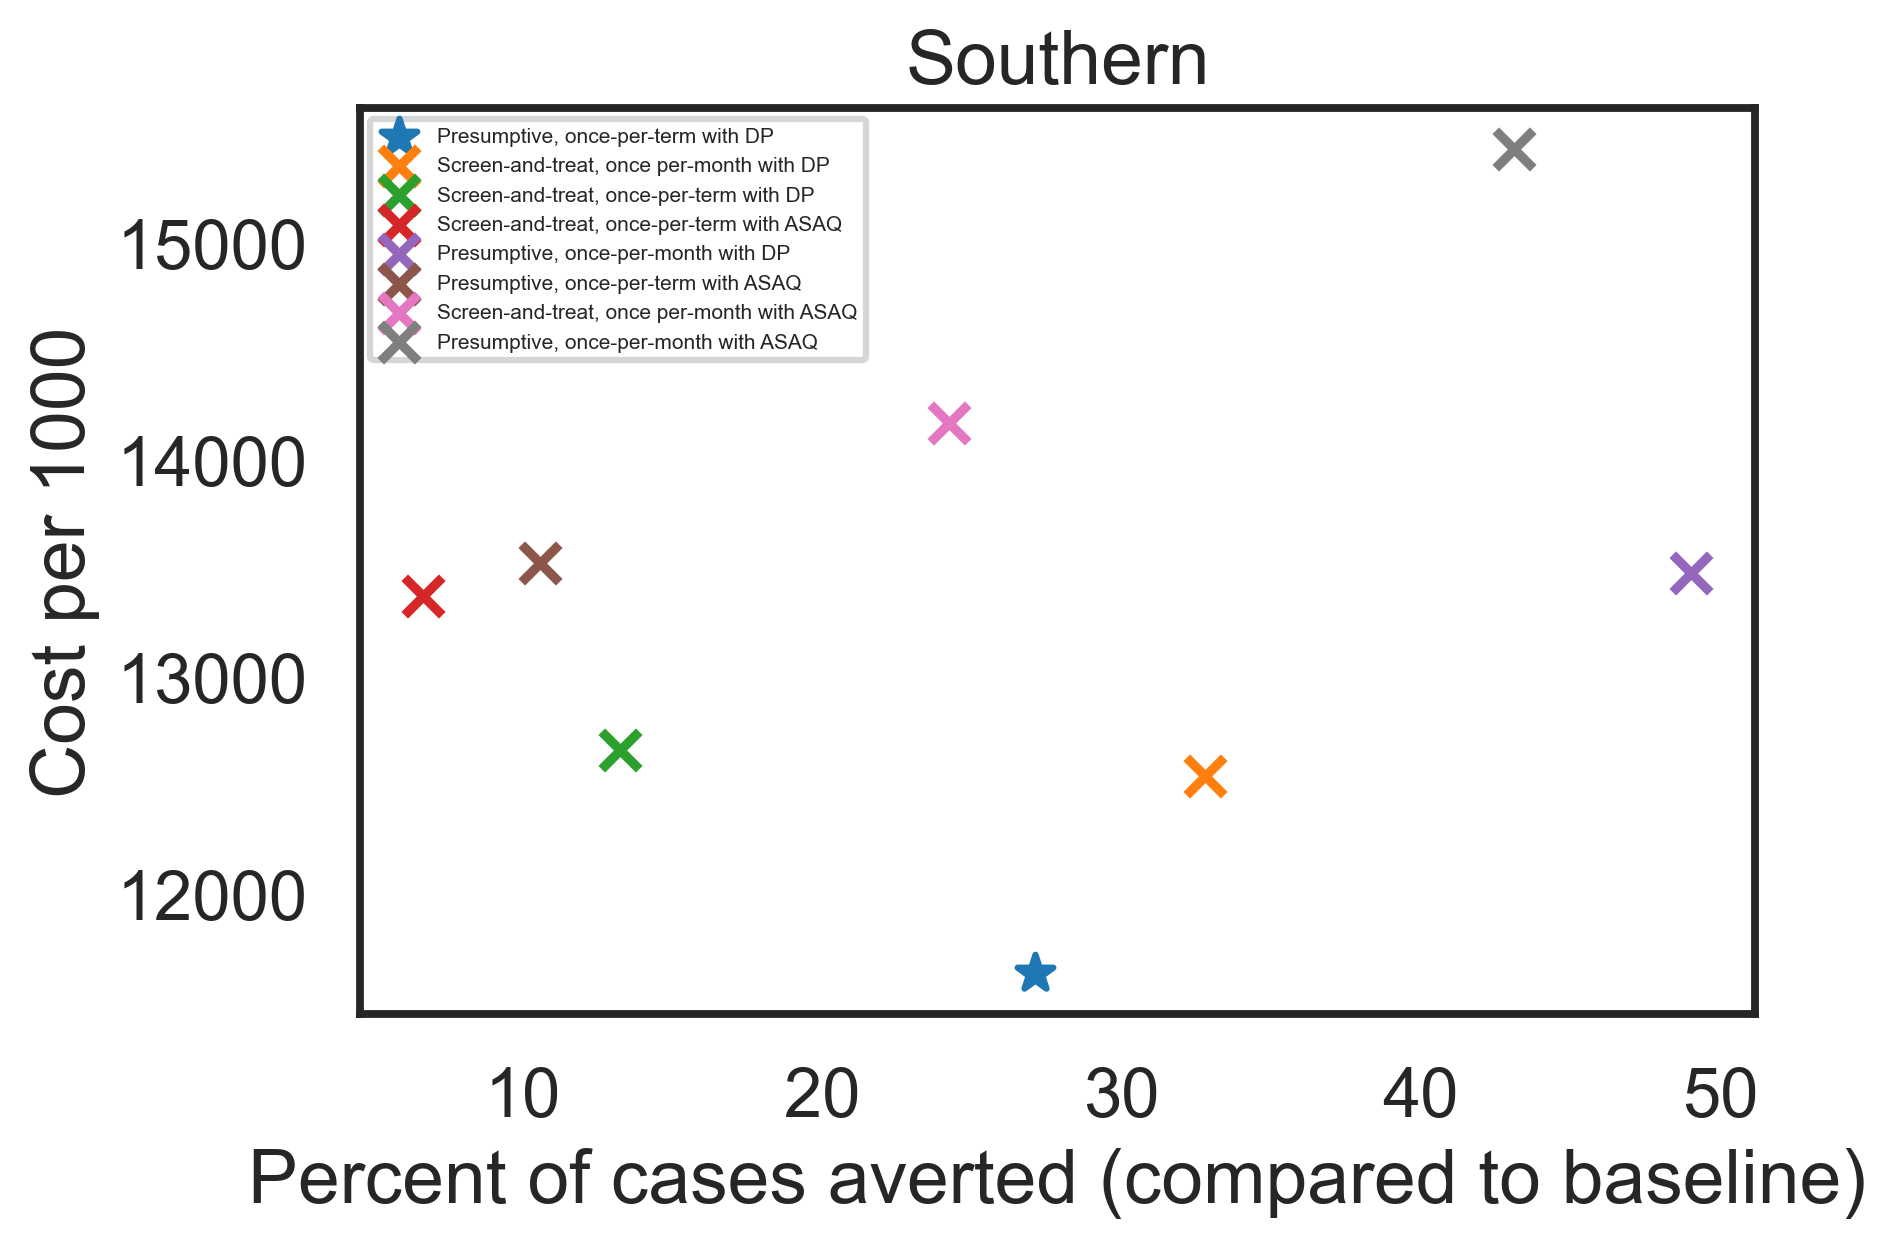

In [83]:
df = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Southern",
                                       np.in1d(marita_df["scenario_number"], [1,4,7,10,13,16,19,22]),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])]

baseline_cases = 6624.79729648578

scenario_names = {
    1: "Presumptive, once-per-term with ASAQ",
    4: "Presumptive, once-per-month with ASAQ",
    7: "Screen-and-treat, once-per-term with ASAQ",
    10: "Screen-and-treat, once per-month with ASAQ",
    13: "Presumptive, once-per-term with DP",
    16: "Presumptive, once-per-month with DP",
    19: "Screen-and-treat, once-per-term with DP",
    22: "Screen-and-treat, once per-month with DP"
}

sdf["scenario_name"] = sdf["scenario_number"].map(scenario_names)

plt.figure(dpi=300)

for i,row in sdf.iterrows():
    x = 100*(baseline_cases-row["cases"])/baseline_cases
    y = row["cost"]/5
    marker='x'
    if row["scenario_number"] == 13: 
        marker= '*'
    plt.scatter(x,y, label=row["scenario_name"], marker=marker)
#     plt.scatter(sdf["cases"], sdf["cost"])
plt.legend(fontsize=5)
plt.xlabel("Percent of cases averted (compared to baseline)")
plt.ylabel("Cost per 1000")
plt.title("Southern")
plt.savefig("figures/2021-04-13_dryrun/southern_cea_regimens_by_averted_with_scratches.pdf")

In [84]:
 df = pd.read_csv("endpoints_312b5201-609d-eb11-a2ce-c4346bcb1550.csv")

In [85]:
df[["burnin"]]

Index(['pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'archetype', 'burnin_approx_pfpr2_10', 'burnin_habitat_scale',
       'drug_type', 'exe_collection_id', 'hs_rate', 'input_collection_id',
       'interval', 'itn_coverage', 'ivermectin', 'out_of_school_rate',
       'primaquine', 'Run_Number', 'scenario_number', 'screen_type',
       'smc_age_range', 'smc_on', 'target_age_range', 'within_school_coverage',
       'Received_Treatment', 'Received_Test', 'Received_Campaign_Drugs',
       'Received_RCD_Drugs', 'Received_SMC', 'Received_Ivermectin',
     

In [89]:
df = marita_df[np.logical_and.reduce([marita_df["archetype"]=="Southern",
                                       np.in1d(marita_df["scenario_number"], [13]),
                                      marita_df["Scenario"].map(lambda x: "0.25" in x)])].reset_index(drop=True)

baseline_cases = 6624.79729648578

In [92]:
cases_averted = (6624.79729648578-4829.485065)
cost_per_case_averted = (6624.79729648578-4829.485065)/(4912.388096+1370.635774)
print(cost_per_case_averted)
print(7.75/cost_per_case_averted)

0.28574015770622563
27.122544000160833


In [5]:
archetype="Southern"
foo = get_agg_df_w_baseline(archetype)

print(foo[foo["scenario_number"]==13]["clinical_incidence_all"])

52    0.484946
53    0.786236
54    0.965897
55    1.074882
Name: clinical_incidence_all, dtype: float64


In [1]:

sns.pointplot(data=df_iver_with_baseline, x="burnin_approx_pfpr2_10", y="fraction_reduction_incidence", hue="ivermectin")
plt.ylim([0,0.5])

NameError: name 'sns' is not defined

# Transmission blocking

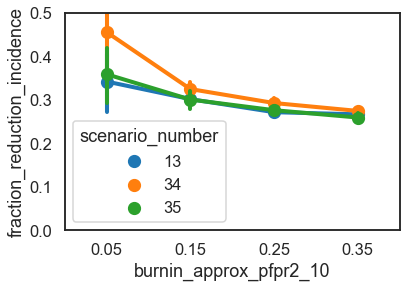

In [13]:
archetype="Southern"
df = pd.read_csv("endpoints_a71e7b31-559d-eb11-a2ce-c4346bcb1550.csv")
sdf = df[np.in1d(df["scenario_number"],[13,34,35])]
base = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg({"clinical_incidence_all": "mean"}).reset_index()
sdf = sdf.merge(base, on="burnin_approx_pfpr2_10", suffixes=("","_BASELINE"))
sdf["fraction_reduction_incidence"] = (sdf["clinical_incidence_all_BASELINE"]-sdf["clinical_incidence_all"])/sdf["clinical_incidence_all_BASELINE"]

sns.pointplot(data=sdf, x="burnin_approx_pfpr2_10", y="fraction_reduction_incidence", hue="scenario_number")
plt.ylim([0,0.5])
plt.savefig("figures/2021-04-13_dryrun/tb_southern.pdf")

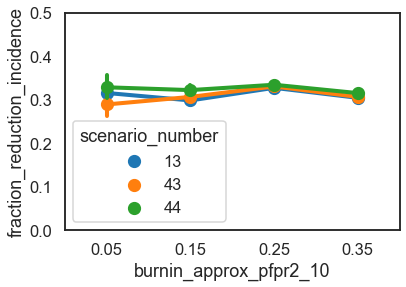

In [14]:
archetype="Sahel"
df = pd.read_csv("endpoints_312b5201-609d-eb11-a2ce-c4346bcb1550.csv")
sdf = df[np.in1d(df["scenario_number"],[13,43,44])]
base = df[df["scenario_number"]==30].groupby("burnin_approx_pfpr2_10").agg({"clinical_incidence_all": "mean"}).reset_index()
sdf = sdf.merge(base, on="burnin_approx_pfpr2_10", suffixes=("","_BASELINE"))
sdf["fraction_reduction_incidence"] = (sdf["clinical_incidence_all_BASELINE"]-sdf["clinical_incidence_all"])/sdf["clinical_incidence_all_BASELINE"]

sns.pointplot(data=sdf, x="burnin_approx_pfpr2_10", y="fraction_reduction_incidence", hue="scenario_number")
plt.ylim([0,0.5])
plt.savefig("figures/2021-04-13_dryrun/tb_sahel.pdf")

In [ ]:
plt.plot()